In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
from tqdm import tqdm
from IPython.display import Image
import seaborn as sns
import calmap
from datetime import datetime, timedelta
import math
from itertools import product

In [4]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
sales_train_validation = pd.read_csv('sales_train_validation.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [6]:
def extractDateDF(calendar):
    calendar = pd.read_csv('calendar.csv')
    date=calendar.loc[:,['d','date']]
    date.set_index('d', inplace=True)
    date=date.reset_index(drop=True)
    return date

In [7]:
calendar = pd.read_csv('calendar.csv')
date = extractDateDF(calendar)
calendar.drop(index=np.arange(len(calendar)-1,len(calendar)-57, -1), inplace=True)

# M5 Forecasting - Accuracy
Молодцов Владислав 711
https://www.kaggle.com/c/m5-forecasting-accuracy/data

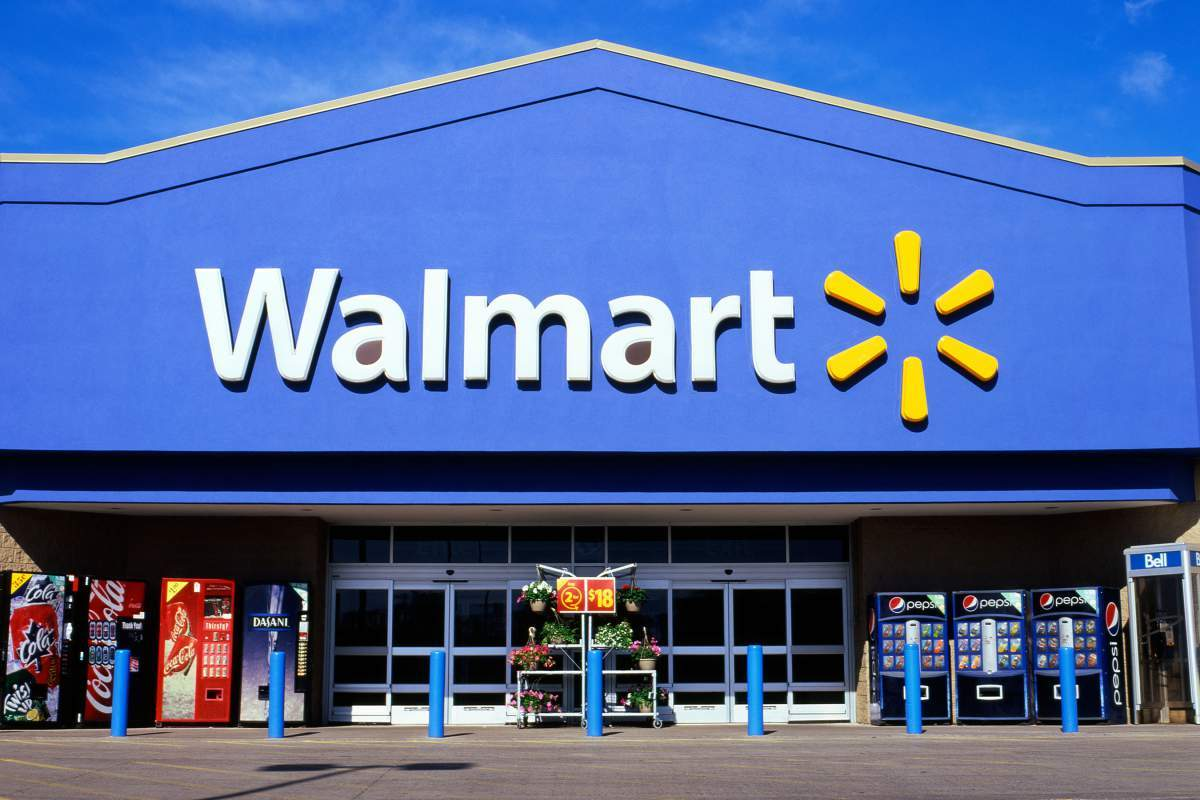

In [8]:
Image(filename='view.jpg')

# Data exploration

### Available data:
* *sales_train_validation.csv* - daily sales
* *calendar.csv* - dates, holidays, discounts
* *sell_prices.csv* - commodity prices

In [9]:
sales_train_validation.iloc[:12,:12]

id        item_id    dept_id   cat_id store_id  \
0   HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1   HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2   HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3   HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4   HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   
5   HOBBIES_1_006_CA_1_validation  HOBBIES_1_006  HOBBIES_1  HOBBIES     CA_1   
6   HOBBIES_1_007_CA_1_validation  HOBBIES_1_007  HOBBIES_1  HOBBIES     CA_1   
7   HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
8   HOBBIES_1_009_CA_1_validation  HOBBIES_1_009  HOBBIES_1  HOBBIES     CA_1   
9   HOBBIES_1_010_CA_1_validation  HOBBIES_1_010  HOBBIES_1  HOBBIES     CA_1   
10  HOBBIES_1_011_CA_1_validation  HOBBIES_1_011  HOBBIES_1  HOBBIES     CA_1   
11  HOBBIES_1_012_CA_1_validation  HOBBIES_1_012  HOBBIES_1  HOBBIES     CA_1   

   state_id  d_1  d_2  d_3  d_4  d_5  d_6  
0        CA    0    0    0    0    0    0  
1        CA    0    0    0    0    0    0  
2        CA    0    0    0    0    0    0  
3        CA    0    0    0    0    0    0  
4        CA    0    0    0    0    0    0  
5        CA    0    0    0    0    0    0  
6        CA    0    0    0    0    0    0  
7        CA   12   15    0    0    0    4  
8        CA    2    0    7    3    0    2  
9        CA    0    0    1    0    0    0  
10       CA    0    0    0    0    0    0  
11       CA    0    2    0    0    0    0

In [13]:
def examleOfData():
    example=sales_train_validation.loc[100,:]
    name=example.id
    example=pd.DataFrame(example)
    example=example.drop(axis=0, labels=['id','item_id','dept_id','cat_id','store_id','state_id'])

    fig, ax = plt.subplots(figsize=(12,6))
    example.plot(title=name, fontsize=15, legend=False, ax=ax)

    ax.set_ylabel('Sales', size=25)
    ax.title.set_size(30)

    plt.show()

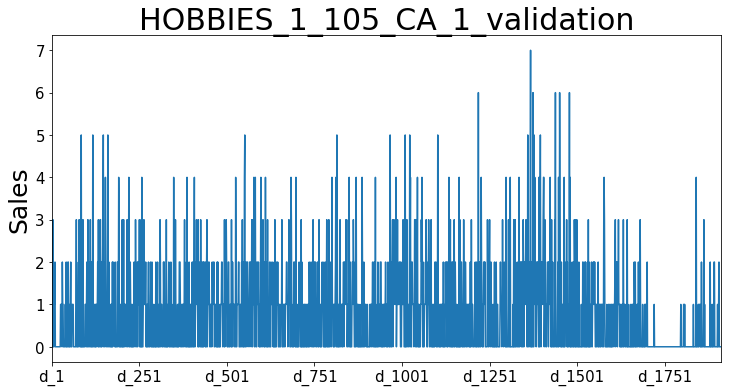

In [11]:
examleOfData()

In [8]:
hobbies = sales_train_validation[sales_train_validation.cat_id == 'HOBBIES']
hobbies = hobbies.drop(axis=1, labels=['id','item_id','dept_id','cat_id','store_id','state_id'])
hobbies = pd.DataFrame(hobbies.sum(axis=0))
hobbies.columns = ['sales']
hobbies.reset_index(drop=True, inplace=True)
hobbies=pd.concat([hobbies,date],axis=1)
hobbies.dropna(inplace=True)
hobbies['date']=pd.to_datetime(hobbies['date'])
hobbies.set_index('date', inplace=True)

hobbies.head()

sales
date              
2011-01-29  3764.0
2011-01-30  3357.0
2011-01-31  2682.0
2011-02-01  2669.0
2011-02-02  1814.0

In [9]:
food = sales_train_validation[sales_train_validation.cat_id == 'FOODS']
food = food.drop(axis=1, labels=['id','item_id','dept_id','cat_id','store_id','state_id'])
food = pd.DataFrame(food.sum(axis=0))
food.columns = ['sales']
food.reset_index(drop=True, inplace=True)
food=pd.concat([food,date],axis=1)
food.dropna(inplace=True)
food['date']=pd.to_datetime(food['date'])
food.set_index('date', inplace=True)

food.head()

sales
date               
2011-01-29  23178.0
2011-01-30  22758.0
2011-01-31  17174.0
2011-02-01  18878.0
2011-02-02  14603.0

In [10]:
household = sales_train_validation[sales_train_validation.cat_id == 'HOUSEHOLD']
household = household.drop(axis=1, labels=['id','item_id','dept_id','cat_id','store_id','state_id'])
household = pd.DataFrame(household.sum(axis=0))
household.columns = ['sales']
household.reset_index(drop=True, inplace=True)
household=pd.concat([household,date],axis=1)
household.dropna(inplace=True)
household['date']=pd.to_datetime(household['date'])
household.set_index('date', inplace=True)

household.head()

sales
date              
2011-01-29  5689.0
2011-01-30  5634.0
2011-01-31  3927.0
2011-02-01  3865.0
2011-02-02  2729.0

In [17]:
def salesByCategory():
    fig, axes = plt.subplots(figsize=(12,6))
    plt.title('Sales by category', size=30)

    plt.plot(food.sales/1000, label='Foods')
    plt.plot(hobbies.sales/1000, label='Hobbies')
    plt.plot(household.sales/1000, label='Household')

    plt.legend(loc='best', fontsize=15)
    axes.set_xlabel('Date', size=25)
    axes.set_ylabel('Sales, k', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)

    plt.tight_layout()
    plt.show()

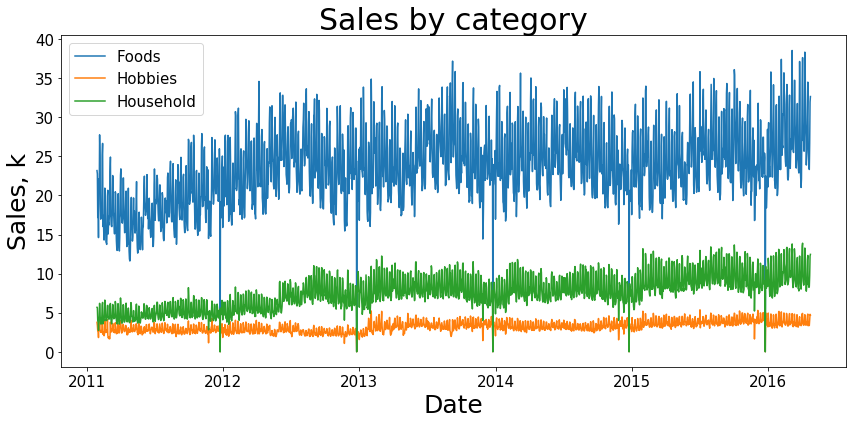

In [19]:
salesByCategory()

In [11]:
grouped=sales_train_validation.drop(columns=['item_id', 'state_id', 'dept_id'])
grouped=pd.DataFrame(grouped.groupby(by=['cat_id', 'store_id']).sum().sum(axis=1), columns=['sales'])
grouped=grouped.reset_index()

In [18]:
def salesByStore():
    plt.figure(figsize=(12,8))
    axes=sns.barplot(x=grouped['store_id'], y=grouped['sales']/1000, hue=grouped['cat_id'], data=grouped)
    axes.legend(title_fontsize=20, title='cat_id', fontsize=15)
    axes.set_xlabel('store_id', size=25)
    axes.set_ylabel('Sales, k', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)

    plt.title('Comparing Sales from various Stores', size=30)

    plt.show()

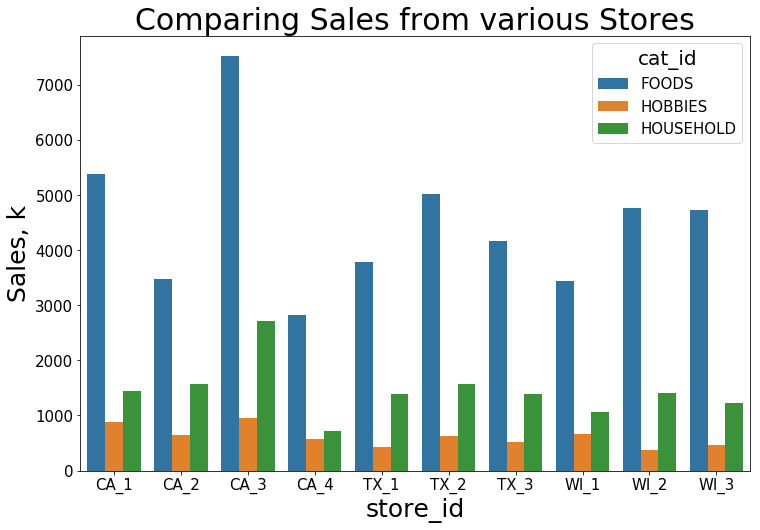

In [19]:
salesByStore()

In [20]:
calendar.iloc[2:10,:]

date  wm_yr_wk    weekday  wday  month  year     d event_name_1  \
2  2011-01-31     11101     Monday     3      1  2011   d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011   d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011   d_5          NaN   
5  2011-02-03     11101   Thursday     6      2  2011   d_6          NaN   
6  2011-02-04     11101     Friday     7      2  2011   d_7          NaN   
7  2011-02-05     11102   Saturday     1      2  2011   d_8          NaN   
8  2011-02-06     11102     Sunday     2      2  2011   d_9    SuperBowl   
9  2011-02-07     11102     Monday     3      2  2011  d_10          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  
5          NaN          NaN          NaN        1        1        1  
6          NaN          NaN          NaN        1        0        0  
7          NaN          NaN          NaN        1        1        1  
8     Sporting          NaN          NaN        1        1        1  
9          NaN          NaN          NaN        1        1        0

In [21]:
def calendarSales():
    year=2015
    fig, axes = plt.subplots(nrows=3, figsize=(16,12))
    calmap.yearplot(food.sales, year=year, ax=axes[2])
    axes[2].yaxis.set_tick_params(labelsize=15)
    axes[2].xaxis.set_tick_params(labelsize=15)
    axes[2].set_title('Sales of FOODS', fontdict={'fontsize':30})

    calmap.yearplot(hobbies.sales, year=year, ax=axes[1])
    axes[1].yaxis.set_tick_params(labelsize=15)
    axes[1].xaxis.set_tick_params(labelsize=15)
    axes[1].set_title('Sales of HOBBIES', fontdict={'fontsize':30})

    calmap.yearplot(household.sales, year=year, ax=axes[0])
    axes[0].yaxis.set_tick_params(labelsize=15)
    axes[0].xaxis.set_tick_params(labelsize=15)
    axes[0].set_title('Sales of HOUSEHOLD', fontdict={'fontsize':30})

    plt.tight_layout()
    plt.show()

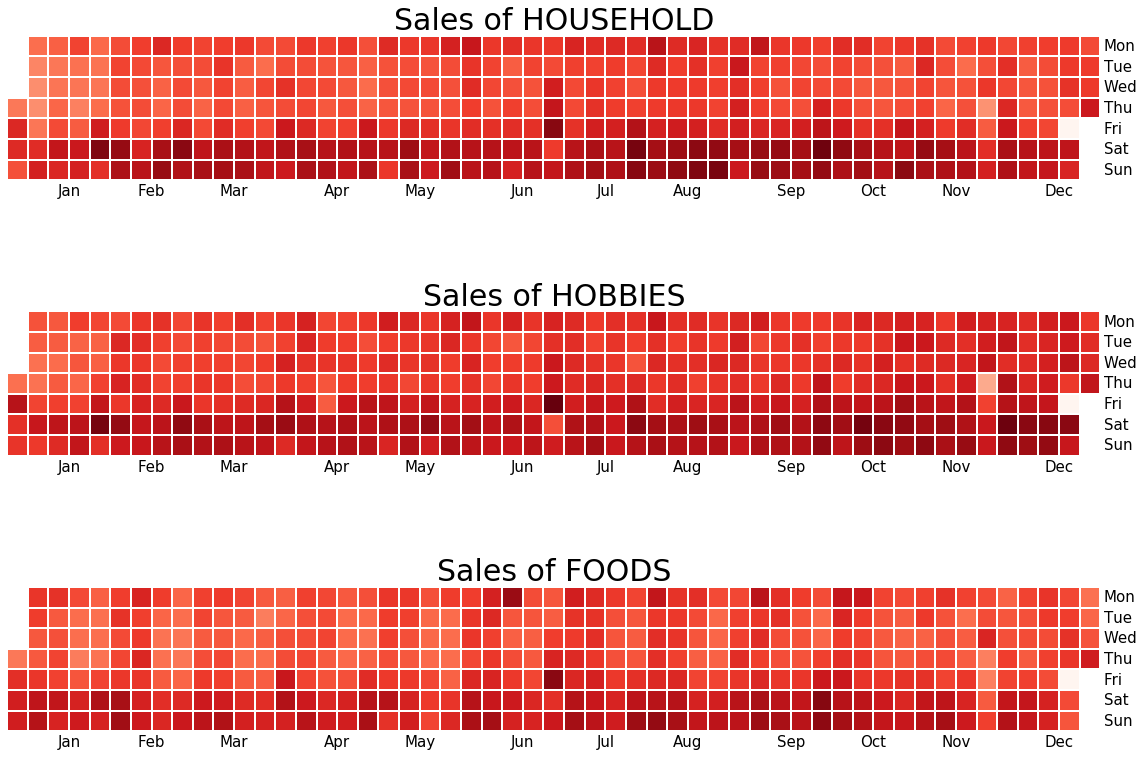

In [22]:
calendarSales()

4 июля 2015 года - День независимости США. Накануне виден резкие пик продаж всех позиций.

In [12]:
beginning='2013-11-30'
ending='2015-06-13'

events=calendar.drop(columns=['wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd', 'event_name_2',
                           'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI'])
events['date']=pd.to_datetime(events['date'])
events.dropna(inplace=True)

events=events[(events.event_name_1 == 'Halloween') | (events.event_name_1 == 'Mother\'s day')
              | (events.event_name_1 == 'Easter') | (events.event_name_1 == 'NewYear')
             | (events.event_name_1 == 'IndependenceDay')]
events=events[(events.date < ending) & (events.date > beginning)]

events.columns = ['date', 'name', 'type']
events.reset_index(drop=True, inplace=True)
events=events.drop(index=2)
events.reset_index(drop=True, inplace=True)

In [30]:
def holidaysShow():
    fig, axes = plt.subplots(figsize=(12,6))
    plt.title('Holidays', size=30)

    plt.plot(food.sales[beginning:ending]/1000, label='Foods')

    axes.set_xlabel('Date', size=25)
    axes.set_ylabel('Food sales, k', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)

    start,end = axes.get_ylim()[0],axes.get_ylim()[1]
    plt.vlines(events.date, start,end,linestyles='--',color='r',alpha = 0.5)

    for i in range(0,len(events.name)):
            plt.text(events.date[i],end,events.name[i])

    plt.tight_layout()
    plt.show()

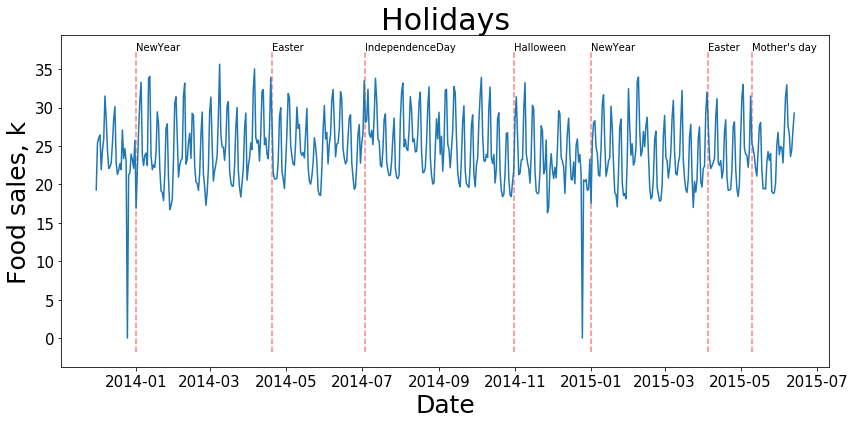

In [31]:
holidaysShow()

### SNAP - Supplemental Nutrition Assistance Program

In [13]:
snap=calendar.drop(columns=['wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd', 'event_name_1',
                           'event_type_1', 'event_name_2', 'event_type_2'])
snap['date']=pd.to_datetime(snap['date'])
snap.set_index('date', inplace=True)

snap['snap_CA'] = snap['snap_CA'].astype('float')
snap['snap_TX'] = snap['snap_TX'].astype('float')
snap['snap_WI'] = snap['snap_WI'].astype('float')

snap.head()

snap_CA  snap_TX  snap_WI
date                                 
2011-01-29      0.0      0.0      0.0
2011-01-30      0.0      0.0      0.0
2011-01-31      0.0      0.0      0.0
2011-02-01      1.0      1.0      0.0
2011-02-02      1.0      0.0      1.0

In [33]:
def showSnap():
    fig, axes = plt.subplots(nrows=3, figsize=(16,12))
    calmap.yearplot(snap.snap_CA, year=2015, ax=axes[2])
    axes[2].yaxis.set_tick_params(labelsize=15)
    axes[2].xaxis.set_tick_params(labelsize=15)
    axes[2].set_title('snap_CA', fontdict={'fontsize':30}, pad=20)

    calmap.yearplot(snap.snap_TX, year=2015, ax=axes[1])
    axes[1].yaxis.set_tick_params(labelsize=15)
    axes[1].xaxis.set_tick_params(labelsize=15)
    axes[1].set_title('snap_TX', fontdict={'fontsize':30}, pad=20)

    calmap.yearplot(snap.snap_WI, year=2015, ax=axes[0])
    axes[0].yaxis.set_tick_params(labelsize=15)
    axes[0].xaxis.set_tick_params(labelsize=15)
    axes[0].set_title('snap_WI', fontdict={'fontsize':30}, pad=20)

    plt.tight_layout()
    plt.show()

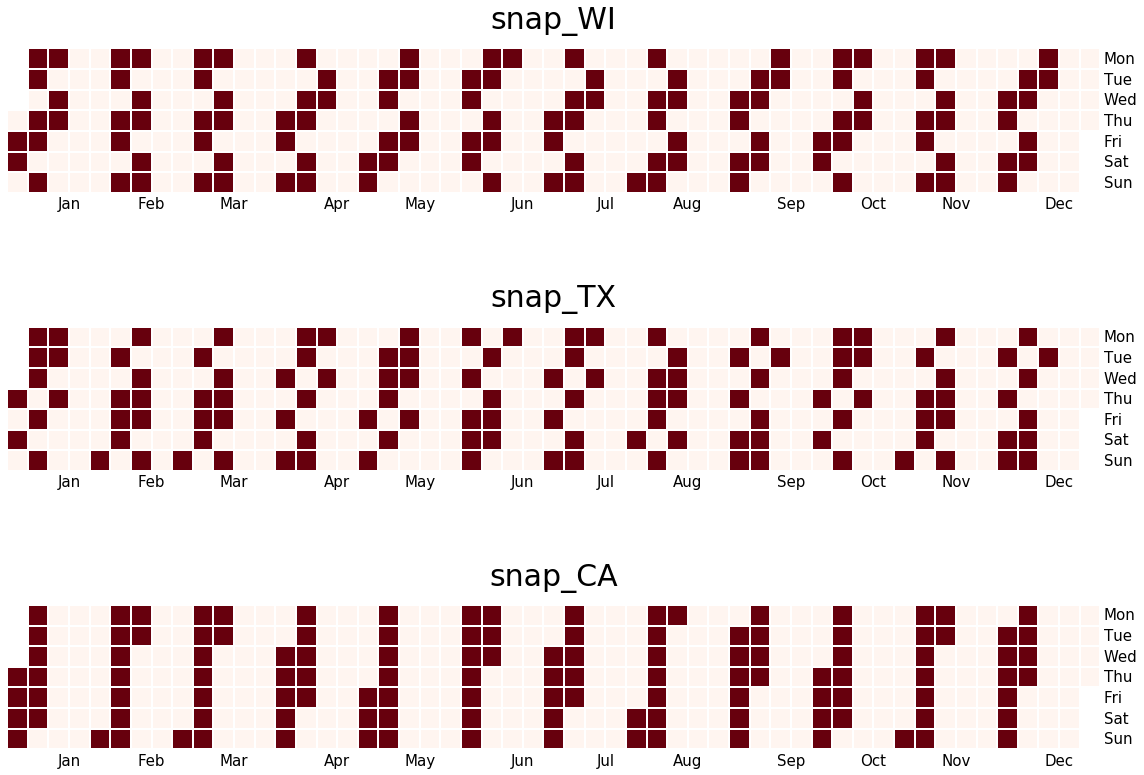

In [34]:
showSnap()

# Feature engineering

In [14]:
sales = pd.concat([food, hobbies, household], axis=1)
sales.columns = ['food sales', 'hobbies sales', 'household sales']
sales.head()

food sales  hobbies sales  household sales
date                                                  
2011-01-29     23178.0         3764.0           5689.0
2011-01-30     22758.0         3357.0           5634.0
2011-01-31     17174.0         2682.0           3927.0
2011-02-01     18878.0         2669.0           3865.0
2011-02-02     14603.0         1814.0           2729.0

In [15]:
weekday_features=calendar.drop(columns=['wm_yr_wk', 'wday', 'd', 'month', 'year', 'event_name_2', 'event_name_1',
                           'event_type_2', 'event_type_1', 'snap_CA', 'snap_TX', 'snap_WI'])
weekday_features['date']=pd.to_datetime(weekday_features['date'])
weekday_features.set_index('date', inplace=True)

weekday_features['is_saturday'] = weekday_features['weekday'] == 'Saturday'
weekday_features['is_saturday'] = weekday_features['is_saturday'].astype('float')

weekday_features['is_sunday'] = weekday_features['weekday'] == 'Sunday'
weekday_features['is_sunday'] = weekday_features['is_sunday'].astype('float')

weekday_features['is_monday'] = weekday_features['weekday'] == 'Monday'
weekday_features['is_monday'] = weekday_features['is_monday'].astype('float')

weekday_features['is_friday'] = weekday_features['weekday'] == 'Friday'
weekday_features['is_friday'] = weekday_features['is_friday'].astype('float')

weekday_features.drop(columns=['weekday'], inplace=True)
weekday_features.head()

is_saturday  is_sunday  is_monday  is_friday
date                                                    
2011-01-29          1.0        0.0        0.0        0.0
2011-01-30          0.0        1.0        0.0        0.0
2011-01-31          0.0        0.0        1.0        0.0
2011-02-01          0.0        0.0        0.0        0.0
2011-02-02          0.0        0.0        0.0        0.0

In [16]:
events_features=calendar.drop(columns=['wm_yr_wk', 'weekday', 'year', 'd', 'wday', 'month',
                                       'snap_CA', 'snap_TX', 'snap_WI'])
events_features['date']=pd.to_datetime(events_features['date'])

events_features['is_day_off'] = (events_features.date.dt.day == 25) & (events_features.date.dt.month == 12)
events_features['is_day_off'] = events_features['is_day_off'].astype('float')

events_features.set_index('date', inplace=True)

events_features['is_sporting'] = (events_features.event_type_1 == 'Sporting') | (events_features.event_type_2 == 'Sporting')
events_features['is_sporting'] = events_features['is_sporting'].astype('float')

events_features['is_cultural'] = (events_features.event_type_1 == 'Cultural') | (events_features.event_type_2 == 'Cultural')
events_features['is_cultural'] = events_features['is_cultural'].astype('float')

events_features['is_national'] = (events_features.event_type_1 == 'National') | (events_features.event_type_2 == 'National')
events_features['is_national'] = events_features['is_national'].astype('float')

events_features['is_religious'] = (events_features.event_type_1 == 'Religious') | (events_features.event_type_2 == 'Religious')
events_features['is_religious'] = events_features['is_religious'].astype('float')

events_features.drop(columns=['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'], inplace=True)

events_features.head()

is_day_off  is_sporting  is_cultural  is_national  is_religious
date                                                                       
2011-01-29         0.0          0.0          0.0          0.0           0.0
2011-01-30         0.0          0.0          0.0          0.0           0.0
2011-01-31         0.0          0.0          0.0          0.0           0.0
2011-02-01         0.0          0.0          0.0          0.0           0.0
2011-02-02         0.0          0.0          0.0          0.0           0.0

In [18]:
tomorrow_features = events_features.reset_index()

tomorrow_features.date = tomorrow_features.date - timedelta(days=1)
tomorrow_features.drop(tomorrow_features.head(1).index, inplace=True)

last=tomorrow_features.loc[1]
last.date=tomorrow_features.loc[len(tomorrow_features)].date + timedelta(days=1)
tomorrow_features.loc[len(tomorrow_features)+1]=last
tomorrow_features.loc[len(tomorrow_features)].date=date

tomorrow_features.set_index('date', inplace=True)
tomorrow_features.columns = tomorrow_features.columns + '_tomorrow'

tomorrow_features.head()

is_day_off_tomorrow  is_sporting_tomorrow  is_cultural_tomorrow  \
date                                                                          
2011-01-29                  0.0                   0.0                   0.0   
2011-01-30                  0.0                   0.0                   0.0   
2011-01-31                  0.0                   0.0                   0.0   
2011-02-01                  0.0                   0.0                   0.0   
2011-02-02                  0.0                   0.0                   0.0   

            is_national_tomorrow  is_religious_tomorrow  
date                                                     
2011-01-29                   0.0                    0.0  
2011-01-30                   0.0                    0.0  
2011-01-31                   0.0                    0.0  
2011-02-01                   0.0                    0.0  
2011-02-02                   0.0                    0.0

In [19]:
features = pd.concat([sales, weekday_features, events_features, tomorrow_features, snap], axis=1)
features.head()

food sales  hobbies sales  household sales  is_saturday  \
date                                                                  
2011-01-29     23178.0         3764.0           5689.0          1.0   
2011-01-30     22758.0         3357.0           5634.0          0.0   
2011-01-31     17174.0         2682.0           3927.0          0.0   
2011-02-01     18878.0         2669.0           3865.0          0.0   
2011-02-02     14603.0         1814.0           2729.0          0.0   

            is_sunday  is_monday  is_friday  is_day_off  is_sporting  \
date                                                                   
2011-01-29        0.0        0.0        0.0         0.0          0.0   
2011-01-30        1.0        0.0        0.0         0.0          0.0   
2011-01-31        0.0        1.0        0.0         0.0          0.0   
2011-02-01        0.0        0.0        0.0         0.0          0.0   
2011-02-02        0.0        0.0        0.0         0.0          0.0   

            is_cultural  is_national  is_religious  is_day_off_tomorrow  \
date                                                                      
2011-01-29          0.0          0.0           0.0                  0.0   
2011-01-30          0.0          0.0           0.0                  0.0   
2011-01-31          0.0          0.0           0.0                  0.0   
2011-02-01          0.0          0.0           0.0                  0.0   
2011-02-02          0.0          0.0           0.0                  0.0   

            is_sporting_tomorrow  is_cultural_tomorrow  is_national_tomorrow  \
date                                                                           
2011-01-29                   0.0                   0.0                   0.0   
2011-01-30                   0.0                   0.0                   0.0   
2011-01-31                   0.0                   0.0                   0.0   
2011-02-01                   0.0                   0.0                   0.0   
2011-02-02                   0.0                   0.0                   0.0   

            is_religious_tomorrow  snap_CA  snap_TX  snap_WI  
date                                                          
2011-01-29                    0.0      0.0      0.0      0.0  
2011-01-30                    0.0      0.0      0.0      0.0  
2011-01-31                    0.0      0.0      0.0      0.0  
2011-02-01                    0.0      1.0      1.0      0.0  
2011-02-02                    0.0      1.0      0.0      1.0

In [254]:
def showCorrelation():
    fig, axes = plt.subplots(figsize=(15,8))

    sns.heatmap(features[features.columns].corr(), annot = True,  cbar=False, ax=axes)

    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_title('Feature correlation', fontdict={'fontsize':30}, pad=20)

    plt.yticks(rotation=0) 
    plt.xticks(rotation=-90) 

    plt.show()
    
    print("Target: food sales, hobbies sales, household sales")

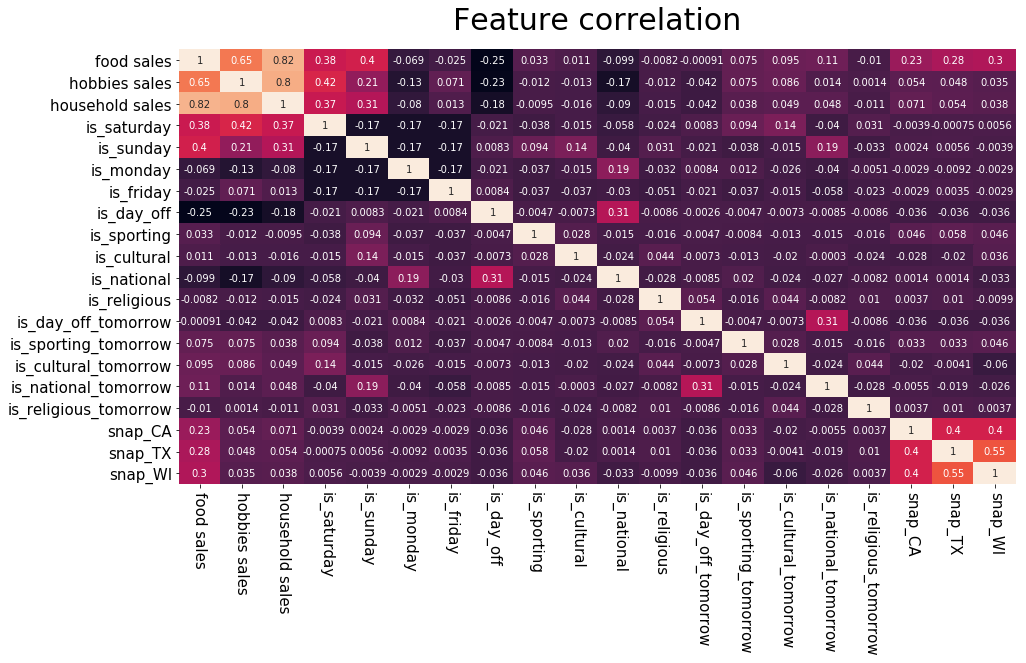

Target: food sales, hobbies sales, household sales


In [255]:
showCorrelation()

Сильную корреляцию на продажу еды оказывают скидки малообеспеченным, что выглядит очень логично.

In [276]:
def distributions():
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,6))

    bins=30
    axes[0].hist(sales['food sales'], color = 'blue', edgecolor = 'black',
         bins = bins)
    axes[1].hist(sales['hobbies sales'], color = 'blue', edgecolor = 'black',
         bins = bins)
    axes[2].hist(sales['household sales'], color = 'blue', edgecolor = 'black',
         bins = bins)

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)
    axes[2].yaxis.set_tick_params(labelsize=labelsize)
    axes[2].xaxis.set_tick_params(labelsize=labelsize)

    axes[0].set_title('Food', fontsize=30)
    axes[1].set_title('Hobbies', fontsize=30)
    axes[2].set_title('Household', fontsize=30)

    axes[0].set_xlabel('Sales', fontsize=20)
    axes[1].set_xlabel('Sales', fontsize=20)
    axes[2].set_xlabel('Sales', fontsize=20)

    plt.show()

    t1="{:e}".format(stats.normaltest(sales['food sales'])[1])
    t2="{:e}".format(stats.normaltest(sales['hobbies sales'])[1])
    t3="{:e}".format(stats.normaltest(sales['household sales'])[1])
    print("Normality test:p=%s, p=%s, p=%s" % (t1, t2,t3))
    print("Null hypothesis - distribution is normal - is rejected for all")

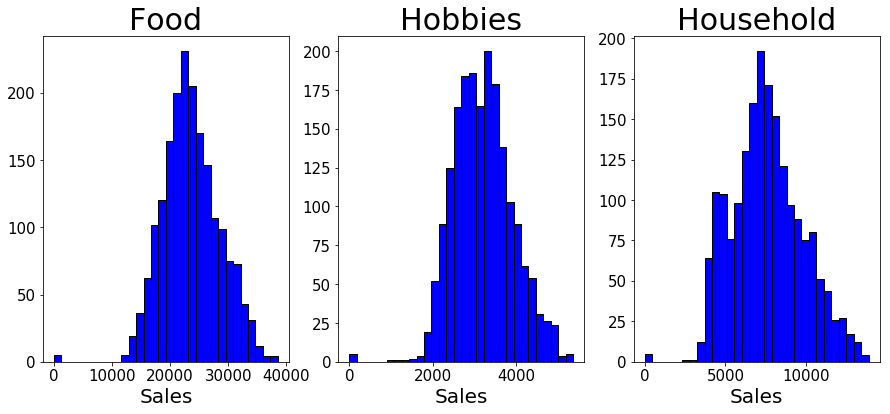

Normality test:p=3.623147e-07, p=2.904984e-06, p=8.658422e-05
Null hypothesis - distribution is normal - is rejected for all


In [277]:
distributions()

# Problem formulation

### Prediction of the next 28 days of sales - *Time Series Forecasting*

In [55]:
def salesByCategory():
    fig, axes = plt.subplots(figsize=(12,6))
    plt.title('Sales by category', size=30)

    plt.plot(food.sales/1000, label='Foods')
    plt.plot(hobbies.sales/1000, label='Hobbies')
    plt.plot(household.sales/1000, label='Household')

    plt.legend(loc='best', fontsize=15)
    axes.set_xlabel('Date', size=25)
    axes.set_ylabel('Sales, k', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)

    plt.tight_layout()
    plt.show()

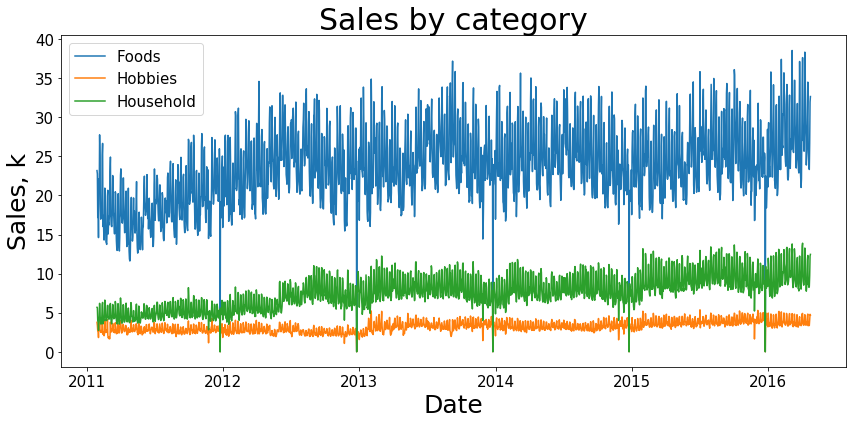

In [20]:
salesByCategory()

## Metrics

SMAPE - Symmetric Mean Absolute Percentage Error
$
\frac{1}{n}\sum\limits_{i=1}^n\frac{|y_i-\tilde{y_i}|}{(|y_i|+|\tilde{y_i}|)/2}\times100\%
$

In [69]:
def smape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true)+np.abs(y_pred)))) * 100

# Model building

## ARIMA = AR + MA + Differentiation

## AR - Autoregressive model

$
y_t = \alpha + \phi_1y_{t-1}+\phi_2y_{t-2}+ · · · + \phi_py_{t-p} + \varepsilon_t
$

$p$ - order of the model.

## MA - Moving-average model

$
y_t = \alpha + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + · · · + \theta_q \varepsilon_{t-q},
$

$q$ - order of the model.

## ARMA = AR + MA

$
y_t = \alpha + \phi_1y_{t-1}+ · · · + \phi_py_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + · · · + \theta_q \varepsilon_{t-q},
$

$(p, q)$ - hyperparameters.

# Wold's theorem

### Any stationary series can be described by a model ARMA(p,q)

In [80]:
test_set=features.tail(29)
test_set=test_set.rename(columns={'food sales':'food', 'hobbies sales':'hobbies', 'household sales':'household'})
test_set.head()

food  hobbies  household  is_saturday  is_sunday  is_monday  \
date                                                                         
2016-03-27  32236.0   3643.0    10481.0          0.0        1.0        0.0   
2016-03-28  23285.0   3555.0     9201.0          0.0        0.0        1.0   
2016-03-29  22191.0   3446.0     8220.0          0.0        0.0        0.0   
2016-03-30  21017.0   3333.0     8009.0          0.0        0.0        0.0   
2016-03-31  22127.0   3421.0     9133.0          0.0        0.0        0.0   

            is_friday  is_day_off  is_sporting  is_cultural  is_national  \
date                                                                       
2016-03-27        0.0         0.0          0.0          1.0          0.0   
2016-03-28        0.0         0.0          0.0          0.0          0.0   
2016-03-29        0.0         0.0          0.0          0.0          0.0   
2016-03-30        0.0         0.0          0.0          0.0          0.0   
2016-03-31        0.0         0.0          0.0          0.0          0.0   

            is_religious  is_day_off_tomorrow  is_sporting_tomorrow  \
date                                                                  
2016-03-27           0.0                  0.0                   0.0   
2016-03-28           0.0                  0.0                   0.0   
2016-03-29           0.0                  0.0                   0.0   
2016-03-30           0.0                  0.0                   0.0   
2016-03-31           0.0                  0.0                   0.0   

            is_cultural_tomorrow  is_national_tomorrow  is_religious_tomorrow  \
date                                                                            
2016-03-27                   0.0                   0.0                    0.0   
2016-03-28                   0.0                   0.0                    0.0   
2016-03-29                   0.0                   0.0                    0.0   
2016-03-30                   0.0                   0.0                    0.0   
2016-03-31                   0.0                   0.0                    0.0   

            snap_CA  snap_TX  snap_WI  
date                                   
2016-03-27      0.0      0.0      0.0  
2016-03-28      0.0      0.0      0.0  
2016-03-29      0.0      0.0      0.0  
2016-03-30      0.0      0.0      0.0  
2016-03-31      0.0      0.0      0.0

In [21]:
train=features.drop(features.tail(28).index)
train=train.rename(columns={"food sales":"food", "hobbies sales":"hobbies", "household sales":"household"})
train.tail()

food  hobbies  household  is_saturday  is_sunday  is_monday  \
date                                                                         
2016-03-23  23262.0   3422.0     8102.0          0.0        0.0        0.0   
2016-03-24  22874.0   3352.0     7777.0          0.0        0.0        0.0   
2016-03-25  30906.0   4230.0    10475.0          0.0        0.0        0.0   
2016-03-26  37135.0   4476.0    12252.0          1.0        0.0        0.0   
2016-03-27  32236.0   3643.0    10481.0          0.0        1.0        0.0   

            is_friday  is_day_off  is_sporting  is_cultural  is_national  \
date                                                                       
2016-03-23        0.0         0.0          0.0          0.0          0.0   
2016-03-24        0.0         0.0          0.0          0.0          0.0   
2016-03-25        1.0         0.0          0.0          0.0          0.0   
2016-03-26        0.0         0.0          0.0          0.0          0.0   
2016-03-27        0.0         0.0          0.0          1.0          0.0   

            is_religious  is_day_off_tomorrow  is_sporting_tomorrow  \
date                                                                  
2016-03-23           0.0                  0.0                   0.0   
2016-03-24           1.0                  0.0                   0.0   
2016-03-25           0.0                  0.0                   0.0   
2016-03-26           0.0                  0.0                   0.0   
2016-03-27           0.0                  0.0                   0.0   

            is_cultural_tomorrow  is_national_tomorrow  is_religious_tomorrow  \
date                                                                            
2016-03-23                   0.0                   0.0                    1.0   
2016-03-24                   0.0                   0.0                    0.0   
2016-03-25                   0.0                   0.0                    0.0   
2016-03-26                   1.0                   0.0                    0.0   
2016-03-27                   0.0                   0.0                    0.0   

            snap_CA  snap_TX  snap_WI  
date                                   
2016-03-23      0.0      0.0      0.0  
2016-03-24      0.0      0.0      0.0  
2016-03-25      0.0      0.0      0.0  
2016-03-26      0.0      0.0      0.0  
2016-03-27      0.0      0.0      0.0

In [59]:
ind = np.arange(100,200)

In [290]:
def decomposeShow(data, ind, title, pad):
    decomposed=sm.tsa.seasonal_decompose(data)

    fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(12,8))

    axes[0].set_title(title, fontdict={'fontsize':30}, pad=20)
    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)
    axes[2].yaxis.set_tick_params(labelsize=labelsize)
    axes[2].xaxis.set_tick_params(labelsize=labelsize)
    axes[3].yaxis.set_tick_params(labelsize=labelsize)
    axes[3].xaxis.set_tick_params(labelsize=labelsize)

    (decomposed.observed[ind]/1000).plot(ax=axes[0], legend=False)
    (decomposed.trend[ind]/1000).plot(ax=axes[1], legend=False)
    (decomposed.seasonal[ind]/1000).plot(ax=axes[2], legend=False)
    (decomposed.resid[ind]/1000).plot(ax=axes[3], legend=False)

    ylabelsize=20
    axes[0].set_ylabel('Observed, k', fontsize=ylabelsize, labelpad=pad[0])
    axes[0].set_xlabel('Date', fontsize=0)
    axes[1].set_ylabel('Trend, k', fontsize=ylabelsize,labelpad=pad[1])
    axes[1].set_xlabel('Date', fontsize=0)
    axes[2].set_ylabel('Seasonal, k', fontsize=ylabelsize, labelpad=pad[2])
    axes[2].set_xlabel('Date', fontsize=0)
    axes[3].set_ylabel('Residual, k', fontsize=ylabelsize, labelpad=pad[3])
    axes[3].set_xlabel('Date', fontsize=0)

    plt.tight_layout()
    plt.show()
    
    p=sm.tsa.stattools.adfuller(data)[1]
    if p < 0.005:
        str='is rejected completely'
        print("Dickey–Fuller test: p=%s\nNull hypothesis - series is non-stationary - "% "{:e}".format(p) + str)
    else:
        str='can not be rejected'
        print("Dickey–Fuller test: p=%.5f\nNull hypothesis - series is non-stationary - "% p + str)

Нулевая гипотеза в критерии Дики-Фуллера: в ряде есть единичный корень - некое свойство, присущее нестационарным временным рядам.

p value не равно 0, значит, гипотеза нестационарности не отвергается.

In [282]:
pad1=[18,18,28,2]

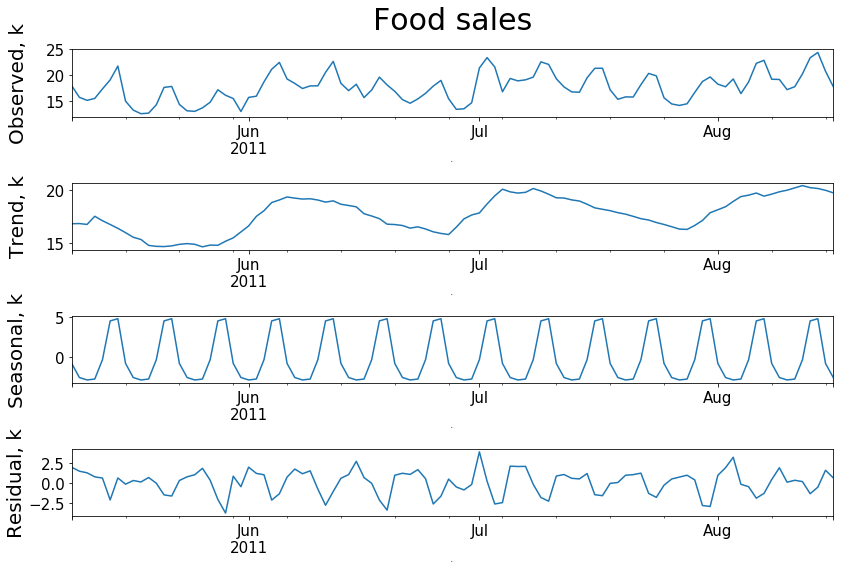

Dickey–Fuller test: p=0.37224
Null hypothesis - series is non-stationary - can not be rejected


In [291]:
decomposeShow(train.food, np.arange(100,200), 'Food sales', pad1)

In [63]:
pad2=[26,13,14,2]

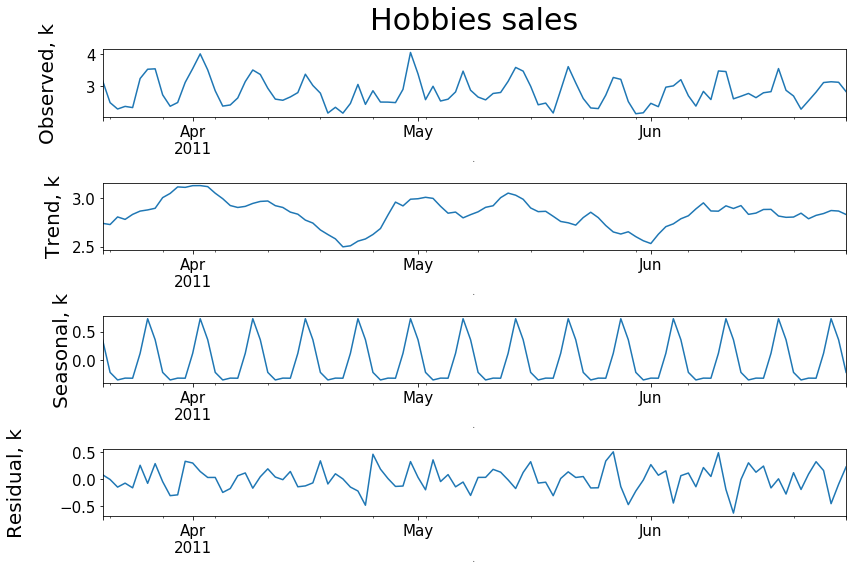

Dickey–Fuller test: p=0.25961
Null hypothesis - series is non-stationary - can not be rejected


In [292]:
decomposeShow(train.hobbies, np.arange(50,150), 'Hobbies sales', pad2)

In [65]:
pad3=[5,29,29,17]

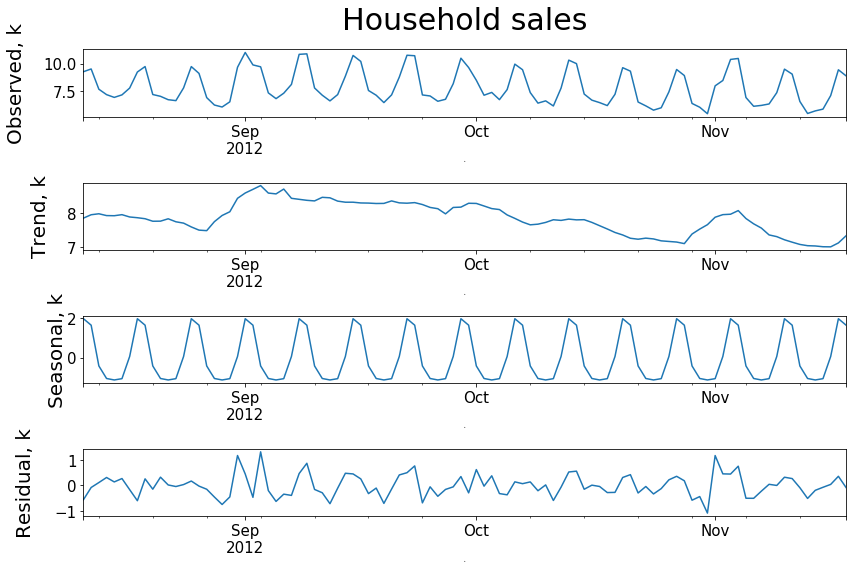

Dickey–Fuller test: p=0.42163
Null hypothesis - series is non-stationary - can not be rejected


In [293]:
decomposeShow(train.household, np.arange(560,660), 'Household sales', pad3)

# Making series stationary
### Differentiation
$\begin{align}
\tilde{y_t} = y_t − y_{t−1}
\end{align}$

$(p, d, q)$ - hyperparameters.

## SARIMA = ARIMA + Seasonality

$
y_t = \alpha + \phi_1y_{t-1}+ · · · + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + · · · + \theta_q \varepsilon_{t-q} +
$

$
+\phi_Sy_{t-S}+ · · · + \phi_{PS} y_{t-PS}
+\theta_S \varepsilon_{t-S} + · · · + \theta_{QS} \varepsilon_{t-QS}
$

### Seasonal differentiation
$\begin{align}
\tilde{y_t} = y_t − y_{t−s},
\end{align}$

where $s$ - season length.

In our case $s=7$

$(p, d, q, P, D, Q, s)$ - hyperparameters.

## Seasonal differentiation

In [67]:
seasonalShift=7
train['food_diff'] = train.food - train.food.shift(seasonalShift)
train['hobbies_diff'] = train.hobbies - train.hobbies.shift(seasonalShift)
train['household_diff'] = train.household - train.household.shift(seasonalShift)

In [68]:
pad1=[20,7,0,10]

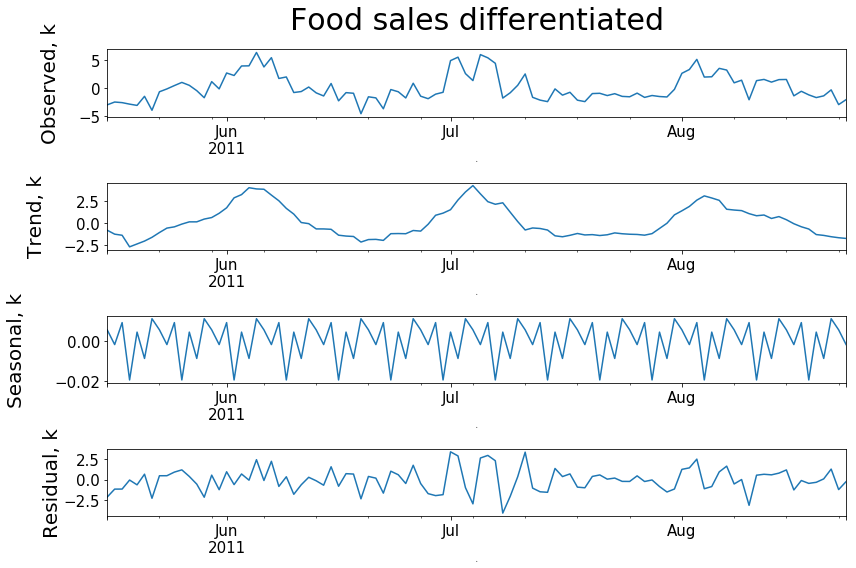

Dickey–Fuller test: p=4.939114e-30
Null hypothesis - series is non-stationary - is rejected completely


In [294]:
decomposeShow(train.food_diff[seasonalShift:], np.arange(100,200), 'Food sales differentiated', pad1)

In [70]:
pad2=[50,38,-1,28]

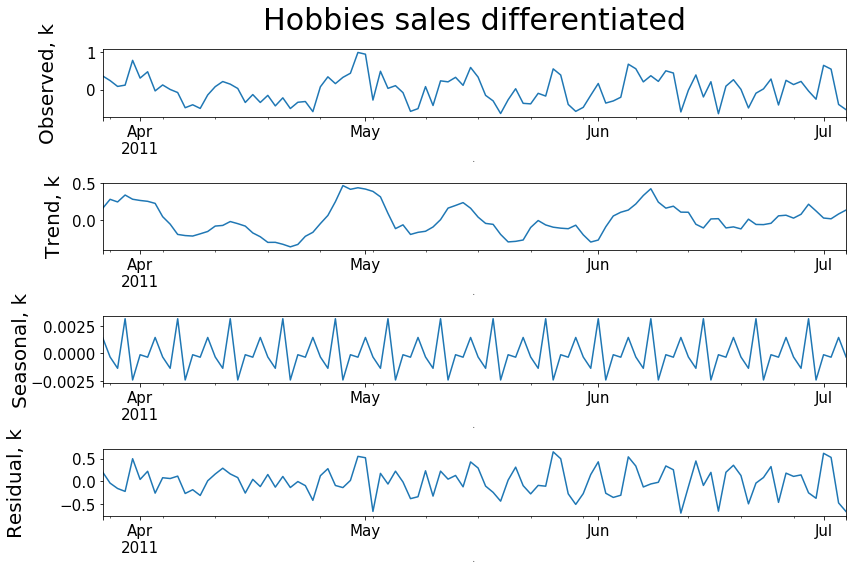

Dickey–Fuller test: p=3.590783e-25
Null hypothesis - series is non-stationary - is rejected completely


In [295]:
decomposeShow(train.hobbies_diff[seasonalShift:], np.arange(50,150), 'Hobbies sales differentiated', pad2)

In [72]:
pad3=[28,32,0,47]

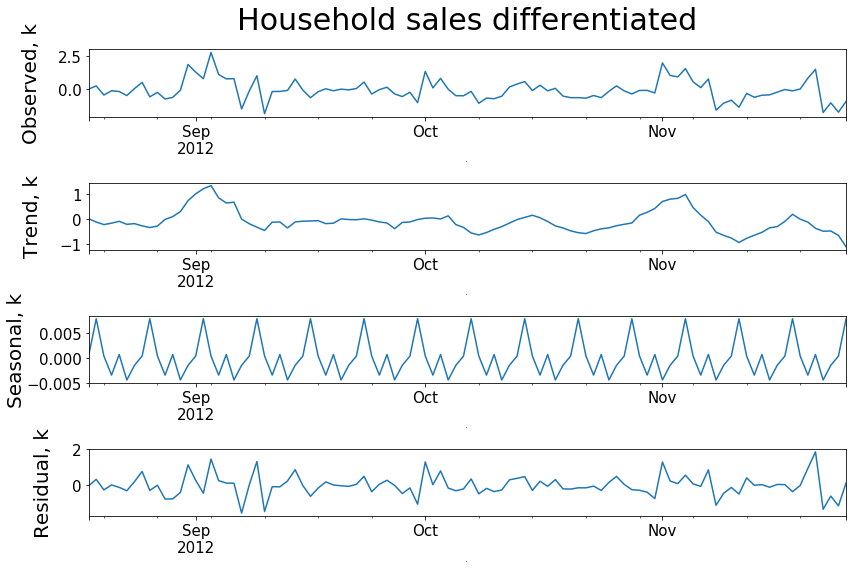

Dickey–Fuller test: p=2.140316e-25
Null hypothesis - series is non-stationary - is rejected completely


In [296]:
decomposeShow(train.household_diff[seasonalShift:], np.arange(560,660), 'Household sales differentiated', pad3)

## Ordinary differentiation

In [74]:
shift=1
train['food_diff2'] = train.food_diff - train.food_diff.shift(shift)
train['hobbies_diff2'] = train.hobbies_diff - train.hobbies_diff.shift(shift)
train['household_diff2'] = train.household_diff - train.household_diff.shift(shift)

In [75]:
pad1=[32,32,0,34]

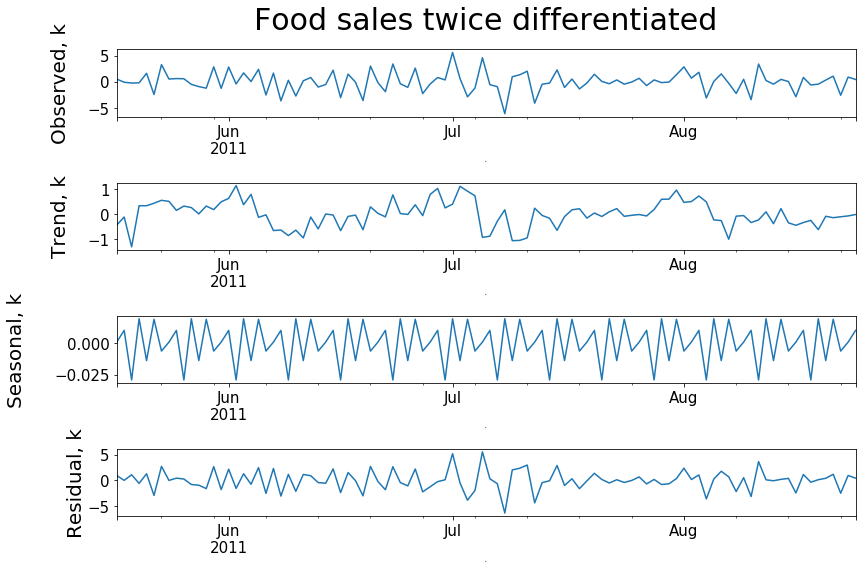

Dickey–Fuller test: p=0.000000e+00
Null hypothesis - series is non-stationary - is rejected completely


In [297]:
decomposeShow(train.food_diff2[seasonalShift+shift:], np.arange(100,200), 'Food sales twice differentiated', pad1)

In [77]:
pad2=[28,8,0,33]

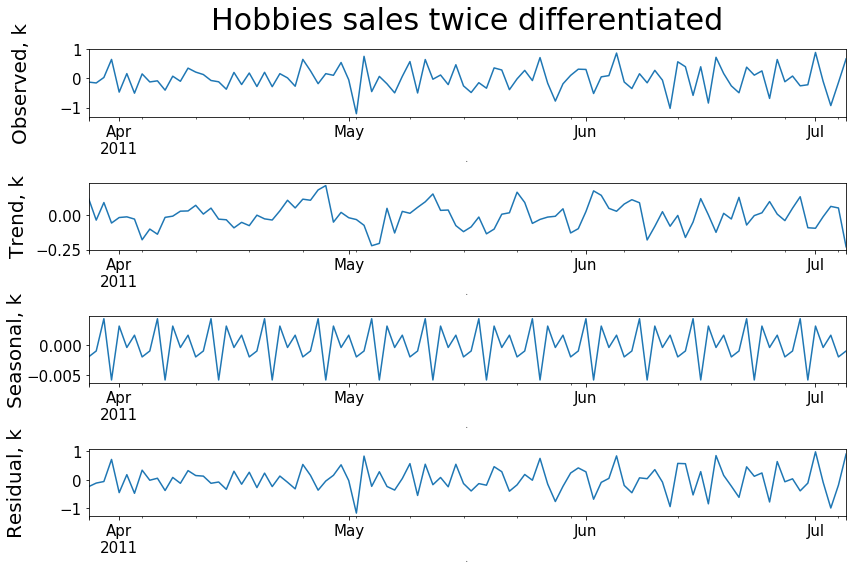

Dickey–Fuller test: p=2.208779e-29
Null hypothesis - series is non-stationary - is rejected completely


In [298]:
decomposeShow(train.hobbies_diff2[seasonalShift+shift:], np.arange(50,150), 'Hobbies sales twice differentiated', pad2)

In [79]:
pad3=[17,17,0,19]

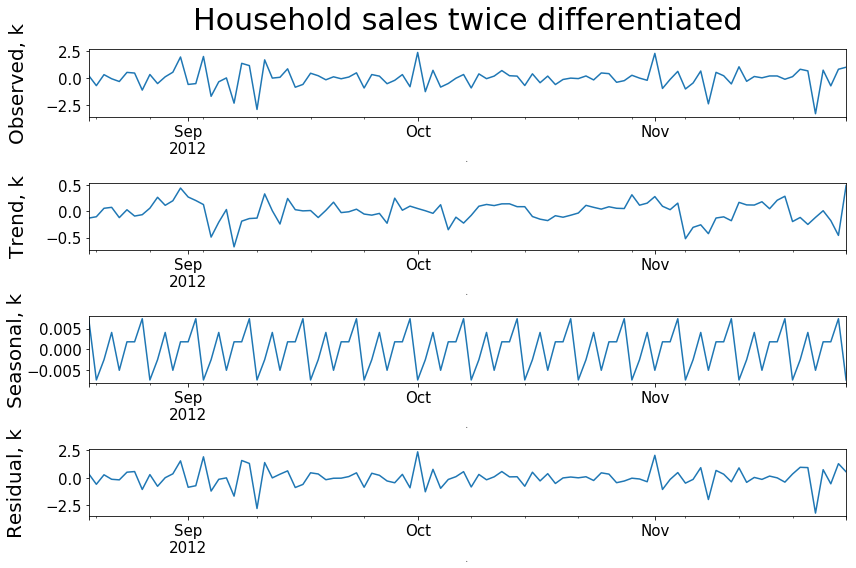

Dickey–Fuller test: p=3.358003e-29
Null hypothesis - series is non-stationary - is rejected completely


In [299]:
decomposeShow(train.household_diff2[seasonalShift+shift:], np.arange(560,660), 'Household sales twice differentiated', pad3)

# Akaike information criterion (AIC)

$
AIC = −2 lnL + 2k,
$

$L$ - likelihood, $k = P + Q + p + q + 1$ - number of model hyperparameters.

In [24]:
def arimaLearn(data, result_table, parameters_list, d = 1, D = 1, s = 7):
    results = []
    best_aic = find_best_aic(result_table)

    for param in tqdm(parameters_list):
        if is_here(result_table, param)!=True:
            try:
                model=sm.tsa.statespace.SARIMAX(data,order=(param[0], d, param[1]), 
                                                seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
                aic = model.aic
                if aic < best_aic:
                    best_model = model
                    best_aic = aic
                    best_param = param
                results.append([param, (d,D,s), model.aic])
            except KeyboardInterrupt:
                break
            except:
                continue

    return results

In [25]:
def find_best_aic(result_table):
    if result_table.empty:
        return float("inf")
    return result_table.aic.min()

In [26]:
def is_here(store, param):
    if store.empty:
        return False
    for i in range(len(store.loc[:,'(p,q,P,Q)'])):
        if str(param)==str(store.loc[i,'(p,q,P,Q)']):
            return True
    return False

In [27]:
def get_best_model(data, table):
    a=str(table[table.aic==table.aic.min()].loc[:,'(p,q,P,Q)'].iloc[0])
    b=str(table[table.aic==table.aic.min()].loc[:,'(d,D,s)'].iloc[0])
    param=(int(a[1]),int(a[4]),int(a[7]),int(a[10]))
    d=int(b[1])
    D=int(b[4])
    s=int(b[7])

    warnings.filterwarnings('ignore')
    model= sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]), 
                                                seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    warnings.filterwarnings('default')
    return model

## Model for food

In [246]:
ps = range(2, 6)
d=1
qs = range(2, 6)
Ps = range(2, 6)
D=1
Qs = range(2, 6)
s=7

from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

256

In [21]:
# read existing results
food_result_table=pd.read_csv('food_result_table.csv')
food_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
246  (5, 5, 4, 5)  (1, 1, 7)  34718.185393
247  (5, 5, 5, 2)  (1, 1, 7)  34774.049880
248  (5, 5, 5, 3)  (1, 1, 7)  34762.579224
249  (5, 5, 5, 4)  (1, 1, 7)  34735.062984
250  (5, 5, 5, 5)  (1, 1, 7)  34712.535458

In [599]:
%%time

# learn models

warnings.filterwarnings('ignore')

try:
    food_result = arimaLearn(train.food, food_result_table, parameters_list, d, D)
except KeyboardInterrupt:
    print('interrupted')

warnings.filterwarnings('default')

100%|██████████| 256/256 [1:36:11<00:00, 22.54s/it] 

CPU times: user 5h 34min 24s, sys: 4h 9min 49s, total: 9h 44min 14s
Wall time: 1h 36min 11s


In [600]:
# add new results to existing
food_result_table=pd.read_csv('food_result_table.csv')
new=pd.DataFrame(food_result)
new.columns = ['(p,q,P,Q)', '(d,D,s)', 'aic']
food_result_table=pd.concat([food_result_table,new]).reset_index(drop=True)
food_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
246  (5, 5, 4, 5)  (1, 1, 7)  34718.185393
247  (5, 5, 5, 2)  (1, 1, 7)  34774.049880
248  (5, 5, 5, 3)  (1, 1, 7)  34762.579224
249  (5, 5, 5, 4)  (1, 1, 7)  34735.062984
250  (5, 5, 5, 5)  (1, 1, 7)  34712.535458

In [601]:
# Warning! Don't rewrite unintentionally!
food_result_table.to_csv('food_result_table.csv',index=False)

## Model for hobbies

In [45]:
ps = range(2, 6)
d=1
qs = range(2, 6)
Ps = range(2, 6)
D=1
Qs = range(2, 6)
s=7

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

256

In [49]:
# read existing results
hobbies_result_table=pd.read_csv('hobbies_result_table.csv')
hobbies_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
233  (5, 5, 4, 4)  (1, 1, 7)  27728.774830
234  (5, 5, 4, 5)  (1, 1, 7)  27732.523739
235  (5, 5, 5, 3)  (1, 1, 7)  27720.039422
236  (5, 5, 5, 4)  (1, 1, 7)  27722.465842
237  (5, 5, 5, 5)  (1, 1, 7)  27729.009746

In [46]:
%%time

# learn models

warnings.filterwarnings('ignore')

try:
    hobbies_result = arimaLearn(train.hobbies, hobbies_result_table, parameters_list, d, D)
except KeyboardInterrupt:
    print('interrupted')

warnings.filterwarnings('default')

100%|██████████| 256/256 [3:35:51<00:00, 50.59s/it]   

CPU times: user 12h 37min 17s, sys: 9h 24min 33s, total: 22h 1min 51s
Wall time: 3h 35min 51s


In [47]:
# add new results to existing
hobbies_result_table=pd.read_csv('hobbies_result_table.csv')
new=pd.DataFrame(hobbies_result)
new.columns = ['(p,q,P,Q)', '(d,D,s)', 'aic']
hobbies_result_table=pd.concat([hobbies_result_table,new]).reset_index(drop=True)
hobbies_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
233  (5, 5, 4, 4)  (1, 1, 7)  27728.774830
234  (5, 5, 4, 5)  (1, 1, 7)  27732.523739
235  (5, 5, 5, 3)  (1, 1, 7)  27720.039422
236  (5, 5, 5, 4)  (1, 1, 7)  27722.465842
237  (5, 5, 5, 5)  (1, 1, 7)  27729.009746

In [48]:
# Warning! Don't rewrite unintentionally!
hobbies_result_table.to_csv('hobbies_result_table.csv',index=False)

## Model for household

In [239]:
ps = range(2, 6)
d=1
qs = range(2, 6)
Ps = range(2, 6)
D=1
Qs = range(2, 6)
s=7

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

256

In [58]:
# read existing results
household_result_table=pd.read_csv('household_result_table.csv')
household_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
239  (5, 5, 4, 4)  (1, 1, 7)  30485.620640
240  (5, 5, 4, 5)  (1, 1, 7)  30488.498725
241  (5, 5, 5, 3)  (1, 1, 7)  30470.866342
242  (5, 5, 5, 4)  (1, 1, 7)  30479.144443
243  (5, 5, 5, 5)  (1, 1, 7)  30467.278253

In [55]:
%%time

# learn models

warnings.filterwarnings('ignore')

try:
    household_result = arimaLearn(train.household, household_result_table, parameters_list, d, D)
except KeyboardInterrupt:
    print('interrupted')

warnings.filterwarnings('default')

100%|██████████| 256/256 [9:36:15<00:00, 135.06s/it]  

CPU times: user 1d 10h 16min 22s, sys: 1d 1h 53min 2s, total: 2d 12h 9min 24s
Wall time: 9h 36min 15s


In [56]:
# add new results to existing
household_result_table=pd.read_csv('household_result_table.csv')
new=pd.DataFrame(household_result)
new.columns = ['(p,q,P,Q)', '(d,D,s)', 'aic']
household_result_table=pd.concat([household_result_table,new]).reset_index(drop=True)
household_result_table.tail()

(p,q,P,Q)    (d,D,s)           aic
239  (5, 5, 4, 4)  (1, 1, 7)  30485.620640
240  (5, 5, 4, 5)  (1, 1, 7)  30488.498725
241  (5, 5, 5, 3)  (1, 1, 7)  30470.866342
242  (5, 5, 5, 4)  (1, 1, 7)  30479.144443
243  (5, 5, 5, 5)  (1, 1, 7)  30467.278253

In [57]:
# Warning! Don't rewrite unintentionally!
household_result_table.to_csv('household_result_table.csv',index=False)

## Best models

In [51]:
food_result_table.sort_values('aic').head(15)

(p,q,P,Q)    (d,D,s)           aic
219  (5, 3, 5, 5)  (1, 1, 7)  34543.620318
218  (5, 3, 5, 4)  (1, 1, 7)  34547.341309
212  (5, 3, 3, 5)  (1, 1, 7)  34550.658357
214  (5, 3, 4, 4)  (1, 1, 7)  34557.554361
215  (5, 3, 4, 5)  (1, 1, 7)  34563.591003
208  (5, 3, 2, 5)  (1, 1, 7)  34566.782141
148  (4, 3, 3, 5)  (1, 1, 7)  34578.955963
156  (4, 3, 5, 5)  (1, 1, 7)  34590.740543
147  (4, 3, 3, 4)  (1, 1, 7)  34591.884167
211  (5, 3, 3, 4)  (1, 1, 7)  34602.792337
152  (4, 3, 4, 5)  (1, 1, 7)  34604.255082
216  (5, 3, 5, 2)  (1, 1, 7)  34618.919520
86   (3, 3, 3, 5)  (1, 1, 7)  34620.231176
217  (5, 3, 5, 3)  (1, 1, 7)  34622.609688
213  (5, 3, 4, 3)  (1, 1, 7)  34623.291920

In [50]:
hobbies_result_table.sort_values('aic').head(15)

(p,q,P,Q)    (d,D,s)           aic
37   (4, 2, 4, 2)  (1, 1, 7)  27376.681242
21   (3, 2, 3, 2)  (1, 1, 7)  27378.881698
101  (3, 2, 2, 3)  (1, 1, 7)  27380.797089
146  (4, 2, 2, 3)  (1, 1, 7)  27381.204154
10   (2, 2, 5, 2)  (1, 1, 7)  27381.472058
38   (4, 2, 5, 2)  (1, 1, 7)  27382.348152
22   (3, 2, 4, 2)  (1, 1, 7)  27382.662122
51   (5, 3, 2, 2)  (1, 1, 7)  27383.785269
20   (3, 2, 2, 2)  (1, 1, 7)  27384.358484
4    (2, 2, 3, 2)  (1, 1, 7)  27384.500975
52   (5, 3, 3, 2)  (1, 1, 7)  27385.315436
0    (2, 2, 2, 2)  (1, 1, 7)  27385.509095
23   (3, 2, 5, 2)  (1, 1, 7)  27386.074021
36   (4, 2, 3, 2)  (1, 1, 7)  27386.948219
205  (5, 3, 2, 4)  (1, 1, 7)  27388.729891

In [59]:
household_result_table.sort_values('aic').head(15)

(p,q,P,Q)    (d,D,s)           aic
0    (2, 2, 2, 2)  (1, 1, 7)  30176.369642
4    (2, 2, 5, 2)  (1, 1, 7)  30200.180713
32   (4, 2, 5, 2)  (1, 1, 7)  30202.043846
70   (2, 3, 2, 5)  (1, 1, 7)  30246.531615
18   (3, 2, 4, 2)  (1, 1, 7)  30250.027228
17   (3, 2, 3, 2)  (1, 1, 7)  30253.749933
31   (4, 2, 4, 2)  (1, 1, 7)  30288.129441
219  (5, 3, 5, 5)  (1, 1, 7)  30291.526332
218  (5, 3, 5, 4)  (1, 1, 7)  30292.407613
211  (5, 3, 3, 3)  (1, 1, 7)  30293.347664
217  (5, 3, 5, 3)  (1, 1, 7)  30293.807952
105  (3, 2, 2, 5)  (1, 1, 7)  30299.069261
36   (4, 3, 5, 2)  (1, 1, 7)  30299.543448
46   (5, 2, 5, 2)  (1, 1, 7)  30301.629796
210  (5, 3, 2, 5)  (1, 1, 7)  30304.019178

In [61]:
food_model=get_best_model(train.food, food_result_table)

In [62]:
food_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                            food   No. Observations:                 1885
Model:             SARIMAX(5, 1, 3)x(5, 1, [1, 2, 3, 4, 5], 7)   Log Likelihood              -17252.810
Date:                                         Tue, 26 May 2020   AIC                          34543.620
Time:                                                 07:59:41   BIC                          34648.831
Sample:                                             01-29-2011   HQIC                         34582.376
                                                  - 03-27-2016                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6004      1.410     -0.426      0.670      -3.364       2.163
ar.L2         -0.0998      0.745     -0.134      0.893      -1.560       1.360
ar.L3          0.0745      0.237      0.315      0.753      -0.389       0.538
ar.L4          0.0278      0.072      0.386      0.700      -0.113       0.169
ar.L5         -0.0301      0.097     -0.312      0.755      -0.220       0.159
ma.L1         -0.1100      1.411     -0.078      0.938      -2.875       2.655
ma.L2         -0.5016      0.709     -0.707      0.479      -1.891       0.888
ma.L3         -0.2579      0.960     -0.269      0.788      -2.139       1.623
ar.S.L7       -1.4424      0.084    -17.074      0.000      -1.608      -1.277
ar.S.L14      -1.1486      0.121     -9.495      0.000      -1.386      -0.911
ar.S.L21      -1.3511      0.106    -12.757      0.000      -1.559      -1.144
ar.S.L28      -0.6296      0.123     -5.115      0.000      -0.871      -0.388
ar.S.L35       0.1930      0.071      2.711      0.007       0.053       0.333
ma.S.L7        0.6083      0.077      7.934      0.000       0.458       0.759
ma.S.L14      -0.1834      0.070     -2.620      0.009      -0.321      -0.046
ma.S.L21       0.1759      0.065      2.694      0.007       0.048       0.304
ma.S.L28      -0.6561      0.051    -12.913      0.000      -0.756      -0.557
ma.S.L35      -0.9441      0.061    -15.541      0.000      -1.063      -0.825
sigma2      8.385e+06   1.03e-07   8.17e+13      0.000    8.38e+06    8.38e+06
===================================================================================
Ljung-Box (Q):                      113.78   Jarque-Bera (JB):             54100.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -2.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.52e+30. Standard errors may be unstable.
"""

In [63]:
hobbies_model=get_best_model(train.hobbies, hobbies_result_table)

In [64]:
hobbies_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           hobbies   No. Observations:                 1885
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 7)   Log Likelihood              -13675.341
Date:                           Tue, 26 May 2020   AIC                          27376.681
Time:                                   08:01:36   BIC                          27448.668
Sample:                               01-29-2011   HQIC                         27403.198
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7381      0.036    -20.304      0.000      -0.809      -0.667
ar.L2          0.3017      0.028     10.639      0.000       0.246       0.357
ar.L3          0.1521      0.031      4.957      0.000       0.092       0.212
ar.L4          0.0737      0.028      2.639      0.008       0.019       0.128
ma.L1          0.0146      0.033      0.445      0.657      -0.050       0.079
ma.L2         -0.9418      0.033    -28.625      0.000      -1.006      -0.877
ar.S.L7       -0.4973      0.295     -1.685      0.092      -1.076       0.081
ar.S.L14       0.1127      0.037      3.014      0.003       0.039       0.186
ar.S.L21       0.0534      0.039      1.369      0.171      -0.023       0.130
ar.S.L28       0.0540      0.024      2.219      0.027       0.006       0.102
ma.S.L7       -0.4163      0.296     -1.404      0.160      -0.997       0.165
ma.S.L14      -0.5568      0.290     -1.921      0.055      -1.125       0.011
sigma2      1.249e+05   1681.129     74.291      0.000    1.22e+05    1.28e+05
===================================================================================
Ljung-Box (Q):                       32.94   Jarque-Bera (JB):             37969.12
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
household_model=get_best_model(train.household, household_result_table)

In [66]:
household_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         household   No. Observations:                 1885
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -15079.185
Date:                           Tue, 26 May 2020   AIC                          30176.370
Time:                                   08:02:27   BIC                          30226.207
Sample:                               01-29-2011   HQIC                         30194.728
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2740      0.761      0.360      0.719      -1.217       1.765
ar.L2          0.0346      0.217      0.160      0.873      -0.391       0.460
ma.L1         -0.9229      0.759     -1.216      0.224      -2.410       0.564
ma.L2         -0.0074      0.702     -0.011      0.992      -1.383       1.368
ar.S.L7       -0.8600      0.033    -25.743      0.000      -0.926      -0.795
ar.S.L14       0.1202      0.024      4.980      0.000       0.073       0.167
ma.S.L7        0.0116      0.028      0.416      0.677      -0.043       0.066
ma.S.L14      -0.9272      0.025    -37.186      0.000      -0.976      -0.878
sigma2      5.521e+05   6365.824     86.734      0.000     5.4e+05    5.65e+05
===================================================================================
Ljung-Box (Q):                      140.32   Jarque-Bera (JB):             36445.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitting

In [67]:
def fittingShow(data, model, title):
    fig, axes = plt.subplots(figsize=(12,7))

    axes.set_title(title, fontdict={'fontsize':30}, pad=10)

    labelsize=15
    axes.yaxis.set_tick_params(labelsize=labelsize)
    axes.xaxis.set_tick_params(labelsize=labelsize)

    ind = np.arange(100,400)
    (data/1000)[ind].plot(ax=axes)
    (model.fittedvalues/1000)[ind].plot(ax=axes,color='r', alpha=0.7)

    axes.set_ylabel('Sales, k', fontsize=25)
    axes.set_xlabel('Date', fontsize=25)

    axes.legend(['Observed', 'Fitted'], fontsize=20, loc='lower left')

    plt.tight_layout()
    plt.show()
    
    print('SMAPE: %.5f%%' % smape(data, model.fittedvalues))

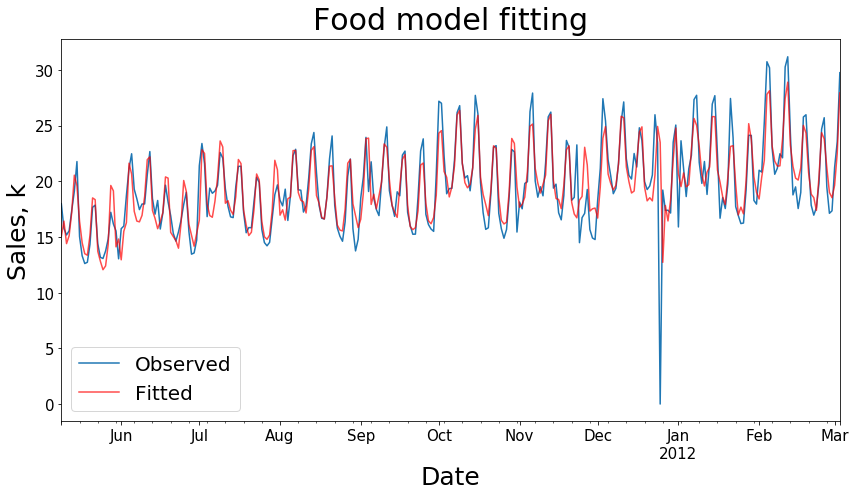

SMAPE: 3.43393%


In [70]:
fittingShow(train.food, food_model, 'Food model fitting')

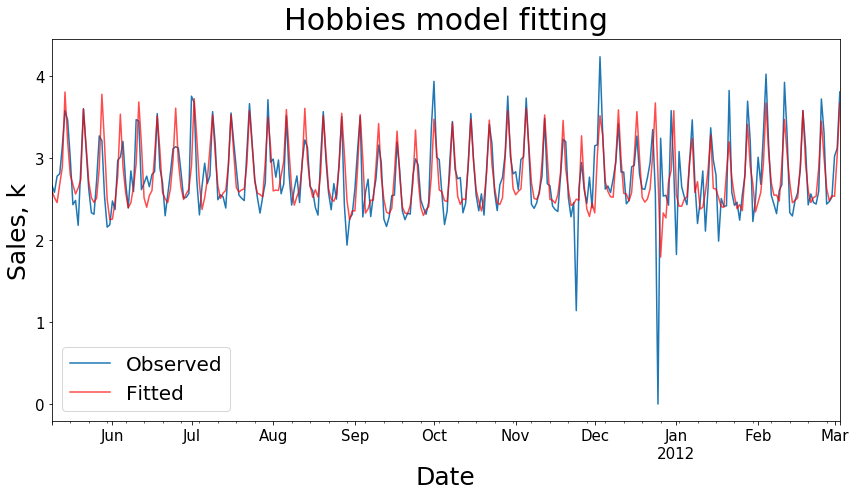

SMAPE: 3.99129%


In [71]:
fittingShow(train.hobbies, hobbies_model, 'Hobbies model fitting')

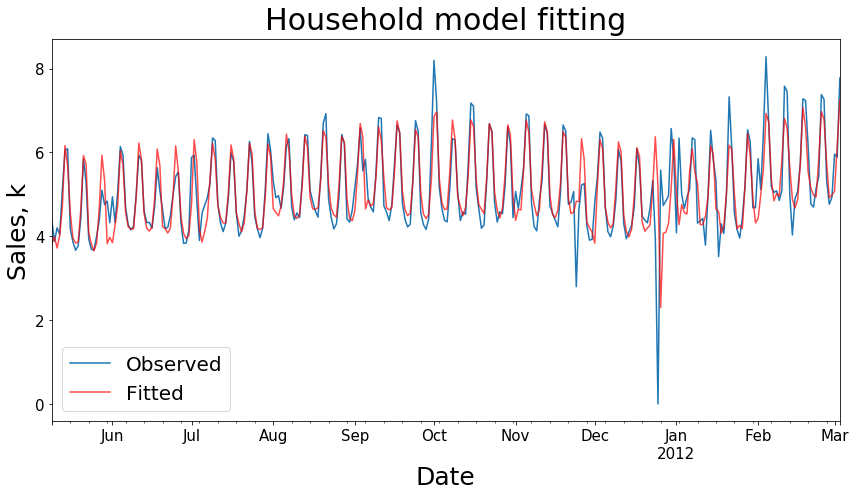

SMAPE: 3.47966%


In [72]:
fittingShow(train.household, household_model, 'Household model fitting')

# Residues observation

In [73]:
def residues(model, title, pad):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

    axes[0].set_title(title, fontdict={'fontsize':30}, pad=20)

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)

    (model.resid/1000).plot(ax=axes[0], legend=False)
    sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=800, ax=axes[1], markersize=4, title='')

    ylabelsize=20
    axes[0].set_ylabel('Residue, k', fontsize=ylabelsize, labelpad=pad[0])
    axes[0].set_xlabel('Date', fontsize=0)
    axes[1].set_ylabel('Autocorrelation', fontsize=ylabelsize,labelpad=pad[1])

    plt.tight_layout()
    plt.show()

    p_stud=stats.ttest_1samp(model.resid, 0)[1]
    p_adf=sm.tsa.stattools.adfuller(model.resid)[1]

    if p_adf < 0.005:
        str_adf='is rejected completely'
    else:
        str_adf='can not be rejected'
    print("Student's test: p=%.5f. Null hypothesis - residues are unbiased "% p_stud)
    print("Dickey–Fuller test: p=%s\nNull hypothesis - series is non-stationary - "% "{:e}".format(p_adf) + str_adf)

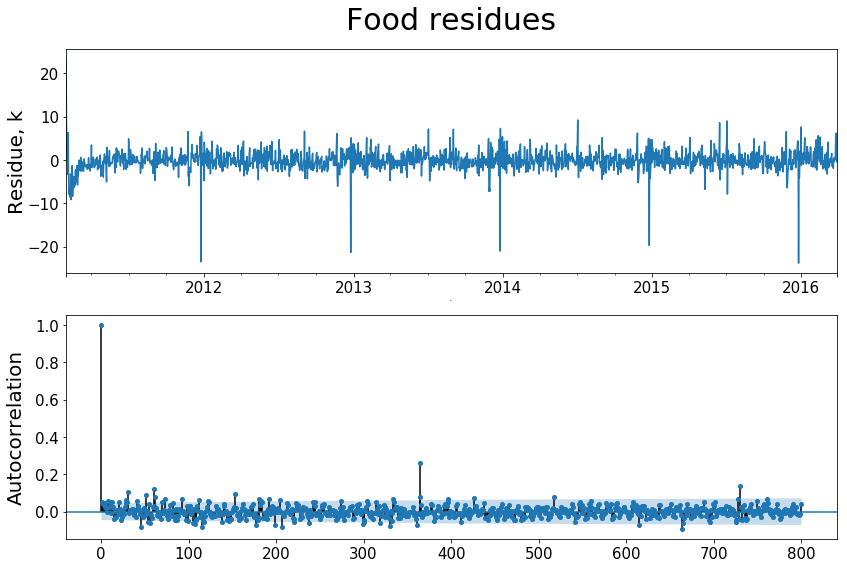

Student's test: p=0.01809. Null hypothesis - residues are unbiased 
Dickey–Fuller test: p=4.606989e-15
Null hypothesis - series is non-stationary - is rejected completely


In [74]:
residues(food_model, 'Food residues', (0,9))

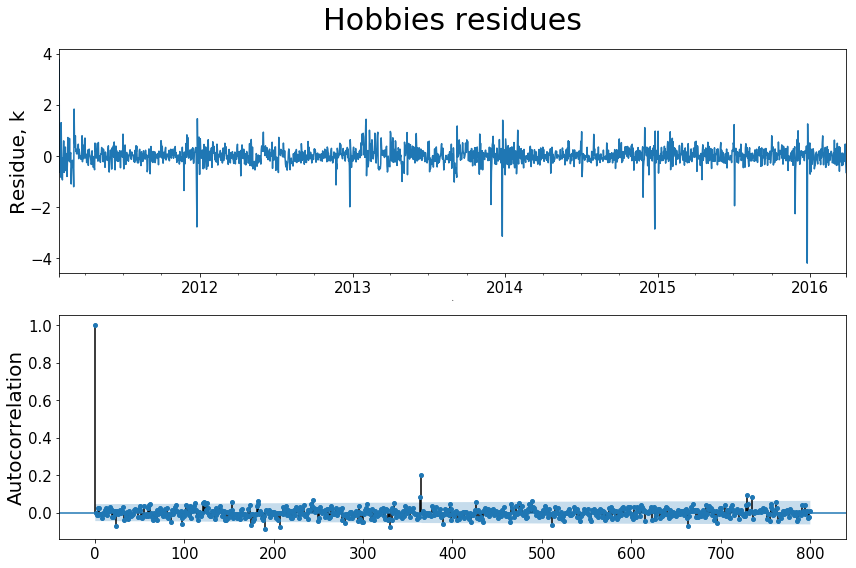

Student's test: p=0.79399. Null hypothesis - residues are unbiased 
Dickey–Fuller test: p=0.000000e+00
Null hypothesis - series is non-stationary - is rejected completely


In [75]:
residues(hobbies_model, 'Hobbies residues', (1,2))

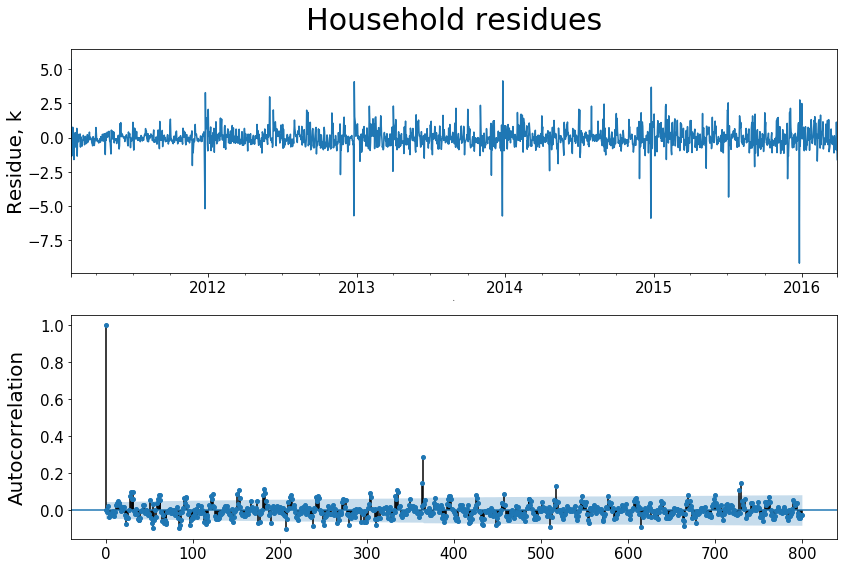

Student's test: p=0.66970. Null hypothesis - residues are unbiased 
Dickey–Fuller test: p=0.000000e+00
Null hypothesis - series is non-stationary - is rejected completely


In [76]:
residues(household_model, 'Household residues', (1,13))

# Prediction

In [77]:
train.tail()

food  hobbies  household  is_saturday  is_sunday  is_monday  \
date                                                                         
2016-03-23  23262.0   3422.0     8102.0          0.0        0.0        0.0   
2016-03-24  22874.0   3352.0     7777.0          0.0        0.0        0.0   
2016-03-25  30906.0   4230.0    10475.0          0.0        0.0        0.0   
2016-03-26  37135.0   4476.0    12252.0          1.0        0.0        0.0   
2016-03-27  32236.0   3643.0    10481.0          0.0        1.0        0.0   

            is_friday  is_day_off  is_sporting  is_cultural  is_national  \
date                                                                       
2016-03-23        0.0         0.0          0.0          0.0          0.0   
2016-03-24        0.0         0.0          0.0          0.0          0.0   
2016-03-25        1.0         0.0          0.0          0.0          0.0   
2016-03-26        0.0         0.0          0.0          0.0          0.0   
2016-03-27        0.0         0.0          0.0          1.0          0.0   

            is_religious  is_day_off_tomorrow  is_sporting_tomorrow  \
date                                                                  
2016-03-23           0.0                  0.0                   0.0   
2016-03-24           1.0                  0.0                   0.0   
2016-03-25           0.0                  0.0                   0.0   
2016-03-26           0.0                  0.0                   0.0   
2016-03-27           0.0                  0.0                   0.0   

            is_cultural_tomorrow  is_national_tomorrow  is_religious_tomorrow  \
date                                                                            
2016-03-23                   0.0                   0.0                    1.0   
2016-03-24                   0.0                   0.0                    0.0   
2016-03-25                   0.0                   0.0                    0.0   
2016-03-26                   1.0                   0.0                    0.0   
2016-03-27                   0.0                   0.0                    0.0   

            snap_CA  snap_TX  snap_WI  
date                                   
2016-03-23      0.0      0.0      0.0  
2016-03-24      0.0      0.0      0.0  
2016-03-25      0.0      0.0      0.0  
2016-03-26      0.0      0.0      0.0  
2016-03-27      0.0      0.0      0.0

In [81]:
food_future=food_model.predict(start=1885, end=1884+28)
food_future=pd.DataFrame(food_future, columns=['future'])
food_comparison=pd.concat([food_future, test_set.food], axis=1)
food_comparison.rename(columns={'food':'sales'}, inplace=True)
food_comparison.future[0]=food_comparison.sales[0]
food_comparison.head()

future    sales
2016-03-27  32236.000000  32236.0
2016-03-28  26048.344517  23285.0
2016-03-29  25044.063457  22191.0
2016-03-30  24495.002745  21017.0
2016-03-31  25401.965424  22127.0

In [82]:
hobbies_future=hobbies_model.predict(start=1885, end=1884+28)
hobbies_future=pd.DataFrame(hobbies_future, columns=['future'])
hobbies_comparison=pd.concat([hobbies_future, test_set.hobbies], axis=1)
hobbies_comparison.rename(columns={'hobbies':'sales'}, inplace=True)
hobbies_comparison.future[0]=hobbies_comparison.sales[0]
hobbies_comparison.head()

future   sales
2016-03-27  3643.000000  3643.0
2016-03-28  3394.535002  3555.0
2016-03-29  3319.749140  3446.0
2016-03-30  3403.652987  3333.0
2016-03-31  3406.418973  3421.0

In [83]:
household_future=household_model.predict(start=1885, end=1884+28)
household_future=pd.DataFrame(household_future, columns=['future'])
household_comparison=pd.concat([household_future, test_set.household], axis=1)
household_comparison.rename(columns={'household':'sales'}, inplace=True)
household_comparison.future[0]=household_comparison.sales[0]
household_comparison.head()

future    sales
2016-03-27  10481.000000  10481.0
2016-03-28   8930.973400   9201.0
2016-03-29   8264.700096   8220.0
2016-03-30   8344.183250   8009.0
2016-03-31   8318.553188   9133.0

In [84]:
def estimationShow(data, prediction, title):
    fig, axes = plt.subplots(figsize=(12,7))

    axes.set_title(title, fontdict={'fontsize':30}, pad=10)

    labelsize=15
    axes.yaxis.set_tick_params(labelsize=labelsize)
    axes.xaxis.set_tick_params(labelsize=labelsize)

    (data/1000)[-1000:].plot(ax=axes)
    (prediction.future/1000).plot(ax=axes,color='r', alpha=0.7)

    axes.set_ylabel('Sales, k', fontsize=25)
    axes.set_xlabel('Date', fontsize=25)

    axes.legend(['Observed','Predicted'], fontsize=20, loc='lower left')
    
    plt.tight_layout()
    plt.show()

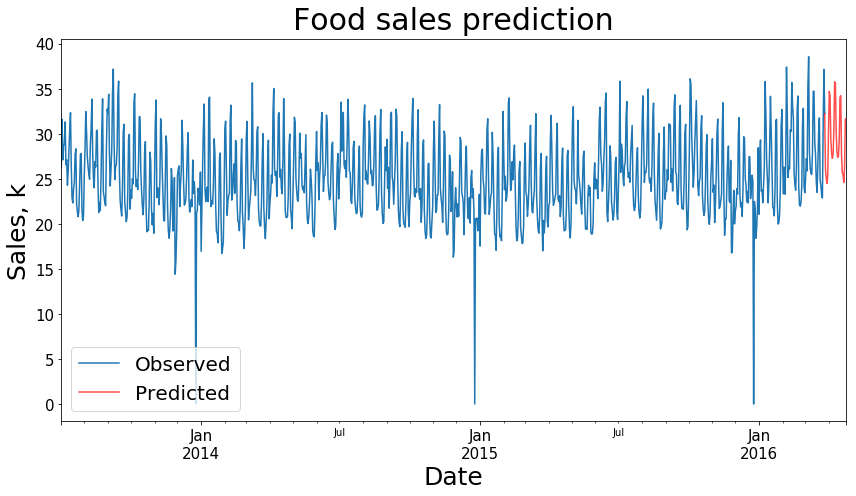

In [85]:
estimationShow(train.food, food_comparison, 'Food sales prediction')

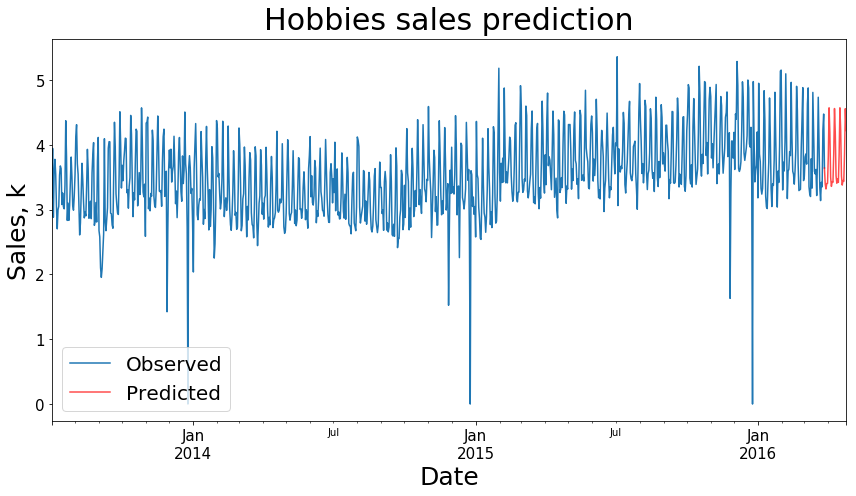

In [86]:
estimationShow(train.hobbies, hobbies_comparison, 'Hobbies sales prediction')

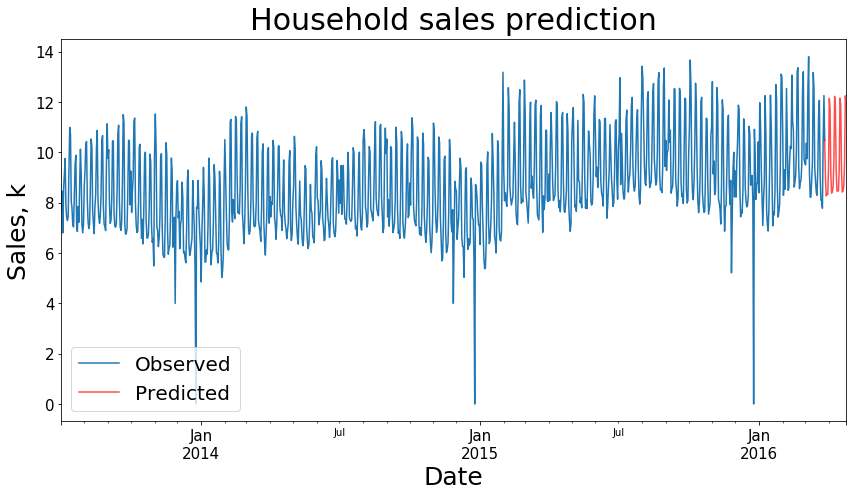

In [87]:
estimationShow(train.household, household_comparison, 'Household sales prediction')

In [88]:
def estimationCompare(data, prediction, title):
    fig, axes = plt.subplots(figsize=(12,7))

    axes.set_title(title, fontdict={'fontsize':30}, pad=10)

    labelsize=15
    axes.yaxis.set_tick_params(labelsize=labelsize)
    axes.xaxis.set_tick_params(labelsize=labelsize)

    (data/1000)[-100:].plot(ax=axes)
    (prediction.future/1000).plot(ax=axes,color='r', alpha=0.7)
    (prediction.sales/1000).plot(color='g')

    axes.set_ylabel('Sales, k', fontsize=25)
    axes.set_xlabel('Date', fontsize=25)

    axes.legend(['Observed','Predicted', 'Test'], fontsize=20, loc='lower right')
    
    plt.tight_layout()
    plt.show()

    print('SMAPE = %.5f%%' % smape(prediction.sales[1:],prediction.future[1:]))

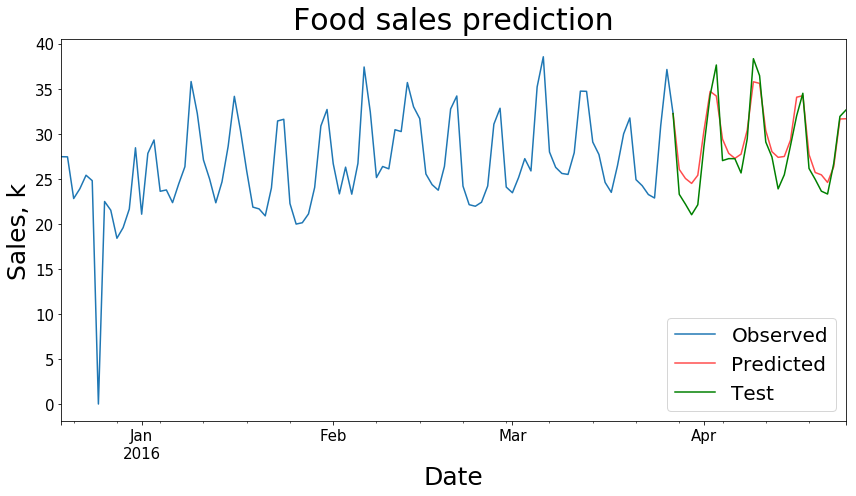

SMAPE = 2.92324%


In [89]:
estimationCompare(train.food, food_comparison, 'Food sales prediction')

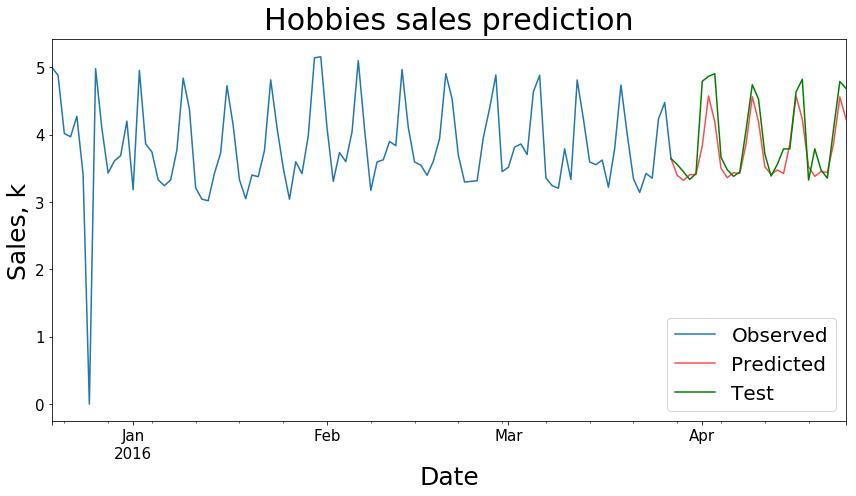

SMAPE = 2.81584%


In [90]:
estimationCompare(train.hobbies, hobbies_comparison, 'Hobbies sales prediction')

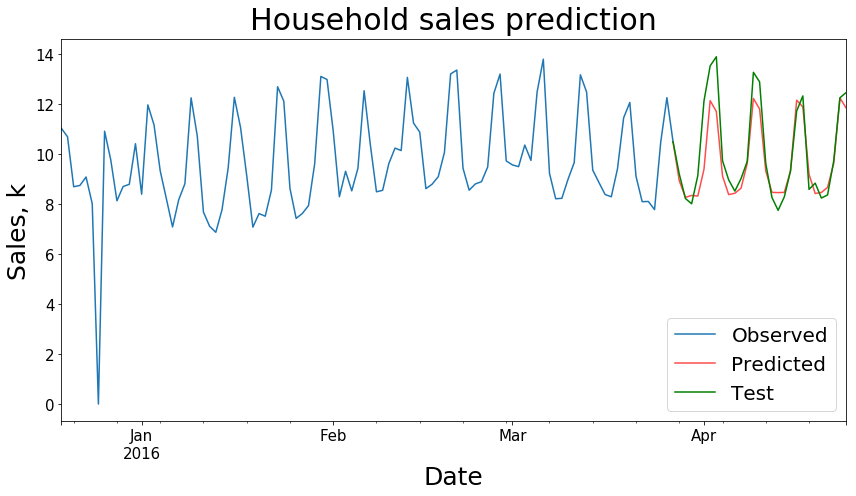

SMAPE = 2.76053%


In [91]:
estimationCompare(train.household, household_comparison, 'Household sales prediction')

## SARIMAX = SARIMA + Exogenous Variables

$
y_t = z_t+\sum\limits_{j=1}^k\beta_jx_{jt}
$

In [92]:
def get_best_model_exog(data, exog, table):
    a=str(table[table.aic==table.aic.min()].loc[:,'(p,q,P,Q)'].iloc[0])
    b=str(table[table.aic==table.aic.min()].loc[:,'(d,D,s)'].iloc[0])
    param=(int(a[1]),int(a[4]),int(a[7]),int(a[10]))
    d=int(b[1])
    D=int(b[4])
    s=int(b[7])

    warnings.filterwarnings('ignore')
    model= sm.tsa.statespace.SARIMAX(data, exog=exog, order=(param[0], d, param[1]), 
                                                seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
    warnings.filterwarnings('default')
    return model

In [93]:
def compareFitting(data, models, titles):
    fig, axes = plt.subplots(nrows=2,figsize=(12,8))

    axes[0].set_title(titles[0], fontdict={'fontsize':30}, pad=10)
    axes[1].set_title(titles[1], fontdict={'fontsize':30}, pad=10)

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)

    ind = np.arange(100,400)
    (data/1000)[ind].plot(ax=axes[0])
    (data/1000)[ind].plot(ax=axes[1])
    (models[0].fittedvalues/1000)[ind].plot(ax=axes[0],color='r', alpha=0.7)
    (models[1].fittedvalues/1000)[ind].plot(ax=axes[1],color='r', alpha=0.7)

    axes[0].set_ylabel('Sales, k', fontsize=25)
    axes[0].set_xlabel('Date', fontsize=25)
    axes[1].set_ylabel('Sales, k', fontsize=25)
    axes[1].set_xlabel('Date', fontsize=25)

    axes[0].legend(['Observed', 'Fitted'], fontsize=20, loc='lower left')
    axes[1].legend(['Observed', 'Fitted'], fontsize=20, loc='lower left')

    plt.tight_layout()
    plt.show()
    
    print('SMAPE: %.5f%% vs %.5f%%' % (smape(data, models[0].fittedvalues),smape(data, models[1].fittedvalues)))

In [94]:
def residuesCompare(models, titles):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

    axes[0].set_title(titles[0], fontdict={'fontsize':30}, pad=20)
    axes[1].set_title(titles[1], fontdict={'fontsize':30}, pad=20)

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)

    (models[0].resid/1000).plot(ax=axes[0], legend=False)
    (models[1].resid/1000).plot(ax=axes[1], legend=False)

    ylabelsize=20
    axes[0].set_ylabel('Residue, k', fontsize=ylabelsize)
    axes[0].set_xlabel('Date', fontsize=0)
    axes[1].set_ylabel('Residue, k', fontsize=ylabelsize)
    axes[1].set_xlabel('Date', fontsize=0)

    plt.tight_layout()
    plt.show()

    p_stud1=stats.ttest_1samp(models[0].resid, 0)[1]
    p_stud2=stats.ttest_1samp(models[1].resid, 0)[1]
    p_adf1=sm.tsa.stattools.adfuller(models[0].resid)[1]
    p_adf2=sm.tsa.stattools.adfuller(models[1].resid)[1]

    print("Student's test: p=%.5f vs p=%.5f"% (p_stud1,p_stud2))
    print("Dickey–Fuller test: p=%s vs p=%s"% ("{:e}".format(p_adf1),"{:e}".format(p_adf2)))
    

In [95]:
def autocorrelationCompare(models, titles):
    fig, axes = plt.subplots(nrows=2,figsize=(12,9))

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)
    
    sm.graphics.tsa.plot_acf(models[0].resid.values.squeeze(), lags=800, ax=axes[0], markersize=4, title='')
    axes[0].set_ylabel('Autocorrelation', fontsize=25)
    sm.graphics.tsa.plot_acf(models[1].resid.values.squeeze(), lags=800, ax=axes[1], markersize=4, title='')
    axes[1].set_ylabel('Autocorrelation', fontsize=25)

    axes[0].set_title(titles[0], fontdict={'fontsize':30}, pad=10)
    axes[1].set_title(titles[1], fontdict={'fontsize':30}, pad=10)
    
    plt.tight_layout()
    plt.show()

In [96]:
def predictionsCompare(data, predictions, titles):
    fig, axes = plt.subplots(nrows=2,figsize=(12,9))

    axes[0].set_title(titles[0], fontdict={'fontsize':30}, pad=10)
    axes[1].set_title(titles[1], fontdict={'fontsize':30}, pad=10)

    labelsize=15
    axes[0].yaxis.set_tick_params(labelsize=labelsize)
    axes[0].xaxis.set_tick_params(labelsize=labelsize)
    axes[1].yaxis.set_tick_params(labelsize=labelsize)
    axes[1].xaxis.set_tick_params(labelsize=labelsize)

    (data/1000)[-100:].plot(ax=axes[0])
    (predictions[0].future/1000).plot(ax=axes[0],color='r', alpha=0.7)
    (predictions[0].sales/1000).plot(ax=axes[0],color='g')

    (data/1000)[-100:].plot(ax=axes[1])
    (predictions[1].future/1000).plot(ax=axes[1],color='r', alpha=0.7)
    (predictions[1].sales/1000).plot(ax=axes[1],color='g')

    axes[0].set_ylabel('Sales, k', fontsize=25)
    axes[0].set_xlabel('Date', fontsize=25)
    axes[1].set_ylabel('Sales, k', fontsize=25)
    axes[1].set_xlabel('Date', fontsize=25)

    axes[0].legend(['Observed','Predicted', 'Test'], fontsize=20, loc='lower right')
    axes[1].legend(['Observed','Predicted', 'Test'], fontsize=20, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    smape1 = smape(predictions[0].sales[1:],predictions[0].future[1:])
    smape2 = smape(predictions[1].sales[1:],predictions[1].future[1:])
    print('SMAPE = %.5f%% vs %.5f%%' % (smape1, smape2))

# First exog set: days

In [97]:
train.columns

Index(['food', 'hobbies', 'household', 'is_saturday', 'is_sunday', 'is_monday',
       'is_friday', 'is_day_off', 'is_sporting', 'is_cultural', 'is_national',
       'is_religious', 'is_day_off_tomorrow', 'is_sporting_tomorrow',
       'is_cultural_tomorrow', 'is_national_tomorrow', 'is_religious_tomorrow',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [98]:
def showCorrelationDays():
    fig, axes = plt.subplots(figsize=(15,8))

    ind=pd.Index(['food sales', 'hobbies sales', 'household sales', 'is_saturday',
       'is_sunday', 'is_monday', 'is_friday', 'is_day_off'])

    sns.heatmap(features[ind].corr(), annot = True,  cbar=False, ax=axes)

    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_title('Feature correlation', fontdict={'fontsize':30}, pad=20)

    plt.yticks(rotation=0) 
    plt.xticks(rotation=-90) 

    plt.show()
    
    print("Target: food sales, hobbies sales, household sales")

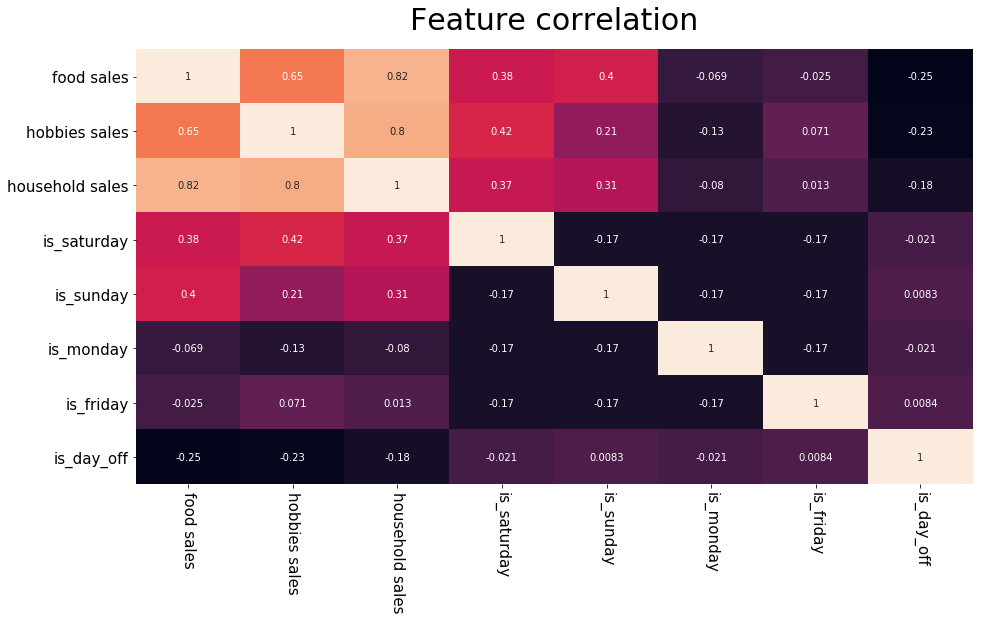

Target: food sales, hobbies sales, household sales


In [99]:
showCorrelationDays()

In [101]:
k=5
exog_days = np.zeros([len(train), k])
exog_days[:,0]=train.is_saturday
exog_days[:,1]=train.is_sunday
exog_days[:,2]=train.is_monday
exog_days[:,3]=train.is_friday
exog_days[:,4]=train.is_day_off

exog_days_test = np.zeros([28, k])
exog_days_test[:,0]=test_set.is_saturday[1:]
exog_days_test[:,1]=test_set.is_sunday[1:]
exog_days_test[:,2]=test_set.is_monday[1:]
exog_days_test[:,3]=test_set.is_friday[1:]
exog_days_test[:,4]=test_set.is_day_off[1:]

In [102]:
food_model_exog_days=get_best_model_exog(train.food, exog_days, food_result_table)

In [103]:
food_model_exog_days.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                            food   No. Observations:                 1885
Model:             SARIMAX(5, 1, 3)x(5, 1, [1, 2, 3, 4, 5], 7)   Log Likelihood              -16937.519
Date:                                         Tue, 26 May 2020   AIC                          33923.037
Time:                                                 08:11:42   BIC                          34055.936
Sample:                                             01-29-2011   HQIC                         33971.992
                                                  - 03-27-2016                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.05e-05   2310.966  -8.87e-09      1.000   -4529.410    4529.410
x2          3.152e-05   2605.866   1.21e-08      1.000   -5107.403    5107.403
x3          1.227e-06   2131.548   5.76e-10      1.000   -4177.757    4177.757
x4             0.0001   2165.086   6.86e-08      1.000   -4243.490    4243.490
x5         -1.835e+04    705.359    -26.010      0.000   -1.97e+04    -1.7e+04
ar.L1         -0.5880      0.413     -1.425      0.154      -1.397       0.221
ar.L2         -0.0217      0.222     -0.097      0.922      -0.457       0.414
ar.L3          0.1153      0.124      0.933      0.351      -0.127       0.358
ar.L4          0.0019      0.053      0.035      0.972      -0.103       0.107
ar.L5         -0.1145      0.056     -2.031      0.042      -0.225      -0.004
ma.L1         -0.0161      0.412     -0.039      0.969      -0.825       0.792
ma.L2         -0.5607      0.202     -2.778      0.005      -0.956      -0.165
ma.L3         -0.2910      0.322     -0.904      0.366      -0.922       0.340
ar.S.L7       -1.4679      0.081    -18.045      0.000      -1.627      -1.308
ar.S.L14      -1.1778      0.108    -10.922      0.000      -1.389      -0.966
ar.S.L21      -1.3817      0.098    -14.079      0.000      -1.574      -1.189
ar.S.L28      -0.6605      0.113     -5.841      0.000      -0.882      -0.439
ar.S.L35       0.1793      0.061      2.924      0.003       0.059       0.299
ma.S.L7        0.6148      0.079      7.784      0.000       0.460       0.770
ma.S.L14      -0.1940      0.081     -2.410      0.016      -0.352      -0.036
ma.S.L21       0.1799      0.074      2.430      0.015       0.035       0.325
ma.S.L28      -0.6592      0.070     -9.471      0.000      -0.796      -0.523
ma.S.L35      -0.9410      0.075    -12.591      0.000      -1.087      -0.794
sigma2       6.02e+06      0.071   8.51e+07      0.000    6.02e+06    6.02e+06
===================================================================================
Ljung-Box (Q):                      177.78   Jarque-Bera (JB):               424.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+25. Standard errors may be unstable.
"""

In [104]:
hobbies_model_exog_days=get_best_model_exog(train.hobbies, exog_days, hobbies_result_table)

In [105]:
hobbies_model_exog_days.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           hobbies   No. Observations:                 1885
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 7)   Log Likelihood              -13478.612
Date:                           Tue, 26 May 2020   AIC                          26993.225
Time:                                   08:15:26   BIC                          27092.898
Sample:                               01-29-2011   HQIC                         27029.940
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0142   1967.014  -7.23e-06      1.000   -3855.291    3855.262
x2            -0.0172   1083.365  -1.58e-05      1.000   -2123.373    2123.338
x3             0.0024   2640.885   9.26e-07      1.000   -5176.038    5176.043
x4             0.0784   1378.476   5.69e-05      1.000   -2701.684    2701.841
x5         -2529.1439     62.785    -40.283      0.000   -2652.199   -2406.088
ar.L1         -0.6432      0.023    -28.173      0.000      -0.688      -0.598
ar.L2          0.4646      0.028     16.734      0.000       0.410       0.519
ar.L3          0.2524      0.031      8.273      0.000       0.193       0.312
ar.L4          0.1412      0.027      5.325      0.000       0.089       0.193
ma.L1          0.0153      0.148      0.104      0.917      -0.275       0.305
ma.L2         -0.9845      0.147     -6.715      0.000      -1.272      -0.697
ar.S.L7       -0.8874      0.039    -23.042      0.000      -0.963      -0.812
ar.S.L14       0.1807      0.034      5.255      0.000       0.113       0.248
ar.S.L21       0.1624      0.038      4.245      0.000       0.087       0.237
ar.S.L28       0.0936      0.026      3.594      0.000       0.043       0.145
ma.S.L7       -0.0016      0.146     -0.011      0.991      -0.288       0.285
ma.S.L14      -0.9984      0.145     -6.889      0.000      -1.282      -0.714
sigma2       1.09e+05      0.232    4.7e+05      0.000    1.09e+05    1.09e+05
===================================================================================
Ljung-Box (Q):                       65.57   Jarque-Bera (JB):              2406.78
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.41e+23. Standard errors may be unstable.
"""

In [106]:
household_model_exog_days=get_best_model_exog(train.household, exog_days, household_result_table)

In [107]:
household_model_exog_days.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         household   No. Observations:                 1885
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -14954.289
Date:                           Tue, 26 May 2020   AIC                          29936.578
Time:                                   08:17:39   BIC                          30014.102
Sample:                               01-29-2011   HQIC                         29965.134
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0040   2665.973  -1.51e-06      1.000   -5225.215    5225.207
x2            -0.0049   1715.693  -2.88e-06      1.000   -3362.701    3362.691
x3            -0.0009   2515.922  -3.54e-07      1.000   -4931.118    4931.116
x4             0.0471   2407.475   1.96e-05      1.000   -4718.518    4718.612
x5         -5830.5938    200.547    -29.073      0.000   -6223.659   -5437.528
ar.L1          0.9530      0.249      3.826      0.000       0.465       1.441
ar.L2         -0.2331      0.097     -2.407      0.016      -0.423      -0.043
ma.L1         -1.5105      0.246     -6.136      0.000      -1.993      -1.028
ma.L2          0.5511      0.225      2.446      0.014       0.110       0.993
ar.S.L7        1.0462      0.069     15.190      0.000       0.911       1.181
ar.S.L14      -0.0549      0.028     -1.953      0.051      -0.110       0.000
ma.S.L7       -1.9375      0.079    -24.561      0.000      -2.092      -1.783
ma.S.L14       0.9378      0.076     12.348      0.000       0.789       1.087
sigma2      7.576e+05      7.475   1.01e+05      0.000    7.58e+05    7.58e+05
===================================================================================
Ljung-Box (Q):                      160.96   Jarque-Bera (JB):              1301.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.59e+20. Standard errors may be unstable.
"""

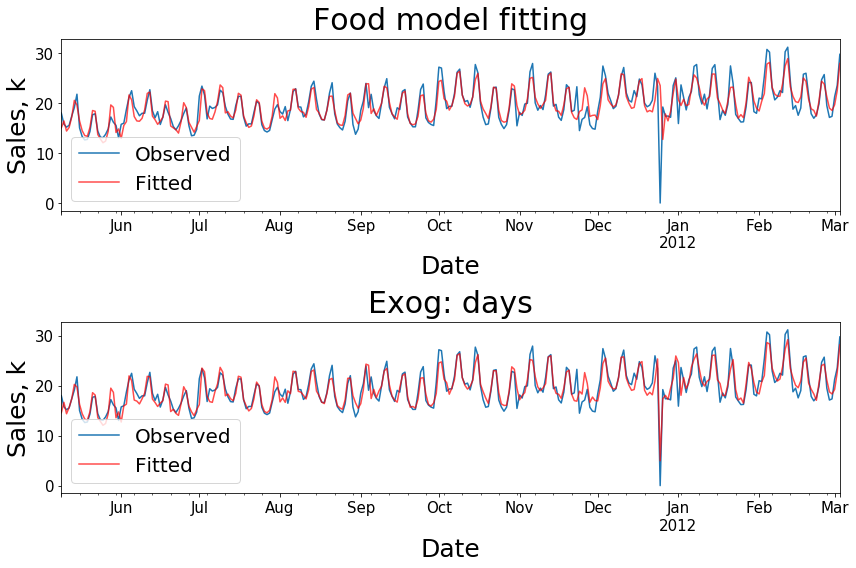

SMAPE: 3.43393% vs 3.33843%


In [108]:
compareFitting(train.food, (food_model,food_model_exog_days), ('Food model fitting','Exog: days'))

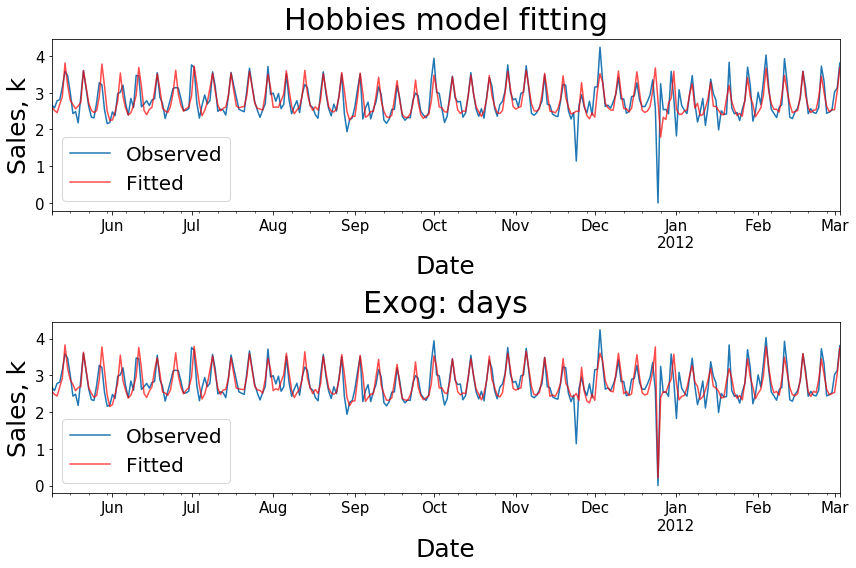

SMAPE: 3.99129% vs 3.97837%


In [109]:
compareFitting(train.hobbies, (hobbies_model,hobbies_model_exog_days), ('Hobbies model fitting','Exog: days'))

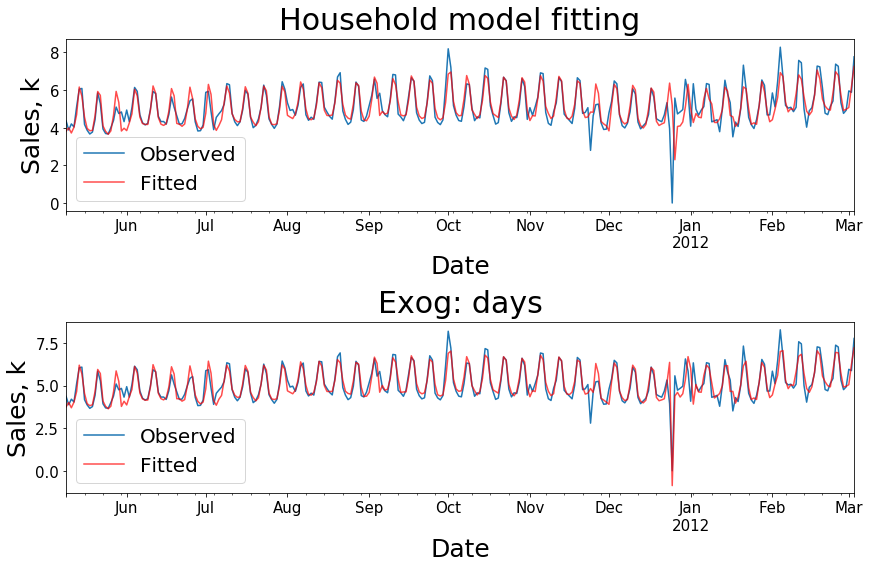

SMAPE: 3.47966% vs 3.38924%


In [110]:
compareFitting(train.household, (household_model,household_model_exog_days), ('Household model fitting','Exog: days'))

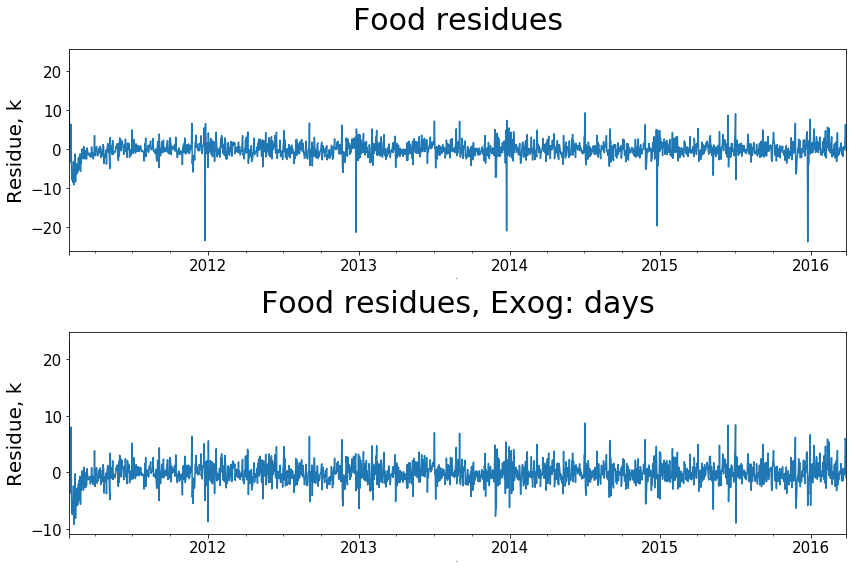

Student's test: p=0.01809 vs p=0.01967
Dickey–Fuller test: p=4.606989e-15 vs p=4.147126e-16


In [111]:
residuesCompare((food_model,food_model_exog_days),('Food residues','Food residues, Exog: days'))

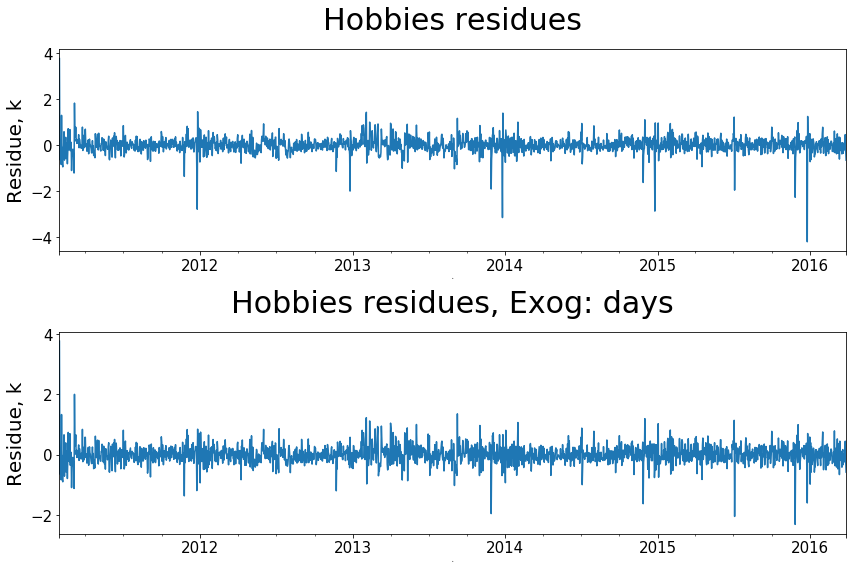

Student's test: p=0.79399 vs p=0.45676
Dickey–Fuller test: p=0.000000e+00 vs p=0.000000e+00


In [112]:
residuesCompare((hobbies_model,hobbies_model_exog_days),('Hobbies residues','Hobbies residues, Exog: days'))

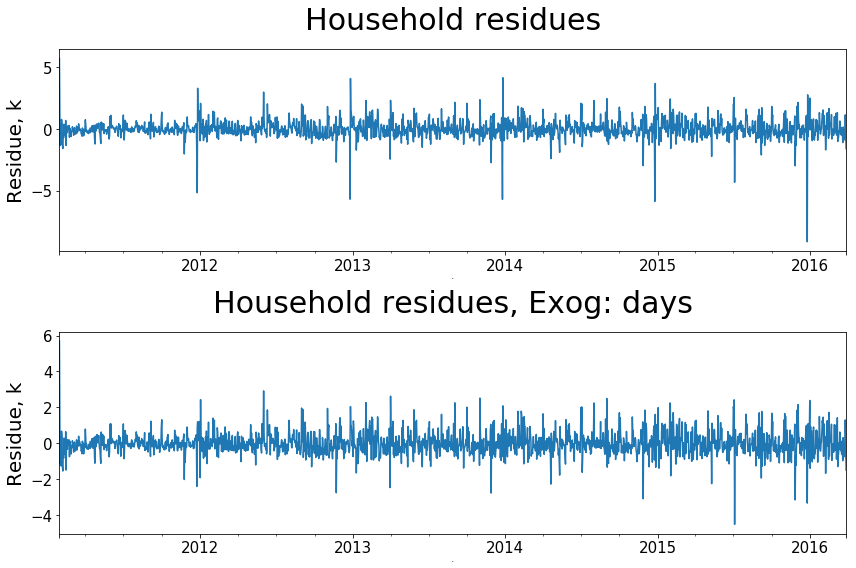

Student's test: p=0.66970 vs p=0.55594
Dickey–Fuller test: p=0.000000e+00 vs p=8.662545e-17


In [113]:
residuesCompare((household_model,household_model_exog_days),('Household residues','Household residues, Exog: days'))

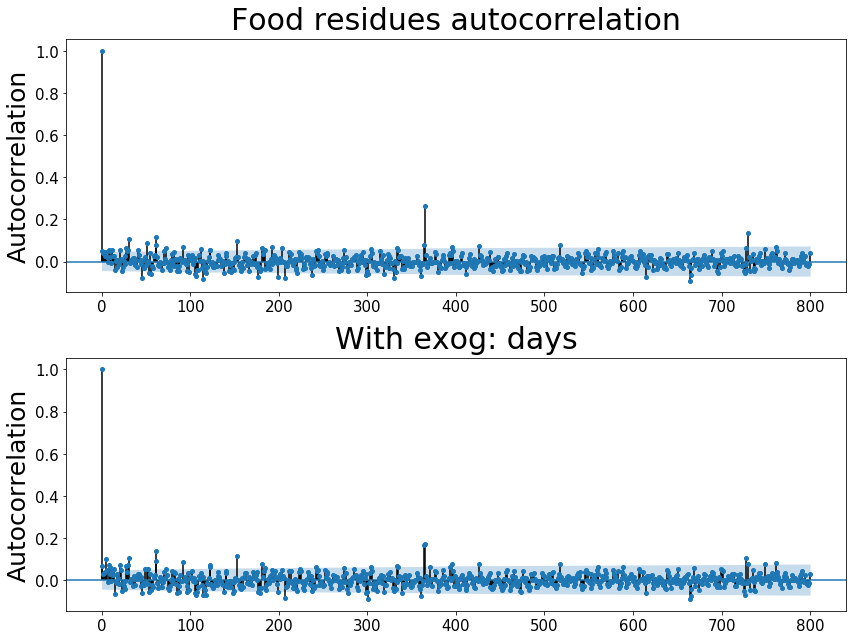

In [114]:
autocorrelationCompare((food_model,food_model_exog_days),('Food residues autocorrelation','With exog: days'))

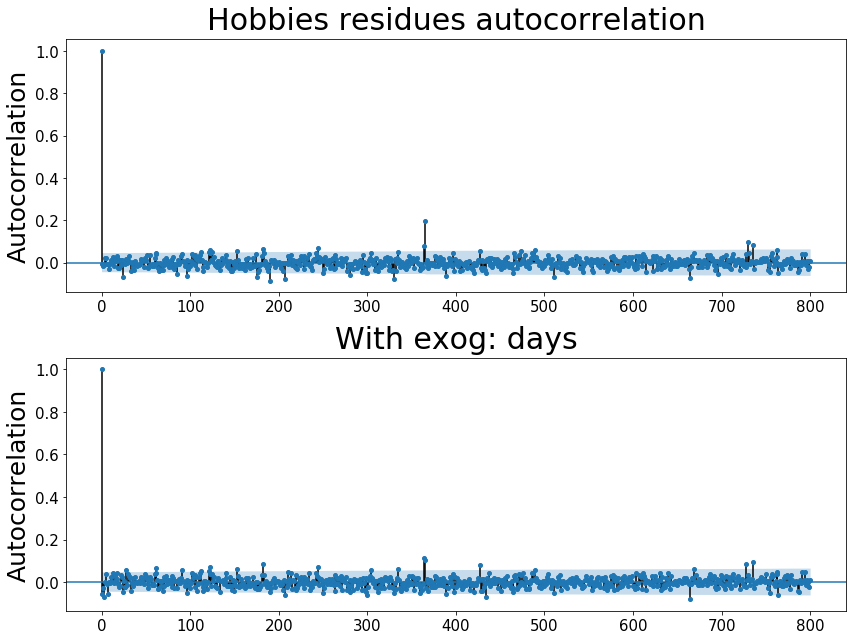

In [115]:
autocorrelationCompare((hobbies_model,hobbies_model_exog_days),('Hobbies residues autocorrelation','With exog: days'))

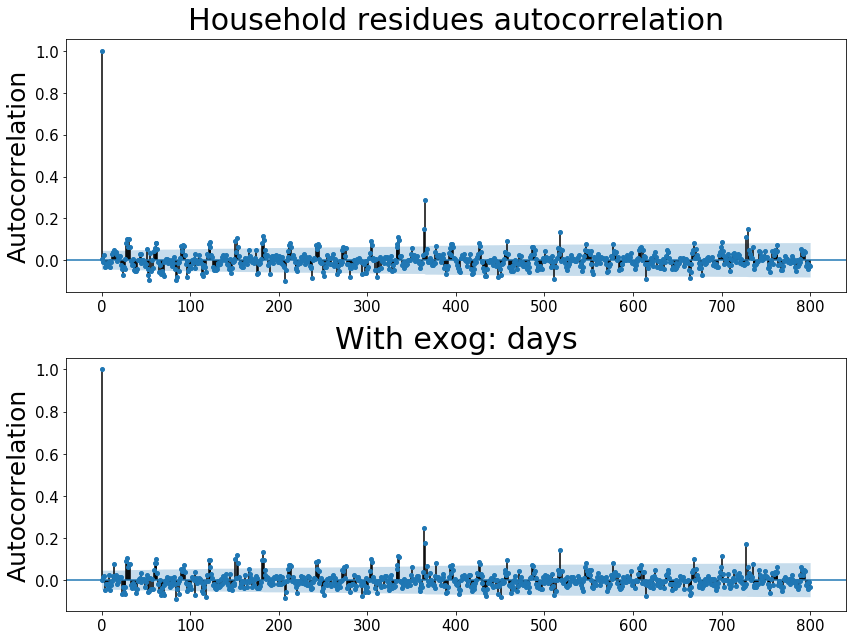

In [116]:
autocorrelationCompare((household_model,household_model_exog_days),('Household residues autocorrelation','With exog: days'))

In [117]:
food_future_exog_days=food_model_exog_days.predict(start=1885, end=1884+28, exog=exog_days_test)
food_future_exog_days=pd.DataFrame(food_future_exog_days, columns=['future'])
food_comparison_exog_days=pd.concat([food_future_exog_days, test_set.food], axis=1)
food_comparison_exog_days.rename(columns={'food':'sales'}, inplace=True)
food_comparison_exog_days.future[0]=food_comparison_exog_days.sales[0]
food_comparison_exog_days.head()

future    sales
2016-03-27  32236.000000  32236.0
2016-03-28  25988.988159  23285.0
2016-03-29  24998.147220  22191.0
2016-03-30  24103.041507  21017.0
2016-03-31  25012.501517  22127.0

In [118]:
hobbies_future_exog_days=hobbies_model_exog_days.predict(start=1885, end=1884+28, exog=exog_days_test)
hobbies_future_exog_days=pd.DataFrame(hobbies_future_exog_days, columns=['future'])
hobbies_comparison_exog_days=pd.concat([hobbies_future_exog_days, test_set.hobbies], axis=1)
hobbies_comparison_exog_days.rename(columns={'hobbies':'sales'}, inplace=True)
hobbies_comparison_exog_days.future[0]=hobbies_comparison_exog_days.sales[0]
hobbies_comparison_exog_days.head()

future   sales
2016-03-27  3643.000000  3643.0
2016-03-28  3377.865365  3555.0
2016-03-29  3309.511539  3446.0
2016-03-30  3330.805633  3333.0
2016-03-31  3408.114210  3421.0

In [119]:
household_future_exog_days=household_model_exog_days.predict(start=1885, end=1884+28, exog=exog_days_test)
household_future_exog_days=pd.DataFrame(household_future_exog_days, columns=['future'])
household_comparison_exog_days=pd.concat([household_future_exog_days, test_set.household], axis=1)
household_comparison_exog_days.rename(columns={'household':'sales'}, inplace=True)
household_comparison_exog_days.future[0]=household_comparison_exog_days.sales[0]
household_comparison_exog_days.head()

future    sales
2016-03-27  10481.000000  10481.0
2016-03-28   8647.324684   9201.0
2016-03-29   8137.164910   8220.0
2016-03-30   8267.032858   8009.0
2016-03-31   8413.156232   9133.0

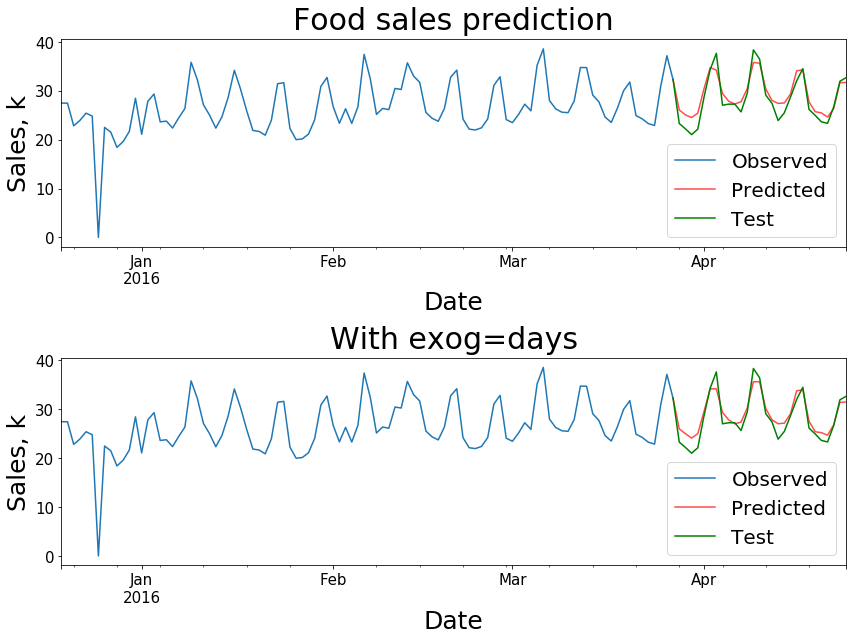

SMAPE = 2.92324% vs 2.66326%


In [120]:
predictionsCompare(train.food, (food_comparison, food_comparison_exog_days), ('Food sales prediction','With exog=days'))

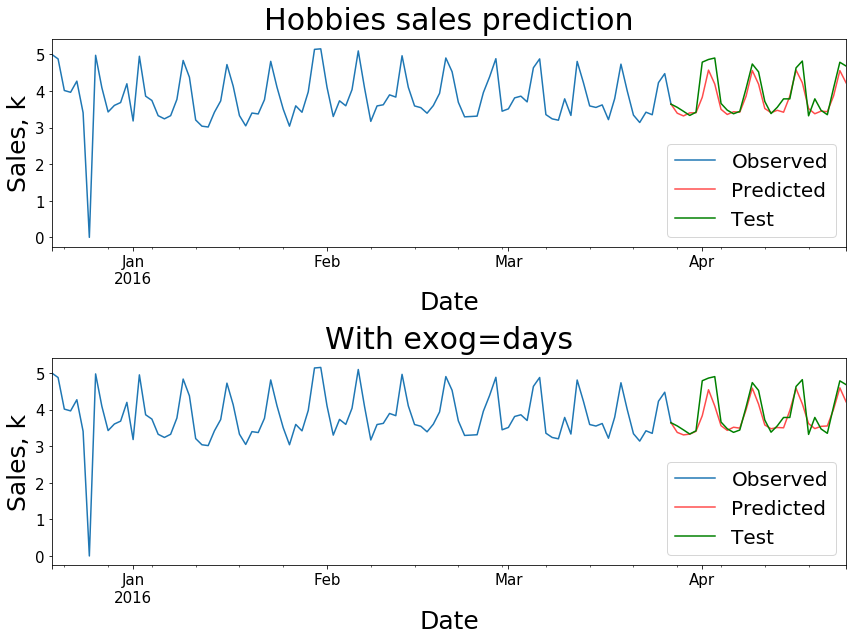

SMAPE = 2.81584% vs 2.80285%


In [121]:
predictionsCompare(train.hobbies, (hobbies_comparison, hobbies_comparison_exog_days), ('Hobbies sales prediction','With exog=days'))

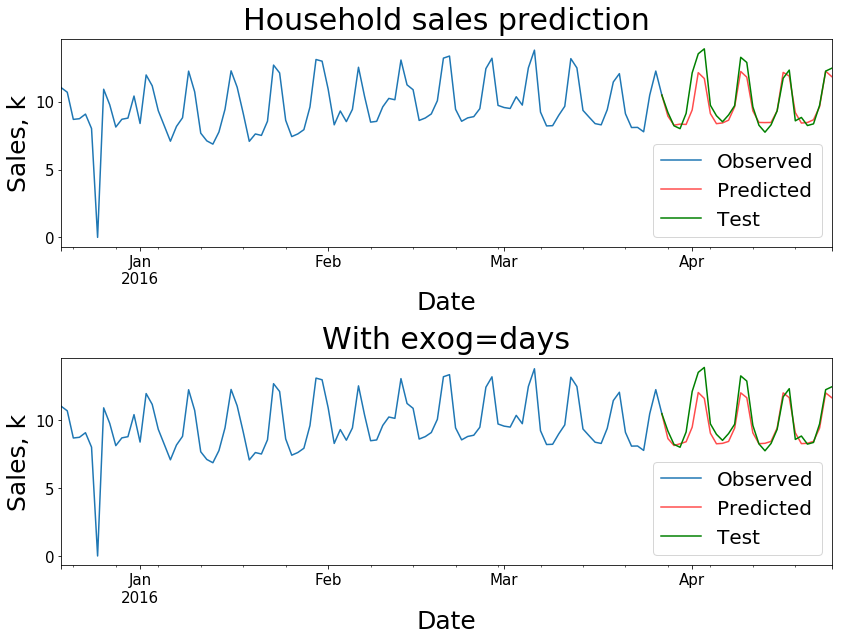

SMAPE = 2.76053% vs 3.02261%


In [122]:
predictionsCompare(train.household, (household_comparison, household_comparison_exog_days), ('Household sales prediction','With exog=days'))

# Second exog set: events

In [1203]:
train.columns

Index(['food', 'hobbies', 'household', 'is_saturday', 'is_sunday', 'is_monday',
       'is_friday', 'is_day_off', 'is_sporting', 'is_cultural', 'is_national',
       'is_religious', 'is_day_off_tomorrow', 'is_sporting_tomorrow',
       'is_cultural_tomorrow', 'is_national_tomorrow', 'is_religious_tomorrow',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [261]:
def showCorrelationEvents():
    fig, axes = plt.subplots(figsize=(15,8))

    ind=pd.Index(['food sales', 'hobbies sales', 'household sales', 'is_sporting', 'is_cultural',
                  'is_national', 'is_religious', 'is_sporting_tomorrow', 'is_cultural_tomorrow',
                  'is_national_tomorrow', 'is_religious_tomorrow'])

    sns.heatmap(features[ind].corr(), annot = True,  cbar=False, ax=axes)

    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_title('Feature correlation', fontdict={'fontsize':30}, pad=20)

    plt.yticks(rotation=0) 
    plt.xticks(rotation=-90) 

    plt.show()
    
    print("Target: food sales, hobbies sales, household sales")

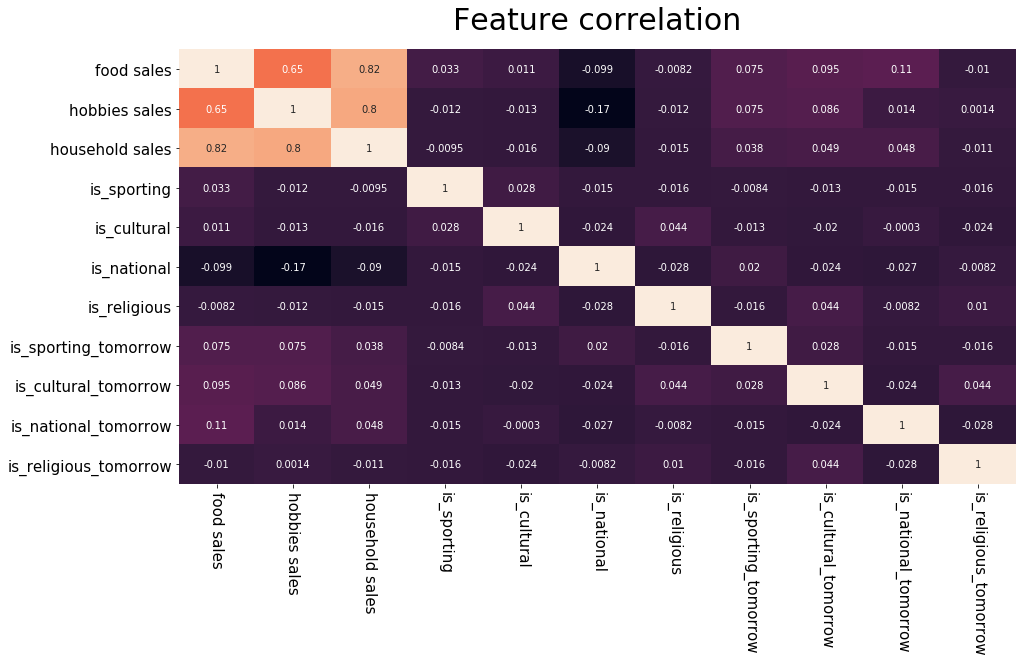

Target: food sales, hobbies sales, household sales


In [262]:
showCorrelationEvents()

In [123]:
k=4
exog_events = np.zeros([len(train), k])
exog_events[:,0]=train.is_national
exog_events[:,1]=train.is_sporting_tomorrow
exog_events[:,2]=train.is_cultural_tomorrow
exog_events[:,3]=train.is_national_tomorrow

exog_events_test = np.zeros([28, k])
exog_events_test[:,0]=test_set.is_national[1:]
exog_events_test[:,1]=test_set.is_sporting_tomorrow[1:]
exog_events_test[:,2]=test_set.is_cultural_tomorrow[1:]
exog_events_test[:,3]=test_set.is_national_tomorrow[1:]

In [124]:
food_model_exog_events=get_best_model_exog(train.food, exog_events, food_result_table)

In [125]:
food_model_exog_events.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                            food   No. Observations:                 1885
Model:             SARIMAX(5, 1, 3)x(5, 1, [1, 2, 3, 4, 5], 7)   Log Likelihood              -17227.448
Date:                                         Tue, 26 May 2020   AIC                          34500.895
Time:                                                 08:22:31   BIC                          34628.256
Sample:                                             01-29-2011   HQIC                         34547.810
                                                  - 03-27-2016                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -155.0921    348.945     -0.444      0.657    -839.011     528.827
x2          1923.1332    774.158      2.484      0.013     405.811    3440.455
x3          1378.7744    596.676      2.311      0.021     209.312    2548.237
x4           449.7951    377.253      1.192      0.233    -289.608    1189.198
ar.L1         -0.5752      1.298     -0.443      0.658      -3.119       1.969
ar.L2         -0.0862      0.688     -0.125      0.900      -1.436       1.263
ar.L3          0.0415      0.206      0.201      0.841      -0.363       0.446
ar.L4          0.0118      0.066      0.178      0.859      -0.118       0.142
ar.L5         -0.0393      0.085     -0.461      0.645      -0.206       0.128
ma.L1         -0.1181      1.297     -0.091      0.927      -2.659       2.423
ma.L2         -0.5155      0.644     -0.801      0.423      -1.777       0.746
ma.L3         -0.2219      0.890     -0.249      0.803      -1.966       1.522
ar.S.L7       -1.4547      0.094    -15.541      0.000      -1.638      -1.271
ar.S.L14      -1.1854      0.125     -9.485      0.000      -1.430      -0.940
ar.S.L21      -1.3791      0.110    -12.567      0.000      -1.594      -1.164
ar.S.L28      -0.6634      0.128     -5.167      0.000      -0.915      -0.412
ar.S.L35       0.1666      0.074      2.262      0.024       0.022       0.311
ma.S.L7        0.6011      0.086      6.957      0.000       0.432       0.770
ma.S.L14      -0.1794      0.076     -2.359      0.018      -0.328      -0.030
ma.S.L21       0.1687      0.068      2.479      0.013       0.035       0.302
ma.S.L28      -0.6515      0.063    -10.356      0.000      -0.775      -0.528
ma.S.L35      -0.9381      0.072    -13.032      0.000      -1.079      -0.797
sigma2      8.163e+06      0.014   5.64e+08      0.000    8.16e+06    8.16e+06
===================================================================================
Ljung-Box (Q):                      110.42   Jarque-Bera (JB):             52261.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -2.32
Prob(H) (two-sided):                  0.01   Kurtosis:                        28.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.85e+24. Standard errors may be unstable.
"""

In [126]:
hobbies_model_exog_events=get_best_model_exog(train.hobbies, exog_events, hobbies_result_table)

In [127]:
hobbies_model_exog_events.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           hobbies   No. Observations:                 1885
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 7)   Log Likelihood              -13620.163
Date:                           Tue, 26 May 2020   AIC                          27274.325
Time:                                   08:25:09   BIC                          27368.462
Sample:                               01-29-2011   HQIC                         27309.001
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -342.7483     30.195    -11.351      0.000    -401.929    -283.568
x2           204.2532     70.082      2.914      0.004      66.894     341.612
x3           165.1387     55.639      2.968      0.003      56.089     274.188
x4           -75.6745     37.704     -2.007      0.045    -149.574      -1.775
ar.L1         -0.7403      0.025    -29.506      0.000      -0.789      -0.691
ar.L2          0.3046      0.027     11.090      0.000       0.251       0.358
ar.L3          0.1345      0.030      4.422      0.000       0.075       0.194
ar.L4          0.0691      0.027      2.591      0.010       0.017       0.121
ma.L1          0.0278      0.021      1.343      0.179      -0.013       0.068
ma.L2         -0.9505      0.021    -45.443      0.000      -0.992      -0.910
ar.S.L7       -0.8329      0.081    -10.332      0.000      -0.991      -0.675
ar.S.L14       0.1424      0.036      3.975      0.000       0.072       0.213
ar.S.L21       0.1079      0.037      2.920      0.004       0.035       0.180
ar.S.L28       0.0571      0.027      2.095      0.036       0.004       0.110
ma.S.L7       -0.0956      0.108     -0.883      0.377      -0.308       0.117
ma.S.L14      -0.9038      0.104     -8.661      0.000      -1.108      -0.699
sigma2      1.151e+05   8557.790     13.455      0.000    9.84e+04    1.32e+05
===================================================================================
Ljung-Box (Q):                       40.73   Jarque-Bera (JB):             20880.68
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
household_model_exog_events=get_best_model_exog(train.household, exog_events, household_result_table)

In [129]:
household_model_exog_events.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         household   No. Observations:                 1885
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -15149.444
Date:                           Tue, 26 May 2020   AIC                          30324.887
Time:                                   08:26:55   BIC                          30396.874
Sample:                               01-29-2011   HQIC                         30351.404
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -232.8561     52.147     -4.465      0.000    -335.062    -130.650
x2           373.1563    191.158      1.952      0.051      -1.506     747.818
x3           468.5239    140.041      3.346      0.001     194.049     742.999
x4           -70.6304     37.989     -1.859      0.063    -145.087       3.826
ar.L1         -0.5710      0.019    -30.226      0.000      -0.608      -0.534
ar.L2          0.4119      0.018     22.410      0.000       0.376       0.448
ma.L1          0.0248      0.009      2.623      0.009       0.006       0.043
ma.L2         -0.9618      0.010    -97.392      0.000      -0.981      -0.942
ar.S.L7        1.1603      0.103     11.232      0.000       0.958       1.363
ar.S.L14      -0.1619      0.006    -28.534      0.000      -0.173      -0.151
ma.S.L7       -1.9934      0.132    -15.118      0.000      -2.252      -1.735
ma.S.L14       0.9934      0.131      7.576      0.000       0.736       1.250
sigma2      7.099e+05      0.158   4.49e+06      0.000     7.1e+05     7.1e+05
===================================================================================
Ljung-Box (Q):                      222.61   Jarque-Bera (JB):             26977.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.73   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.89e+22. Standard errors may be unstable.
"""

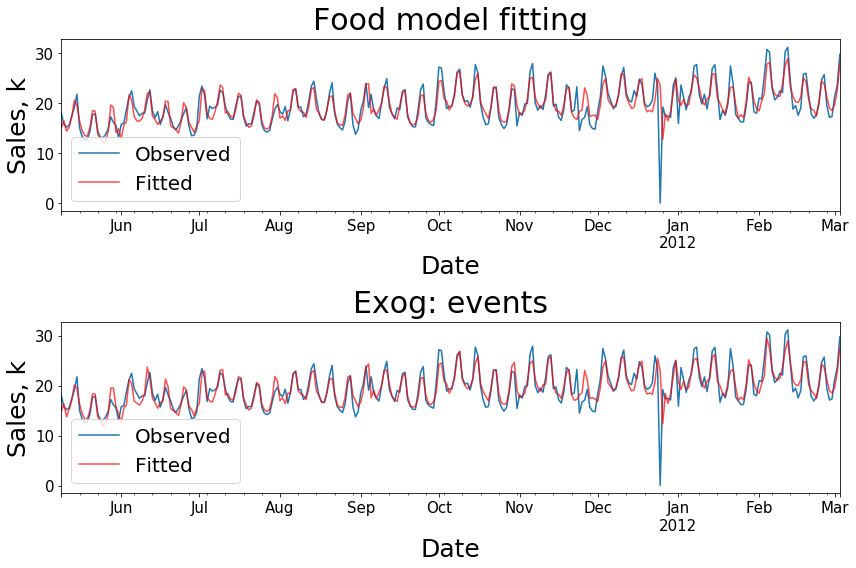

SMAPE: 3.43393% vs 3.44469%


In [130]:
compareFitting(train.food, (food_model,food_model_exog_events), ('Food model fitting','Exog: events'))

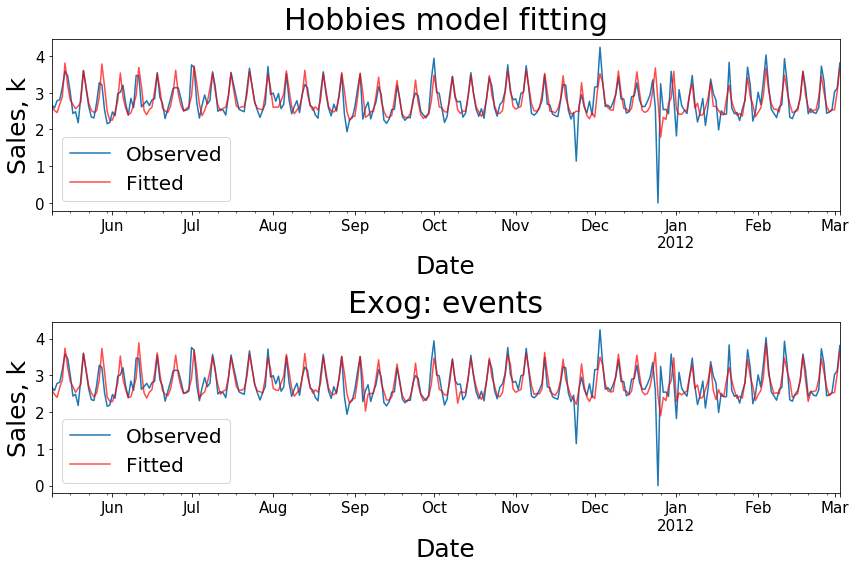

SMAPE: 3.99129% vs 4.02635%


In [131]:
compareFitting(train.hobbies, (hobbies_model,hobbies_model_exog_events), ('Hobbies model fitting','Exog: events'))

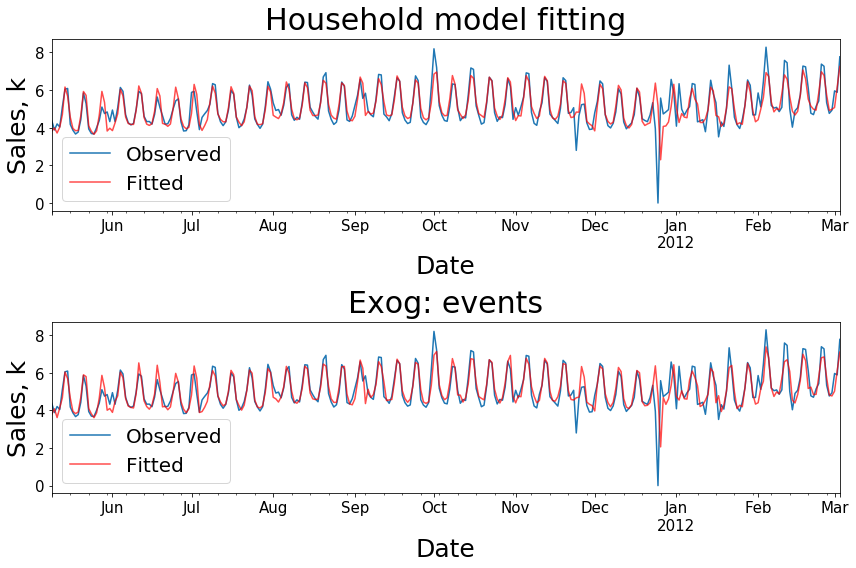

SMAPE: 3.47966% vs 3.63998%


In [132]:
compareFitting(train.household, (household_model,household_model_exog_events), ('Household model fitting','Exog: events'))

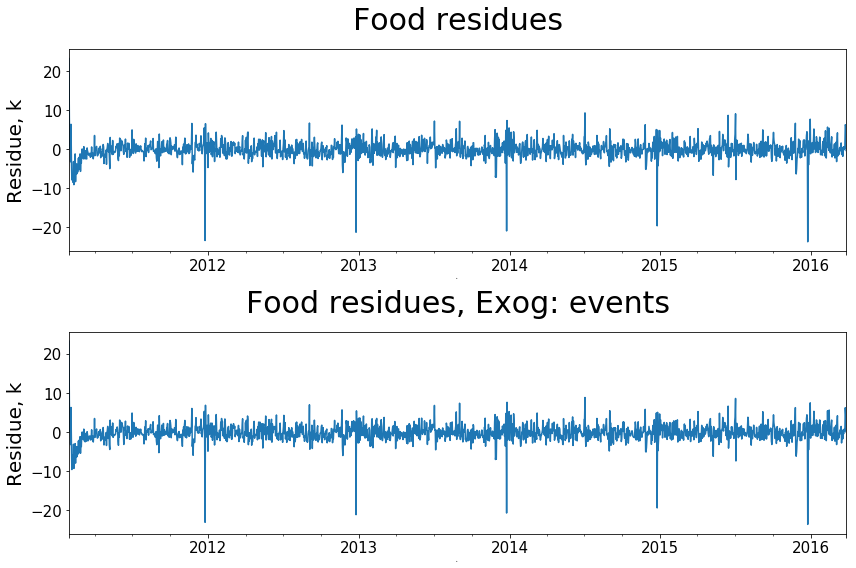

Student's test: p=0.01809 vs p=0.01913
Dickey–Fuller test: p=4.606989e-15 vs p=0.000000e+00


In [133]:
residuesCompare((food_model,food_model_exog_events),('Food residues','Food residues, Exog: events'))

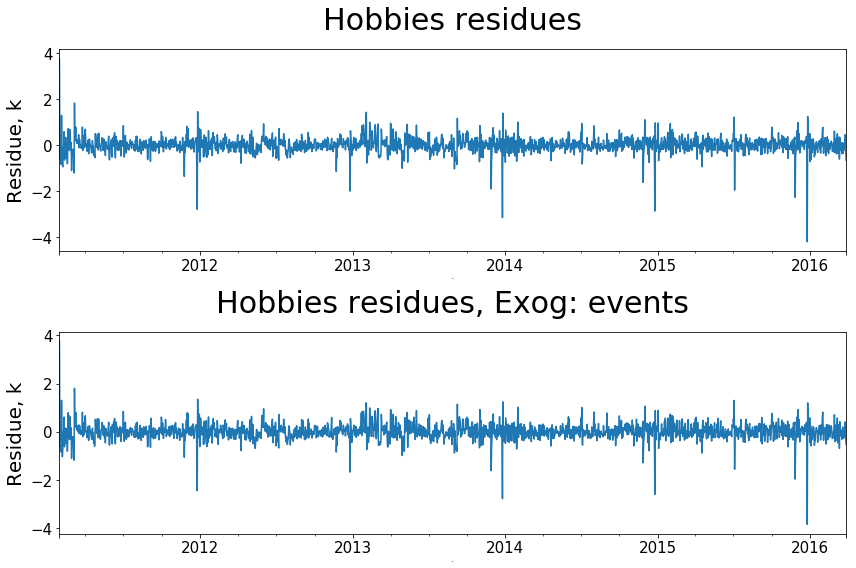

Student's test: p=0.79399 vs p=0.61615
Dickey–Fuller test: p=0.000000e+00 vs p=0.000000e+00


In [134]:
residuesCompare((hobbies_model,hobbies_model_exog_events),('Hobbies residues','Hobbies residues, Exog: events'))

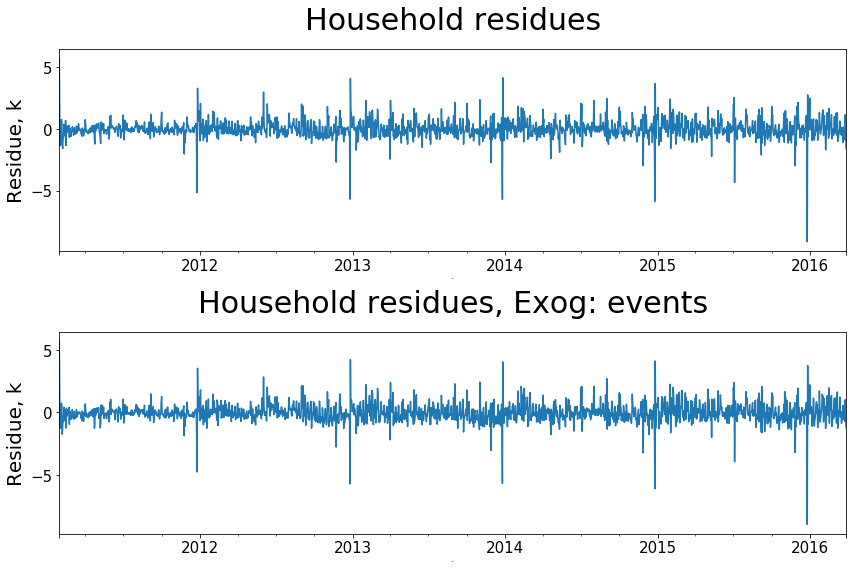

Student's test: p=0.66970 vs p=0.36901
Dickey–Fuller test: p=0.000000e+00 vs p=1.322744e-09


In [135]:
residuesCompare((household_model,household_model_exog_events),('Household residues','Household residues, Exog: events'))

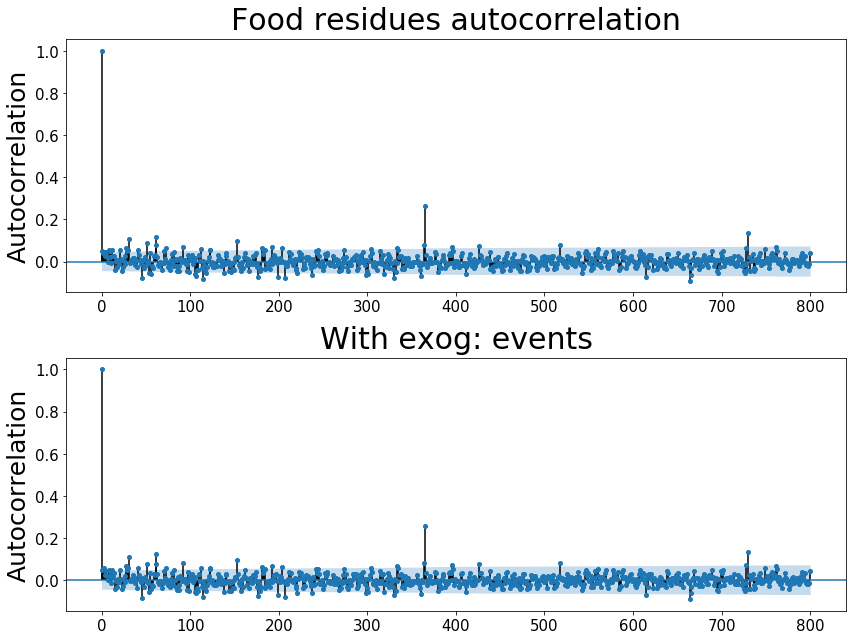

In [136]:
autocorrelationCompare((food_model,food_model_exog_events),('Food residues autocorrelation','With exog: events'))

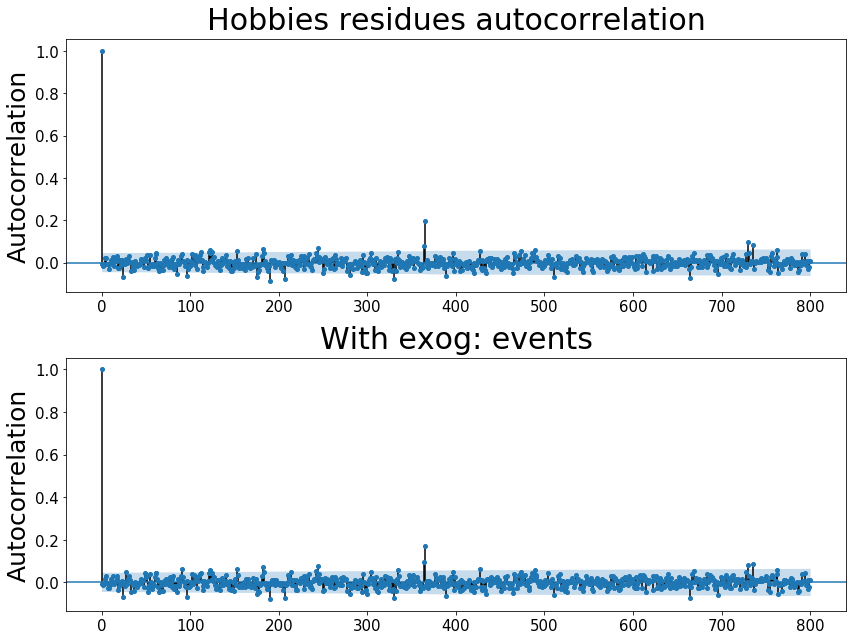

In [137]:
autocorrelationCompare((hobbies_model,hobbies_model_exog_events),('Hobbies residues autocorrelation','With exog: events'))

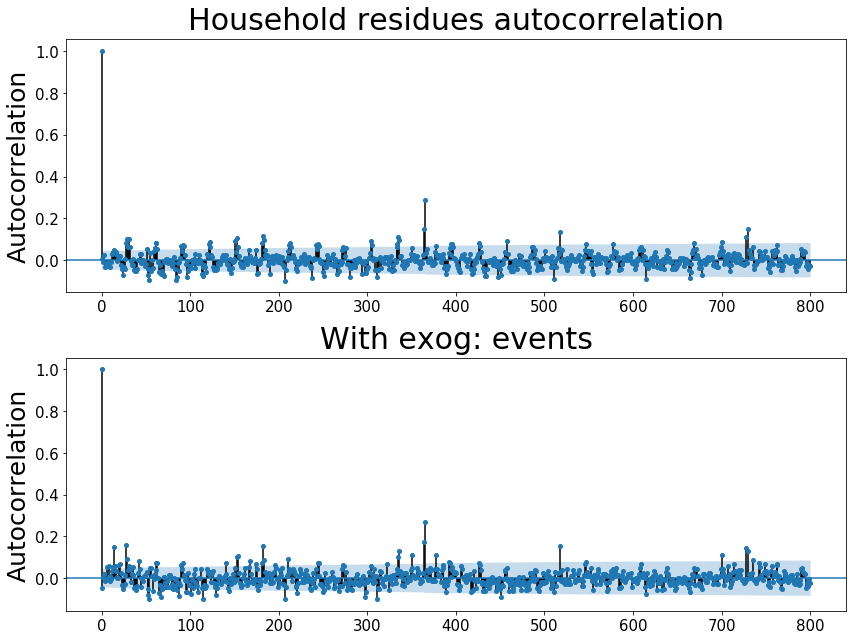

In [138]:
autocorrelationCompare((household_model,household_model_exog_events),('Household residues autocorrelation','With exog: events'))

In [139]:
food_future_exog_events=food_model_exog_events.predict(start=1885, end=1884+28, exog=exog_events_test)
food_future_exog_events=pd.DataFrame(food_future_exog_events, columns=['future'])
food_comparison_exog_events=pd.concat([food_future_exog_events, test_set.food], axis=1)
food_comparison_exog_events.rename(columns={'food':'sales'}, inplace=True)
food_comparison_exog_events.future[0]=food_comparison_exog_events.sales[0]
food_comparison_exog_events.head()

future    sales
2016-03-27  32236.000000  32236.0
2016-03-28  25922.548117  23285.0
2016-03-29  24888.397535  22191.0
2016-03-30  24279.428130  21017.0
2016-03-31  25333.002540  22127.0

In [140]:
hobbies_future_exog_events=hobbies_model_exog_events.predict(start=1885, end=1884+28, exog=exog_events_test)
hobbies_future_exog_events=pd.DataFrame(hobbies_future_exog_events, columns=['future'])
hobbies_comparison_exog_events=pd.concat([hobbies_future_exog_events, test_set.hobbies], axis=1)
hobbies_comparison_exog_events.rename(columns={'hobbies':'sales'}, inplace=True)
hobbies_comparison_exog_events.future[0]=hobbies_comparison_exog_events.sales[0]
hobbies_comparison_exog_events.head()

future   sales
2016-03-27  3643.000000  3643.0
2016-03-28  3455.617383  3555.0
2016-03-29  3330.445328  3446.0
2016-03-30  3384.528411  3333.0
2016-03-31  3396.322728  3421.0

In [141]:
household_future_exog_events=household_model_exog_events.predict(start=1885, end=1884+28, exog=exog_events_test)
household_future_exog_events=pd.DataFrame(household_future_exog_events, columns=['future'])
household_comparison_exog_events=pd.concat([household_future_exog_events, test_set.household], axis=1)
household_comparison_exog_events.rename(columns={'household':'sales'}, inplace=True)
household_comparison_exog_events.future[0]=household_comparison_exog_events.sales[0]
household_comparison_exog_events.head()

future    sales
2016-03-27  10481.000000  10481.0
2016-03-28   8882.392902   9201.0
2016-03-29   8471.759769   8220.0
2016-03-30   8496.647897   8009.0
2016-03-31   8583.578736   9133.0

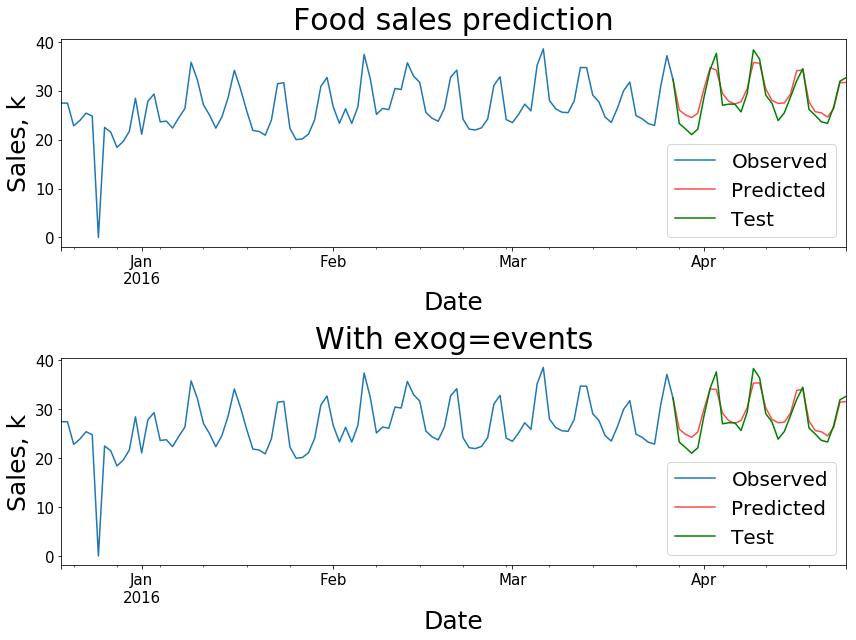

SMAPE = 2.92324% vs 2.83262%


In [143]:
predictionsCompare(train.food, (food_comparison, food_comparison_exog_events), ('Food sales prediction','With exog=events'))

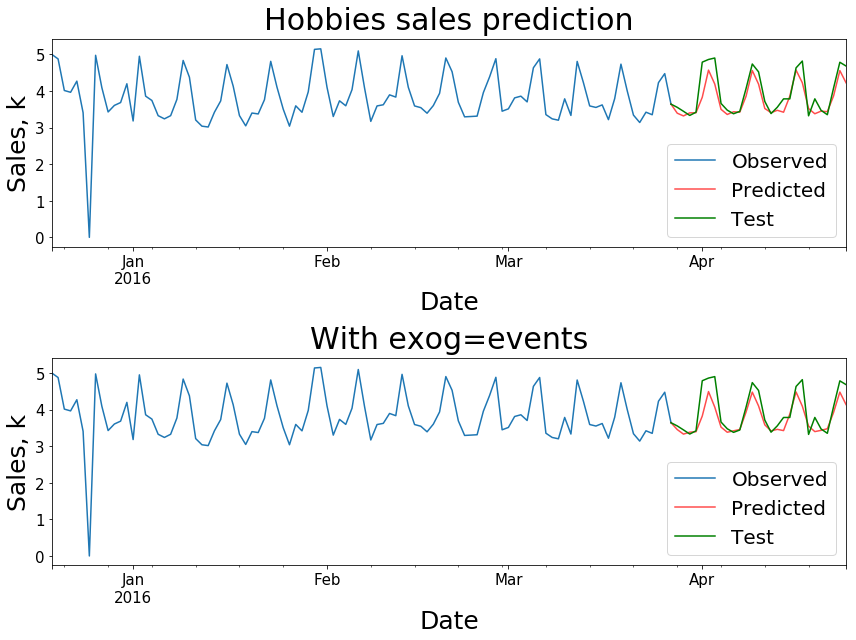

SMAPE = 2.81584% vs 3.01560%


In [144]:
predictionsCompare(train.hobbies, (hobbies_comparison, hobbies_comparison_exog_events), ('Hobbies sales prediction','With exog=events'))

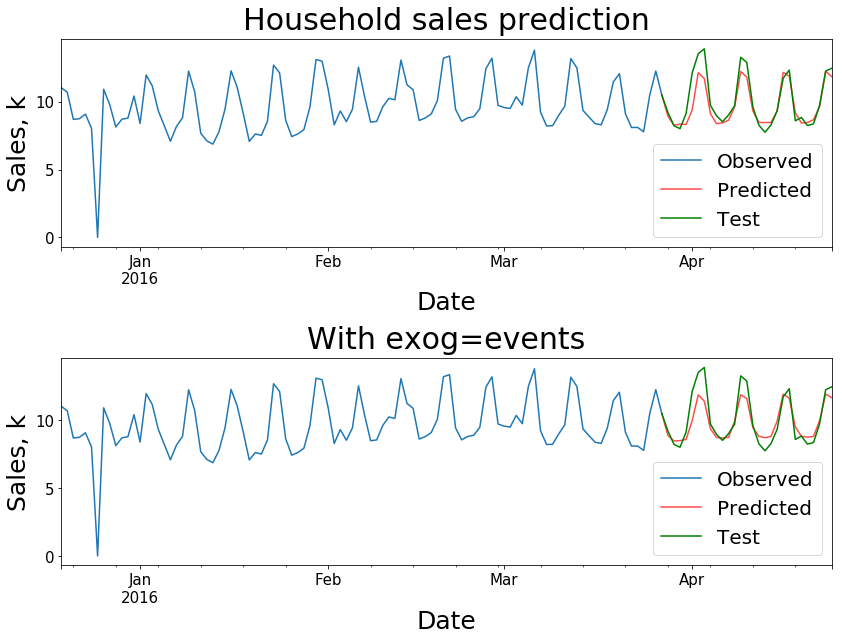

SMAPE = 2.76053% vs 3.20296%


In [145]:
predictionsCompare(train.household, (household_comparison, household_comparison_exog_events), ('Household sales prediction','With exog=events'))

# Third exog set: snap

In [22]:
train.columns

Index(['food', 'hobbies', 'household', 'is_saturday', 'is_sunday', 'is_monday',
       'is_friday', 'is_day_off', 'is_sporting', 'is_cultural', 'is_national',
       'is_religious', 'is_day_off_tomorrow', 'is_sporting_tomorrow',
       'is_cultural_tomorrow', 'is_national_tomorrow', 'is_religious_tomorrow',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [23]:
def showCorrelationSnap():
    fig, axes = plt.subplots(figsize=(15,8))

    ind=pd.Index(['food sales', 'hobbies sales', 'household sales', 'snap_CA', 'snap_TX', 'snap_WI'])

    sns.heatmap(features[ind].corr(), annot = True,  cbar=False, ax=axes)

    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_title('Feature correlation', fontdict={'fontsize':30}, pad=20)

    plt.yticks(rotation=0) 
    plt.xticks(rotation=-90) 

    plt.show()
    
    print("Target: food sales, hobbies sales, household sales")

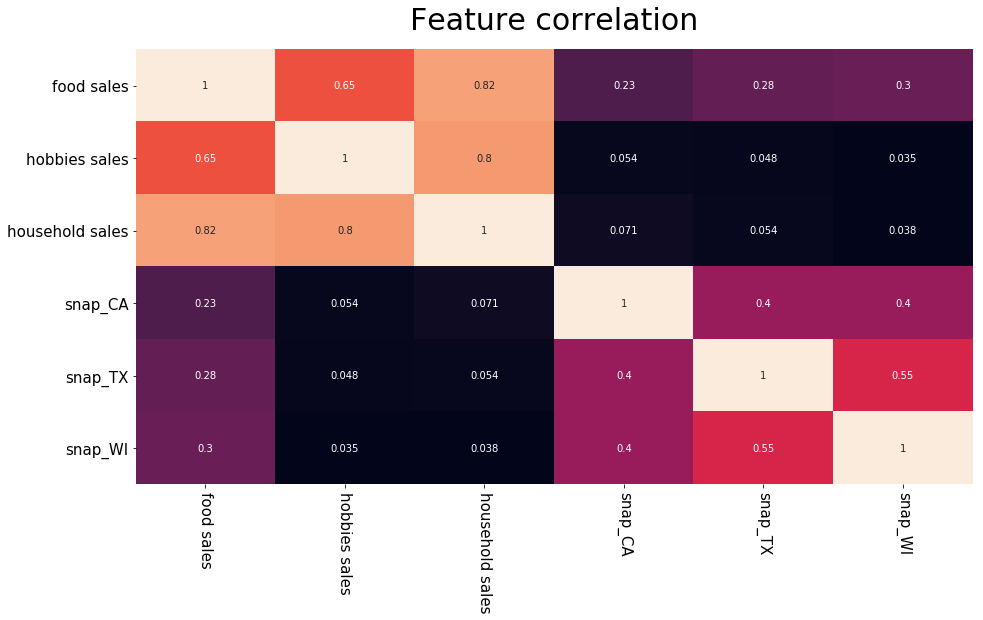

Target: food sales, hobbies sales, household sales


In [24]:
showCorrelationSnap()

In [146]:
k=3
exog_snap = np.zeros([len(train), k])
exog_snap[:,0]=train.snap_CA
exog_snap[:,1]=train.snap_TX
exog_snap[:,2]=train.snap_WI

exog_snap_test = np.zeros([28, k])
exog_snap_test[:,0]=test_set.snap_CA[1:]
exog_snap_test[:,1]=test_set.snap_TX[1:]
exog_snap_test[:,2]=test_set.snap_WI[1:]

In [147]:
food_model_exog_snap=get_best_model_exog(train.food, exog_snap, food_result_table)

In [148]:
food_model_exog_snap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                            food   No. Observations:                 1885
Model:             SARIMAX(5, 1, 3)x(5, 1, [1, 2, 3, 4, 5], 7)   Log Likelihood              -17027.919
Date:                                         Tue, 26 May 2020   AIC                          34099.839
Time:                                                 08:31:21   BIC                          34221.662
Sample:                                             01-29-2011   HQIC                         34144.714
                                                  - 03-27-2016                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1340.6134    324.408      4.132      0.000     704.786    1976.441
x2          1165.0196    185.759      6.272      0.000     800.939    1529.100
x3          1174.6941    209.187      5.616      0.000     764.694    1584.694
ar.L1         -0.2991      0.670     -0.446      0.655      -1.613       1.014
ar.L2         -0.3800      0.491     -0.773      0.439      -1.343       0.583
ar.L3          0.1196      0.124      0.965      0.334      -0.123       0.362
ar.L4          0.0242      0.056      0.430      0.667      -0.086       0.135
ar.L5          0.0577      0.039      1.496      0.135      -0.018       0.133
ma.L1         -0.3956      0.670     -0.591      0.555      -1.708       0.917
ma.L2         -0.0318      0.746     -0.043      0.966      -1.494       1.431
ma.L3         -0.4724      0.448     -1.054      0.292      -1.351       0.406
ar.S.L7       -1.2244      0.118    -10.357      0.000      -1.456      -0.993
ar.S.L14      -1.1288      0.116     -9.702      0.000      -1.357      -0.901
ar.S.L21      -1.1060      0.108    -10.234      0.000      -1.318      -0.894
ar.S.L28      -0.5665      0.132     -4.305      0.000      -0.824      -0.309
ar.S.L35       0.2331      0.055      4.224      0.000       0.125       0.341
ma.S.L7        0.4494      0.117      3.842      0.000       0.220       0.679
ma.S.L14       0.0090      0.075      0.119      0.905      -0.138       0.156
ma.S.L21      -0.0304      0.076     -0.397      0.691      -0.180       0.119
ma.S.L28      -0.5236      0.072     -7.296      0.000      -0.664      -0.383
ma.S.L35      -0.8942      0.118     -7.582      0.000      -1.125      -0.663
sigma2      6.077e+06      0.116   5.26e+07      0.000    6.08e+06    6.08e+06
===================================================================================
Ljung-Box (Q):                       84.55   Jarque-Bera (JB):            113329.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+22. Standard errors may be unstable.
"""

In [149]:
hobbies_model_exog_snap=get_best_model_exog(train.hobbies, exog_snap, hobbies_result_table)

In [150]:
hobbies_model_exog_snap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           hobbies   No. Observations:                 1885
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 7)   Log Likelihood              -13667.781
Date:                           Tue, 26 May 2020   AIC                          27367.561
Time:                                   08:33:43   BIC                          27456.160
Sample:                               01-29-2011   HQIC                         27400.198
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           108.4070     24.360      4.450      0.000      60.662     156.152
x2            63.3261     19.633      3.226      0.001      24.846     101.806
x3            11.5109     22.295      0.516      0.606     -32.186      55.208
ar.L1         -0.7416      0.021    -34.768      0.000      -0.783      -0.700
ar.L2          0.3037      0.027     11.384      0.000       0.251       0.356
ar.L3          0.1523      0.030      5.052      0.000       0.093       0.211
ar.L4          0.0808      0.027      2.953      0.003       0.027       0.134
ma.L1          0.0235      0.017      1.361      0.173      -0.010       0.057
ma.L2         -0.9518      0.018    -54.151      0.000      -0.986      -0.917
ar.S.L7       -0.8277      0.051    -16.188      0.000      -0.928      -0.727
ar.S.L14       0.1677      0.033      5.110      0.000       0.103       0.232
ar.S.L21       0.0979      0.038      2.597      0.009       0.024       0.172
ar.S.L28       0.0513      0.028      1.828      0.067      -0.004       0.106
ma.S.L7       -0.0696      0.083     -0.836      0.403      -0.233       0.094
ma.S.L14      -0.9297      0.079    -11.722      0.000      -1.085      -0.774
sigma2      1.206e+05   7969.376     15.139      0.000    1.05e+05    1.36e+05
===================================================================================
Ljung-Box (Q):                       43.66   Jarque-Bera (JB):             37015.78
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -2.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
household_model_exog_snap=get_best_model_exog(train.household, exog_snap, household_result_table)

In [152]:
household_model_exog_snap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         household   No. Observations:                 1885
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -15110.230
Date:                           Tue, 26 May 2020   AIC                          30244.461
Time:                                   08:34:52   BIC                          30310.910
Sample:                               01-29-2011   HQIC                         30268.938
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           391.2540     71.564      5.467      0.000     250.992     531.516
x2           221.1891     56.920      3.886      0.000     109.627     332.751
x3           -12.4506     28.356     -0.439      0.661     -68.027      43.126
ar.L1         -0.7372      0.033    -22.295      0.000      -0.802      -0.672
ar.L2          0.2619      0.026      9.903      0.000       0.210       0.314
ma.L1          0.1155      0.032      3.619      0.000       0.053       0.178
ma.L2         -0.8825      0.032    -27.893      0.000      -0.945      -0.821
ar.S.L7        1.0028      0.045     22.409      0.000       0.915       1.090
ar.S.L14      -0.0101      0.035     -0.283      0.777      -0.080       0.060
ma.S.L7       -1.8762      0.045    -42.111      0.000      -1.964      -1.789
ma.S.L14       0.8764      0.042     20.990      0.000       0.795       0.958
sigma2      7.643e+05      0.005   1.51e+08      0.000    7.64e+05    7.64e+05
===================================================================================
Ljung-Box (Q):                      154.98   Jarque-Bera (JB):             38043.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                            -1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.92e+24. Standard errors may be unstable.
"""

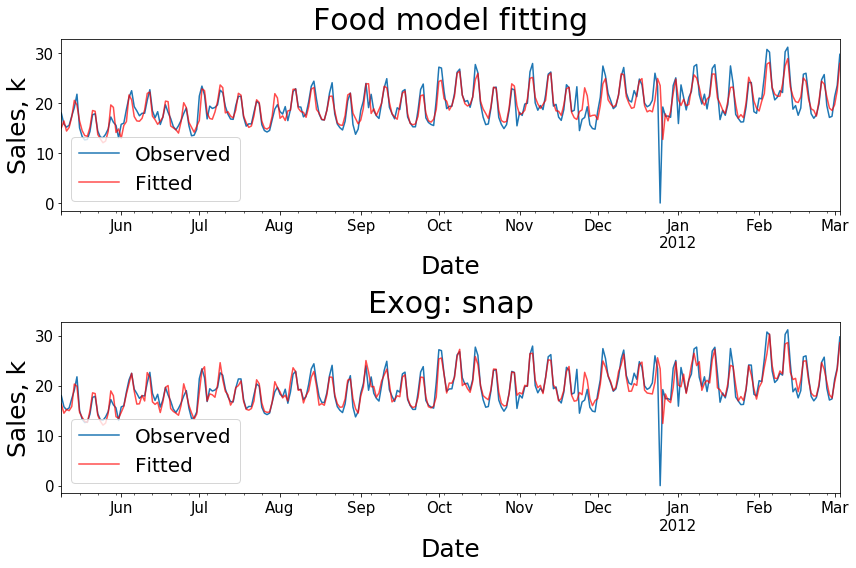

SMAPE: 3.43393% vs 2.98173%


In [153]:
compareFitting(train.food, (food_model,food_model_exog_snap), ('Food model fitting','Exog: snap'))

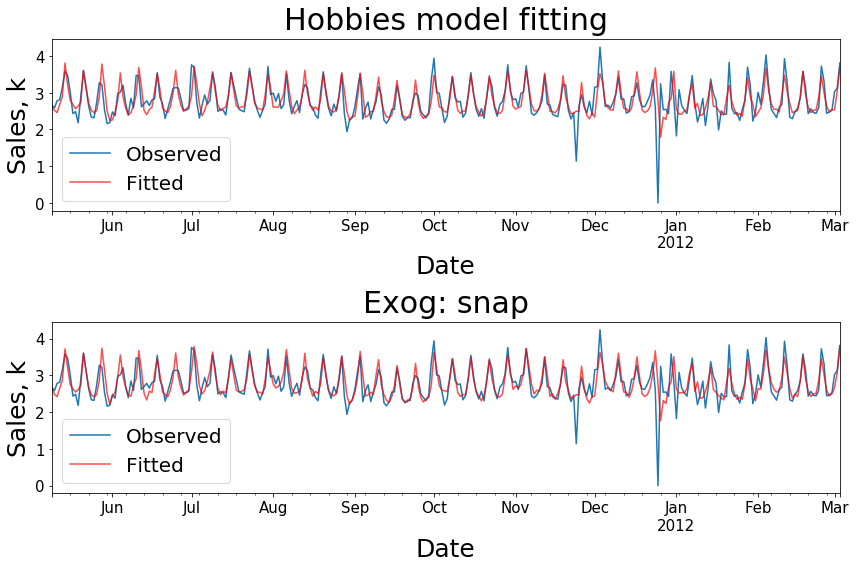

SMAPE: 3.99129% vs 3.99991%


In [154]:
compareFitting(train.hobbies, (hobbies_model,hobbies_model_exog_snap), ('Hobbies model fitting','Exog: snap'))

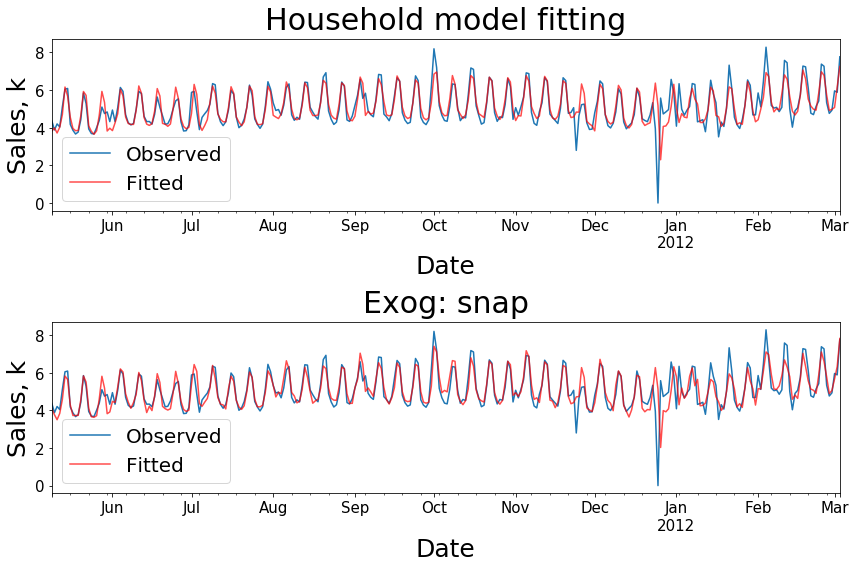

SMAPE: 3.47966% vs 3.51956%


In [155]:
compareFitting(train.household, (household_model,household_model_exog_snap), ('Household model fitting','Exog: snap'))

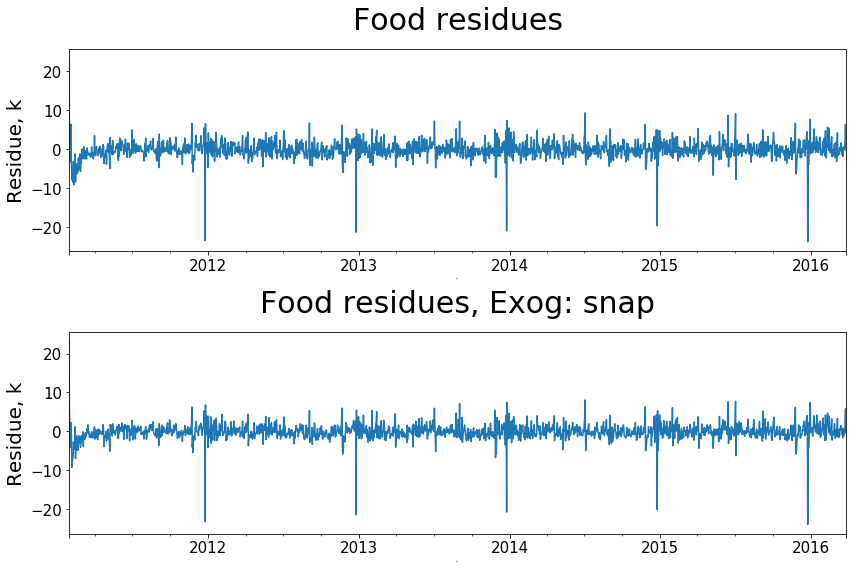

Student's test: p=0.01809 vs p=0.04146
Dickey–Fuller test: p=4.606989e-15 vs p=0.000000e+00


In [156]:
residuesCompare((food_model,food_model_exog_snap),('Food residues','Food residues, Exog: snap'))

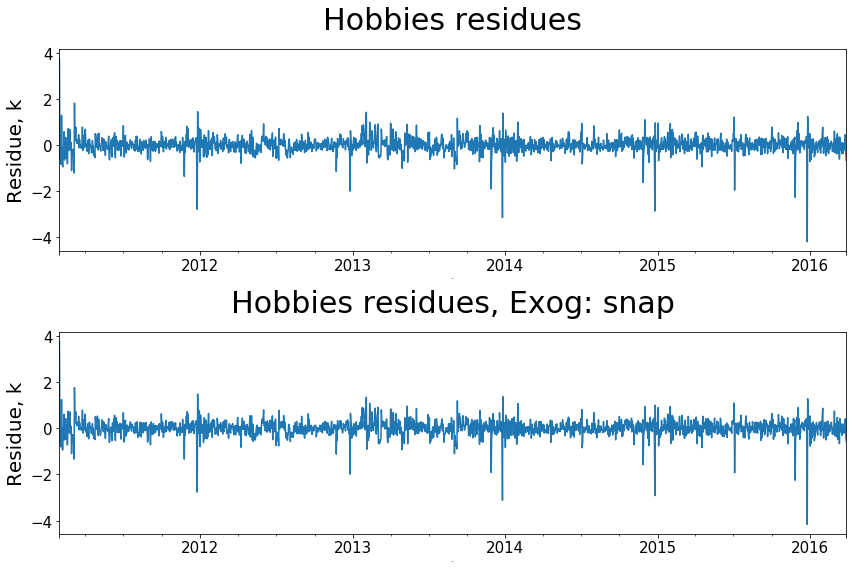

Student's test: p=0.79399 vs p=0.61097
Dickey–Fuller test: p=0.000000e+00 vs p=0.000000e+00


In [157]:
residuesCompare((hobbies_model,hobbies_model_exog_snap),('Hobbies residues','Hobbies residues, Exog: snap'))

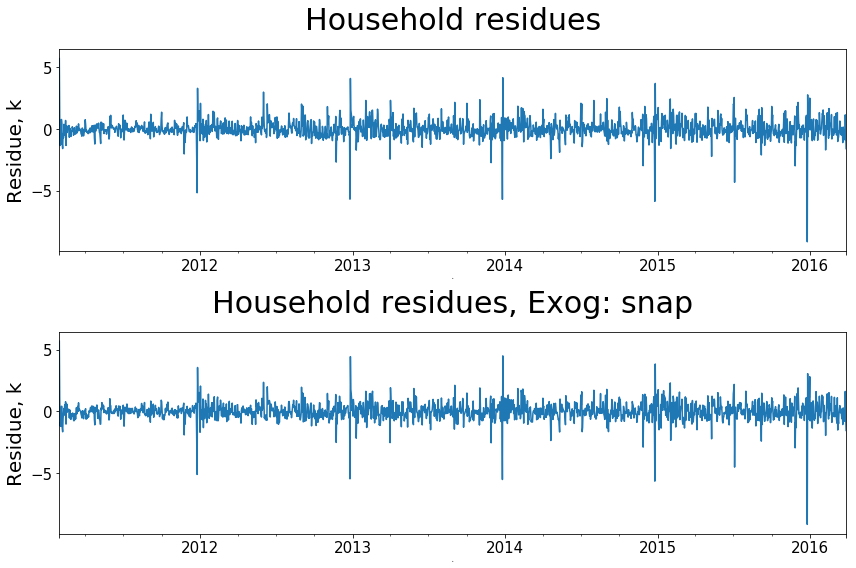

Student's test: p=0.66970 vs p=0.68278
Dickey–Fuller test: p=0.000000e+00 vs p=3.897897e-16


In [158]:
residuesCompare((household_model,household_model_exog_snap),('Household residues','Household residues, Exog: snap'))

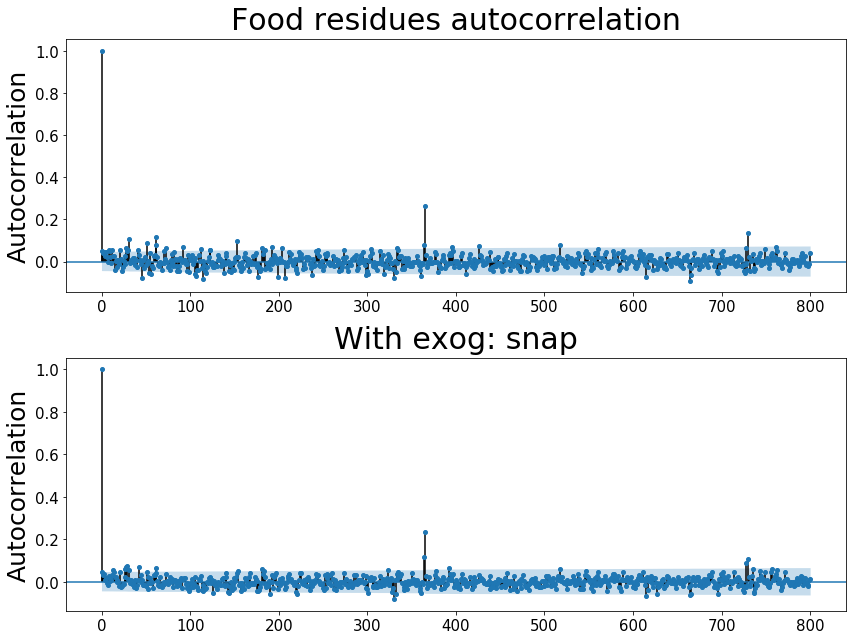

In [159]:
autocorrelationCompare((food_model,food_model_exog_snap),('Food residues autocorrelation','With exog: snap'))

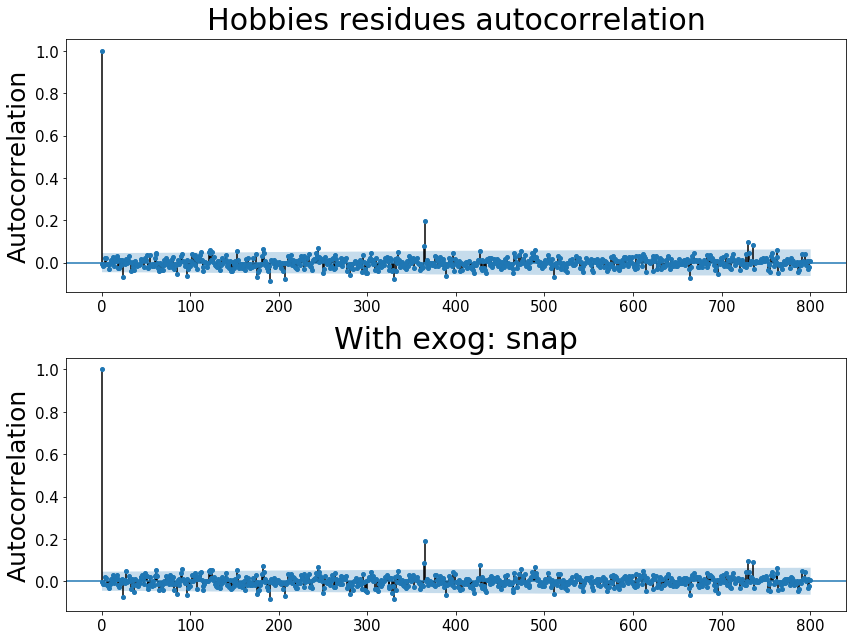

In [160]:
autocorrelationCompare((hobbies_model,hobbies_model_exog_snap),('Hobbies residues autocorrelation','With exog: snap'))

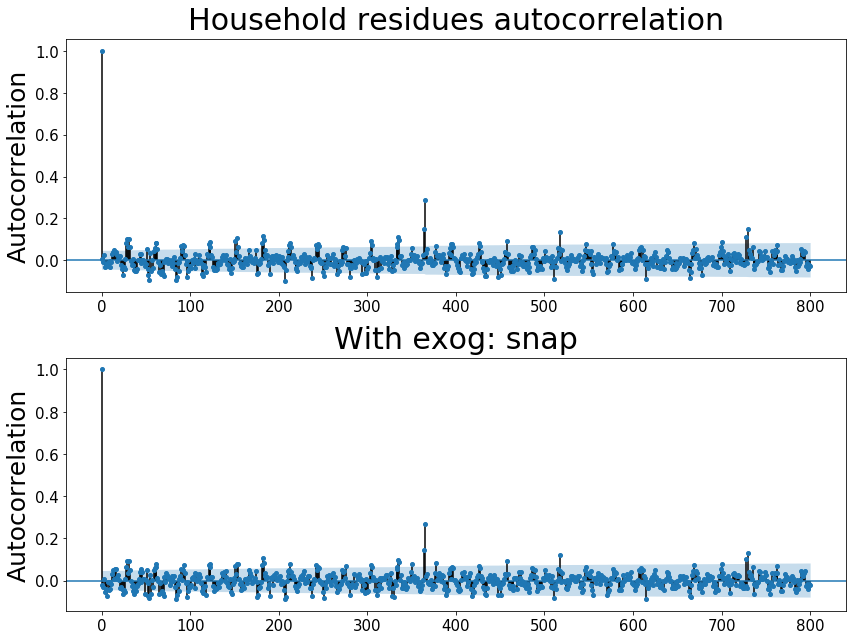

In [161]:
autocorrelationCompare((household_model,household_model_exog_snap),('Household residues autocorrelation','With exog: snap'))

In [162]:
food_future_exog_snap=food_model_exog_snap.predict(start=1885, end=1884+28, exog=exog_snap_test)
food_future_exog_snap=pd.DataFrame(food_future_exog_snap, columns=['future'])
food_comparison_exog_snap=pd.concat([food_future_exog_snap, test_set.food], axis=1)
food_comparison_exog_snap.rename(columns={'food':'sales'}, inplace=True)
food_comparison_exog_snap.future[0]=food_comparison_exog_snap.sales[0]
food_comparison_exog_snap.head()

future    sales
2016-03-27  32236.000000  32236.0
2016-03-28  25044.469008  23285.0
2016-03-29  24050.580523  22191.0
2016-03-30  24067.151125  21017.0
2016-03-31  23859.337516  22127.0

In [163]:
hobbies_future_exog_snap=hobbies_model_exog_snap.predict(start=1885, end=1884+28, exog=exog_snap_test)
hobbies_future_exog_snap=pd.DataFrame(hobbies_future_exog_snap, columns=['future'])
hobbies_comparison_exog_snap=pd.concat([hobbies_future_exog_snap, test_set.hobbies], axis=1)
hobbies_comparison_exog_snap.rename(columns={'hobbies':'sales'}, inplace=True)
hobbies_comparison_exog_snap.future[0]=hobbies_comparison_exog_snap.sales[0]
hobbies_comparison_exog_snap.head()

future   sales
2016-03-27  3643.000000  3643.0
2016-03-28  3415.242077  3555.0
2016-03-29  3315.576632  3446.0
2016-03-30  3370.035874  3333.0
2016-03-31  3351.424497  3421.0

In [164]:
household_future_exog_snap=household_model_exog_snap.predict(start=1885, end=1884+28, exog=exog_snap_test)
household_future_exog_snap=pd.DataFrame(household_future_exog_snap, columns=['future'])
household_comparison_exog_snap=pd.concat([household_future_exog_snap, test_set.household], axis=1)
household_comparison_exog_snap.rename(columns={'household':'sales'}, inplace=True)
household_comparison_exog_snap.future[0]=household_comparison_exog_snap.sales[0]
household_comparison_exog_snap.head()

future    sales
2016-03-27  10481.000000  10481.0
2016-03-28   8671.079154   9201.0
2016-03-29   7988.202261   8220.0
2016-03-30   8155.422891   8009.0
2016-03-31   8364.362766   9133.0

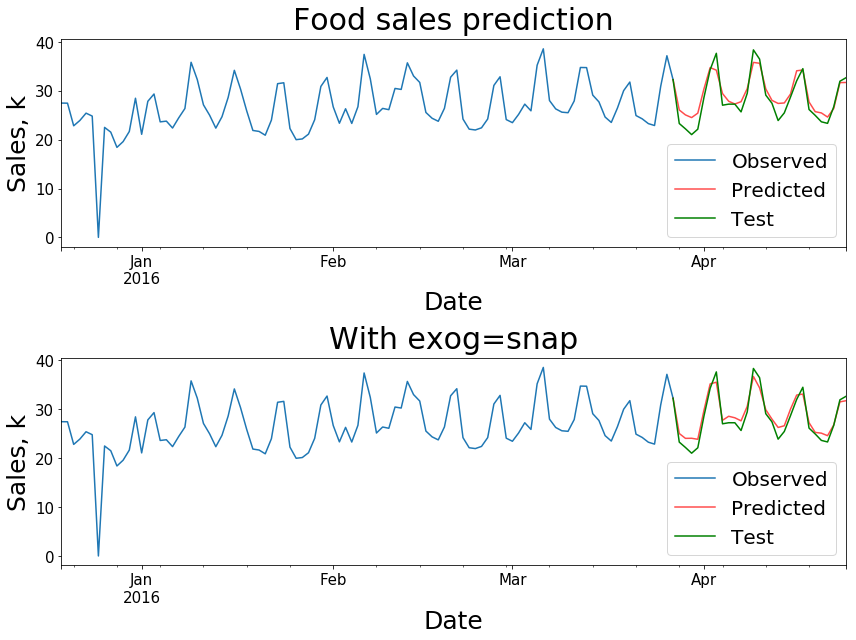

SMAPE = 2.92324% vs 2.37048%


In [165]:
predictionsCompare(train.food, (food_comparison, food_comparison_exog_snap), ('Food sales prediction','With exog=snap'))

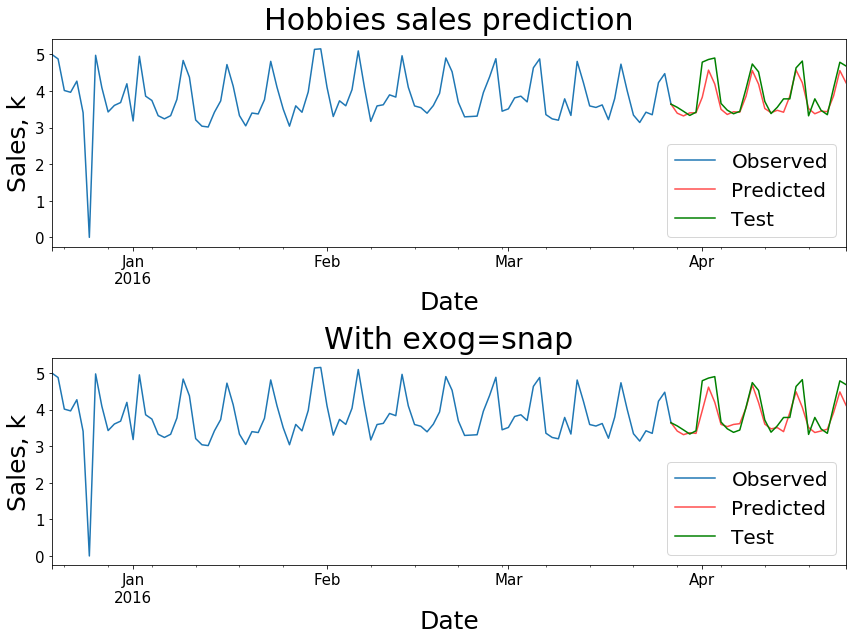

SMAPE = 2.81584% vs 2.87747%


In [166]:
predictionsCompare(train.hobbies, (hobbies_comparison, hobbies_comparison_exog_snap), ('Hobbies sales prediction','With exog=snap'))

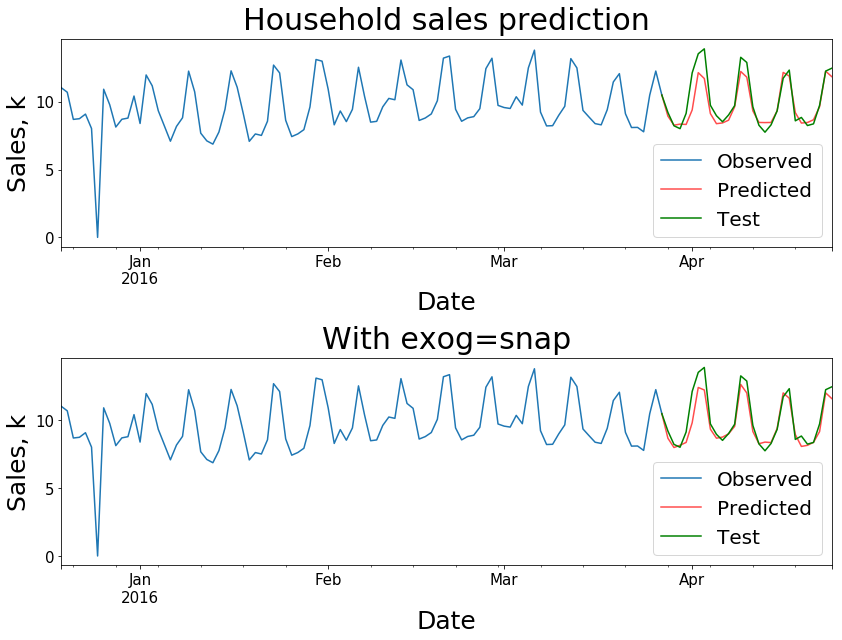

SMAPE = 2.76053% vs 2.45830%


In [167]:
predictionsCompare(train.household, (household_comparison, household_comparison_exog_snap), ('Household sales prediction','With exog=snap'))

# Results

In [168]:
# ARIMA:
a1="%.2f" % (smape(food_comparison.sales[1:],food_comparison.future[1:]))
a2="%.2f" % (smape(hobbies_comparison.sales[1:],hobbies_comparison.future[1:]))
a3="%.2f" % (smape(household_comparison.sales[1:],household_comparison.future[1:]))

# ARIMA + days
b1="%.2f" % (smape(food_comparison_exog_days.sales[1:],food_comparison_exog_days.future[1:]))
b2="%.2f" % (smape(hobbies_comparison_exog_days.sales[1:],hobbies_comparison_exog_days.future[1:]))
b3="%.2f" % (smape(household_comparison_exog_days.sales[1:],household_comparison_exog_days.future[1:]))

# ARIMA + events
c1="%.2f" % (smape(food_comparison_exog_events.sales[1:],food_comparison_exog_events.future[1:]))
c2="%.2f" % (smape(hobbies_comparison_exog_events.sales[1:],hobbies_comparison_exog_events.future[1:]))
c3="%.2f" % (smape(household_comparison_exog_events.sales[1:],household_comparison_exog_events.future[1:]))

# ARIMA + snap
d1="%.2f" % (smape(food_comparison_exog_snap.sales[1:],food_comparison_exog_snap.future[1:]))
d2="%.2f" % (smape(hobbies_comparison_exog_snap.sales[1:],hobbies_comparison_exog_snap.future[1:]))
d3="%.2f" % (smape(household_comparison_exog_snap.sales[1:],household_comparison_exog_snap.future[1:]))

statistics={'pure ARIMA' : [a1, a2, a3], 'exog=days' : [b1, b2, b3],
           'exog=events' : [c1, c2, c3], 'exog=snap' : [d1, d2, d3]}

statistics=pd.DataFrame(statistics, index=('food','hobbies','household'), columns=('pure ARIMA',
                                                            'exog=days', 'exog=events','exog=snap'))
statistics = statistics + '%'

statistics

pure ARIMA exog=days exog=events exog=snap
food           2.92%     2.66%       2.83%     2.37%
hobbies        2.82%     2.80%       3.02%     2.88%
household      2.76%     3.02%       3.20%     2.46%

In [178]:
boldList = ('2.66%', '2.83%', '2.37%', '2.46%', '2.80%')

def makeBold(x):
    if x in boldList:
        return 'font-weight: bold'
    else:
        return ''

statForPrint=statistics.style.applymap(makeBold)

In [172]:
def showResults():

    print('Metrics: SMAPE')
    
    return statForPrint

In [179]:
showResults()

Metrics: SMAPE


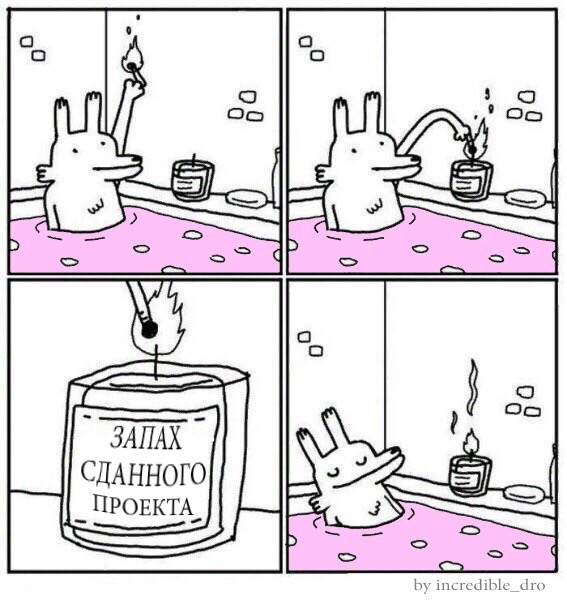

In [4]:
Image(filename='lol.jpg')